In [296]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Predict the approx_cost(for two people)

In [343]:
df = pd.read_csv('zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [344]:
df['url'].nunique()

51717

In [299]:
df.shape

(51717, 17)

In [300]:
np.sum(df.duplicated())

0

In [396]:
df1 = df.copy()

In [397]:
df1.drop(['url', 'address', 'name', 'phone'], axis=1, inplace=True)

In [398]:
df1.head()

online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [399]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   dish_liked                   23639 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   reviews_list                 51717 non-null  object
 10  menu_item                    51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

# Data Cleaning

In [400]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [401]:
def extract_rating(val:str):
    if '/' in val:
        rating = val.split('/')[0].strip()
        return float(rating)
    else:
        return val

In [402]:
extract_rating("5.1 /5")

5.1

In [403]:
df1['rate'] = df1['rate'].astype('str')

In [404]:
df1['rate'] = df1['rate'].apply(extract_rating)

In [405]:
df1['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8,
       4.4, 4.3, 'NEW', 2.9, 3.5, 'nan', 2.6, 3.4, 4.5, 2.5, 2.7, 4.7,
       2.4, 2.2, 2.3, '-', 4.8, 4.9, 2.1, 2.0, 1.8], dtype=object)

In [406]:
df1['rate'] = df1['rate'].replace('nan',np.NaN).replace('NEW', np.NaN).replace('-', np.NaN)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_12420\2102490389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['rate'] = df1['rate'].replace('nan',np.NaN).replace('NEW', np.NaN).replace('-', np.NaN)


In [407]:
df1['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [408]:
df1['rate'] = df1['rate'].astype('float64')

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rate', ylabel='Count'>

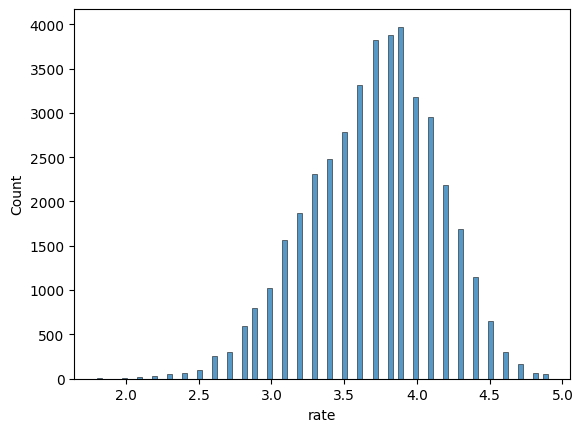

In [410]:
sns.histplot(df1['rate'])

In [411]:
# df1['rate'] = df1['rate'].replace(0, df1['rate'].median())

In [412]:
# sns.histplot(df1['rate'], kde=True)

In [413]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51717 non-null  object 
 1   book_table                   51717 non-null  object 
 2   rate                         41665 non-null  float64
 3   votes                        51717 non-null  int64  
 4   location                     51696 non-null  object 
 5   rest_type                    51490 non-null  object 
 6   dish_liked                   23639 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   reviews_list                 51717 non-null  object 
 10  menu_item                    51717 non-null  object 
 11  listed_in(type)              51717 non-null  object 
 12  listed_in(city)              51717 non-null  object 
dtypes: float64(1), i

In [414]:
df1.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [415]:
df1['location'].nunique()

93

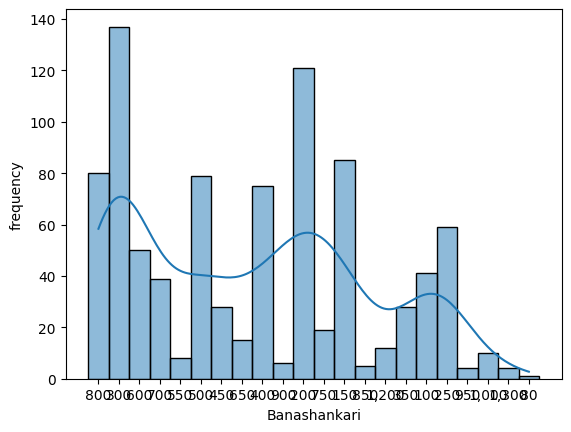

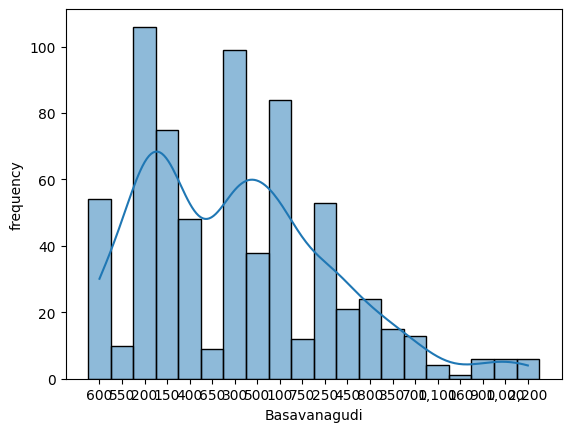

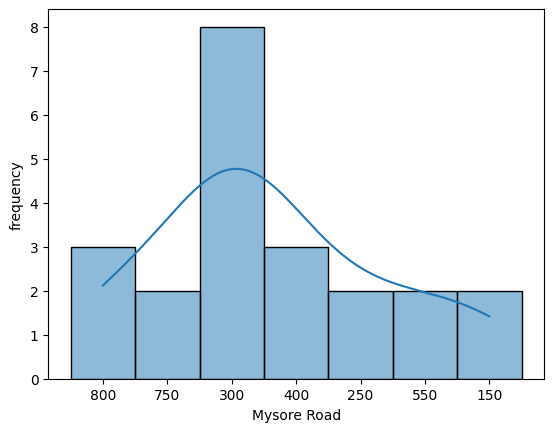

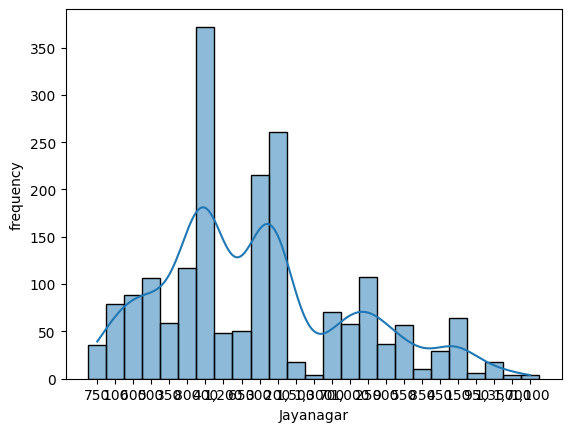

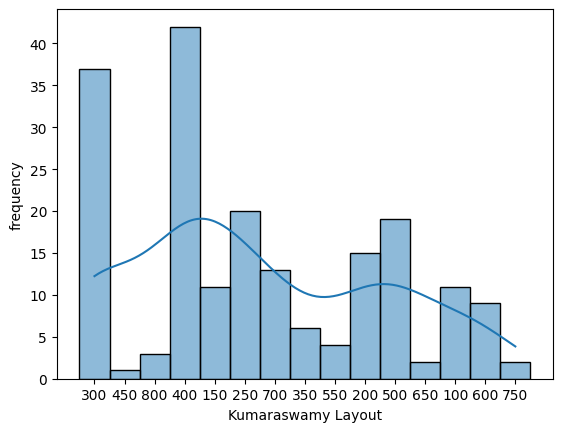

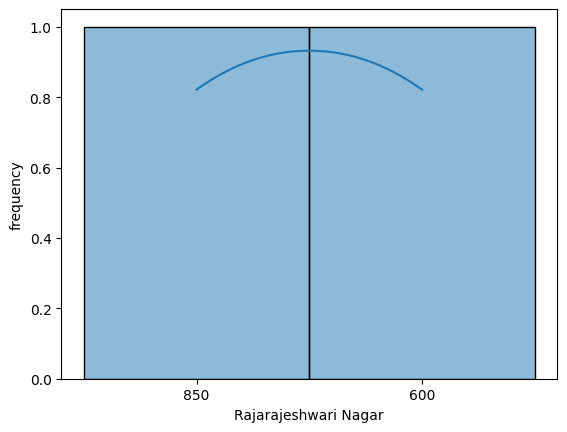

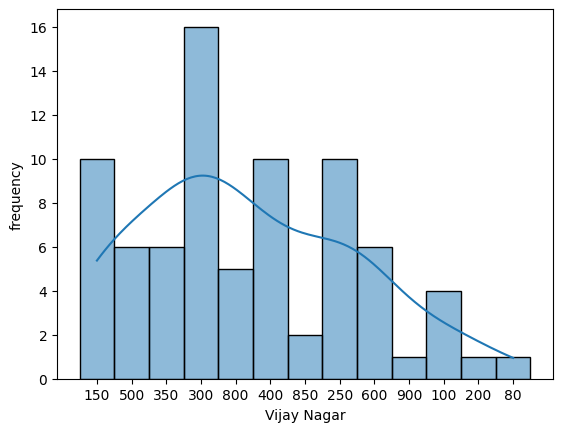

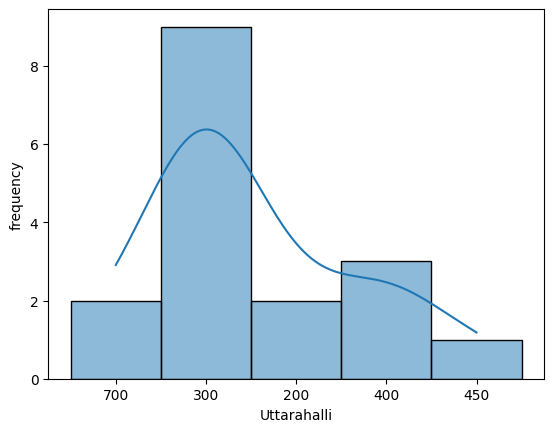

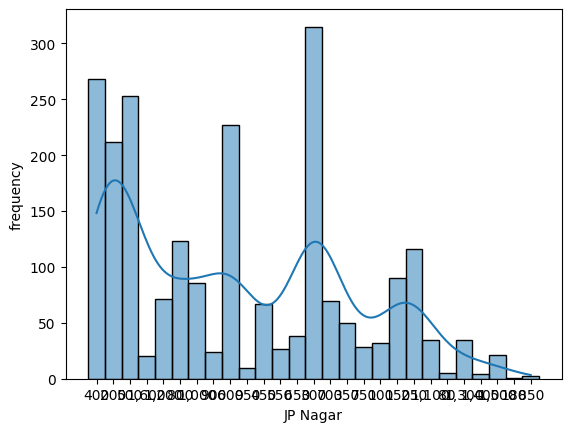

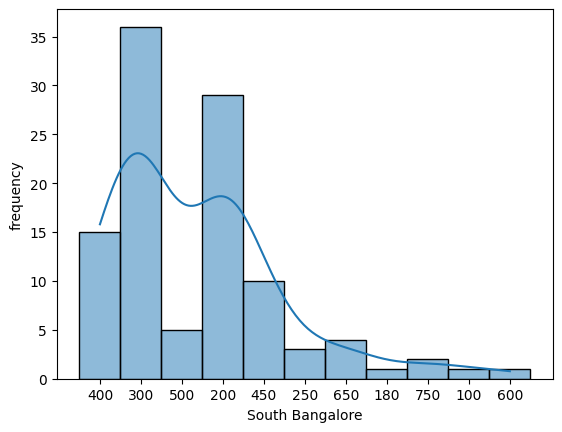

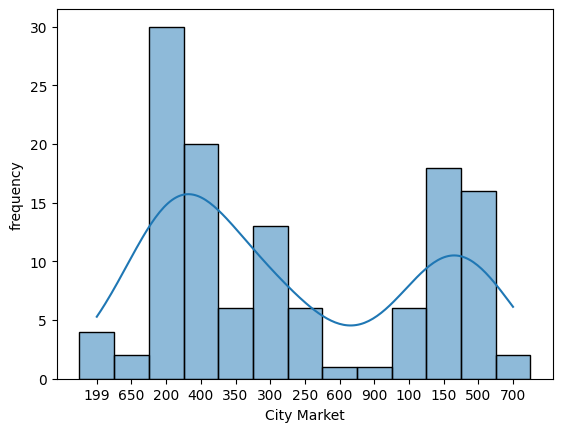

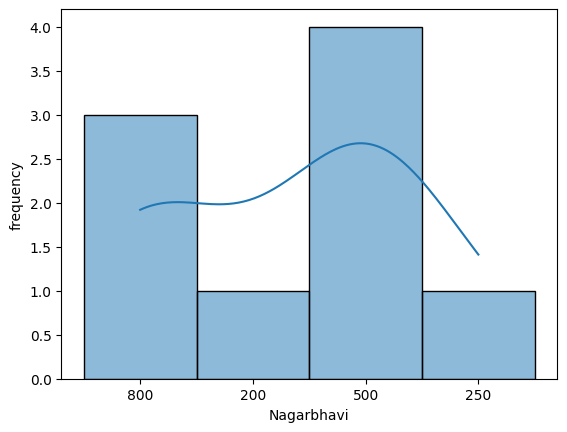

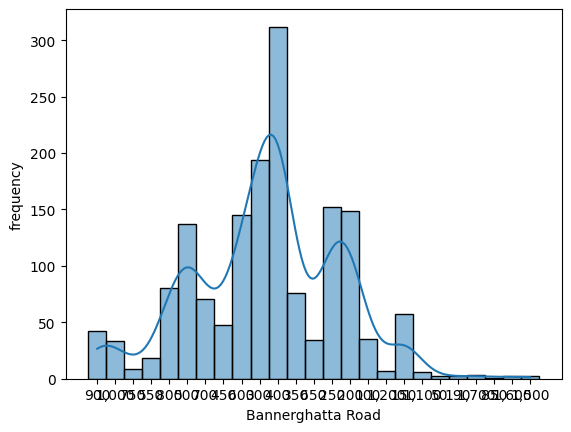

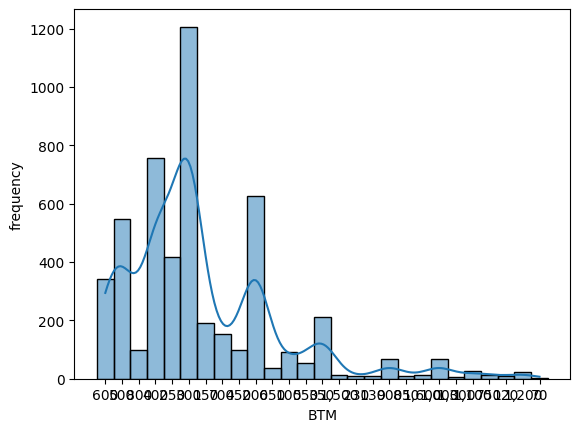

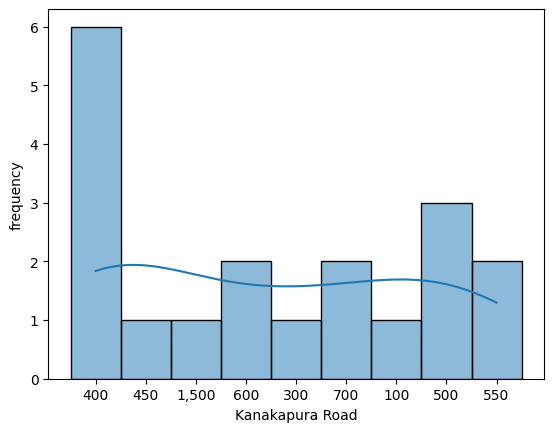

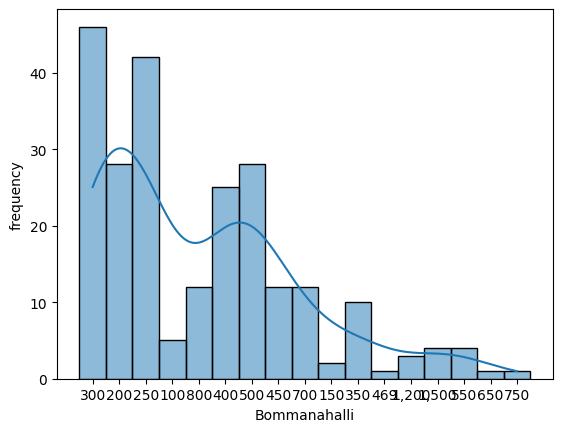

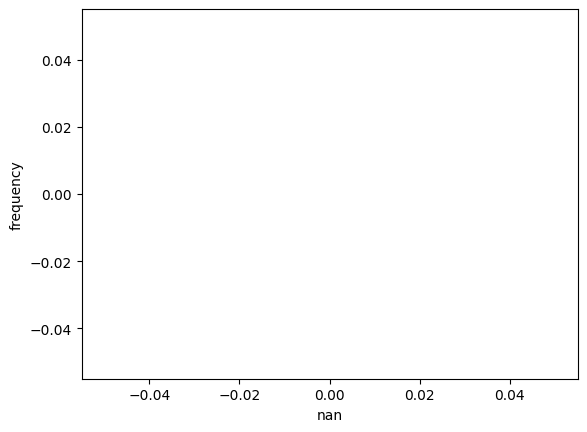

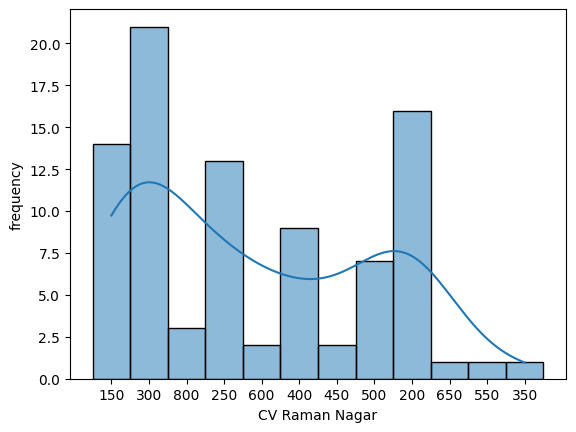

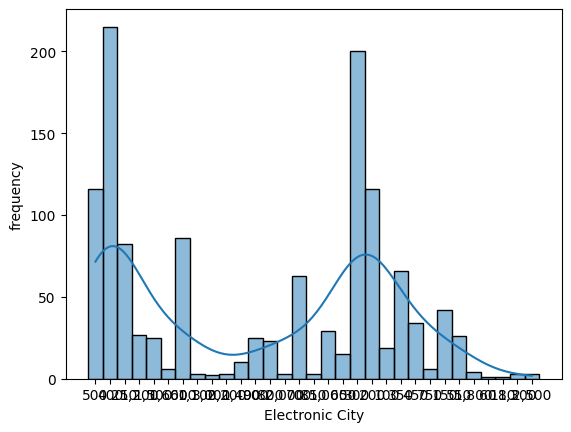

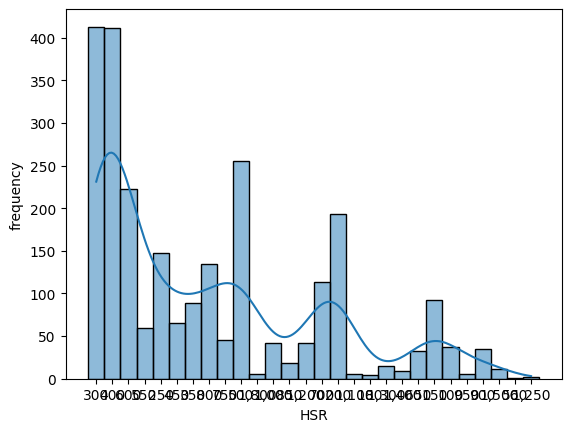

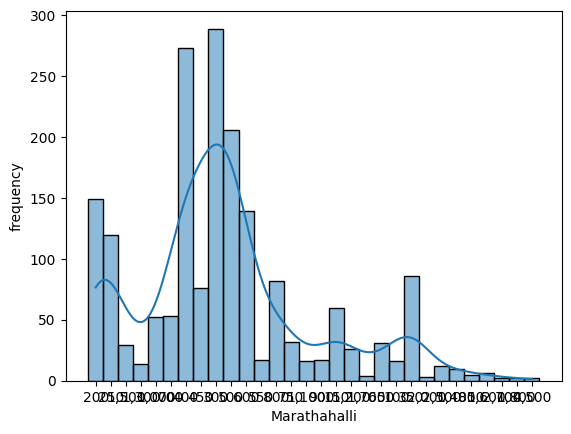

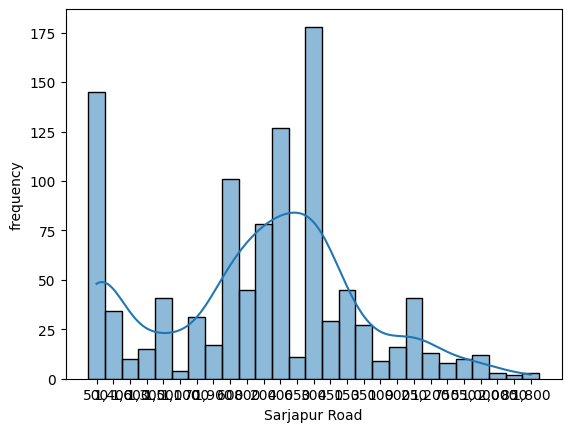

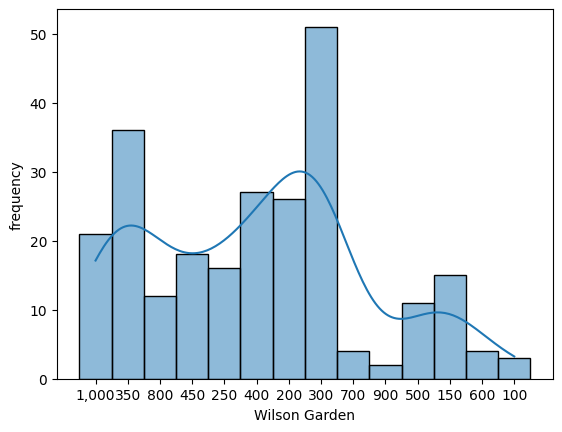

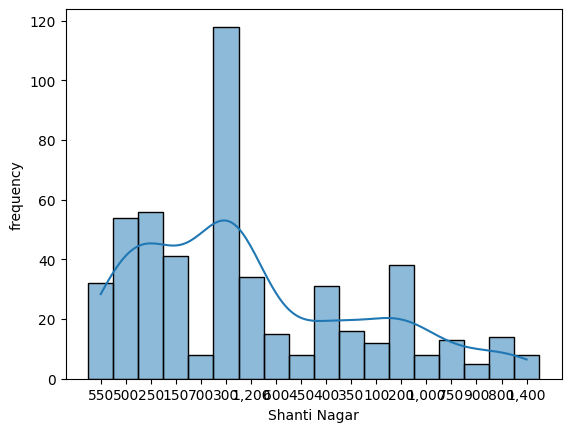

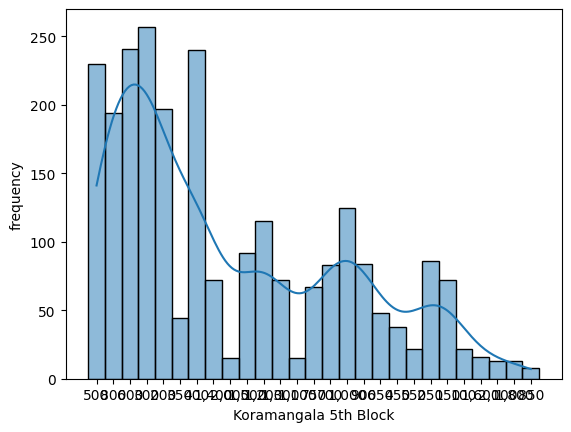

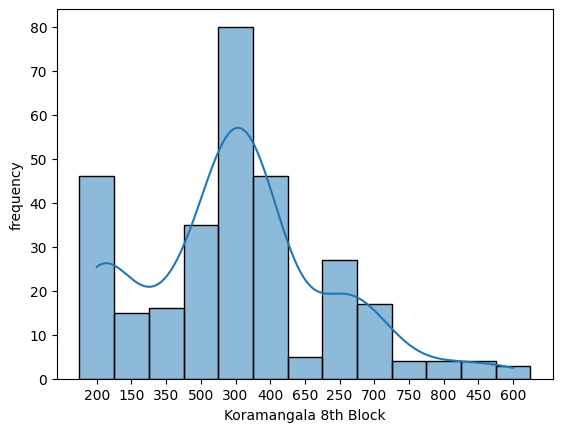

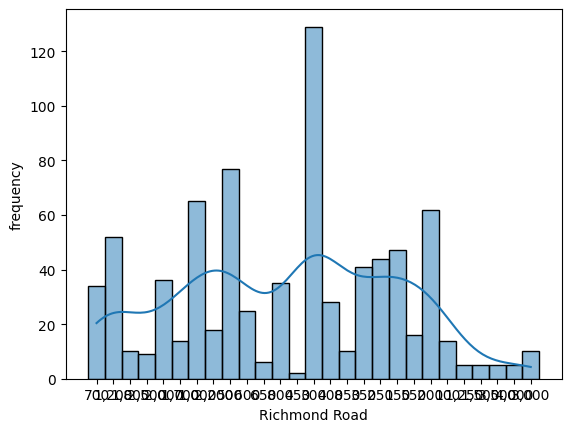

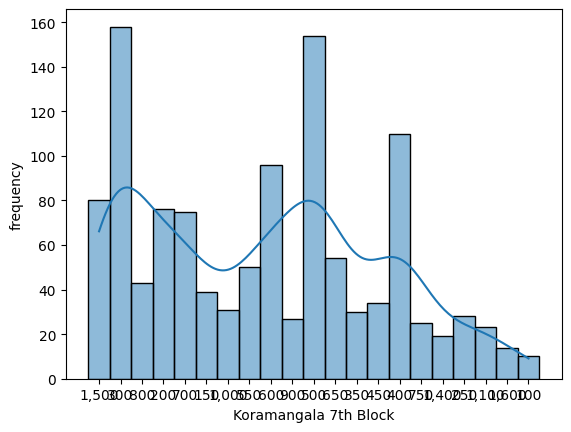

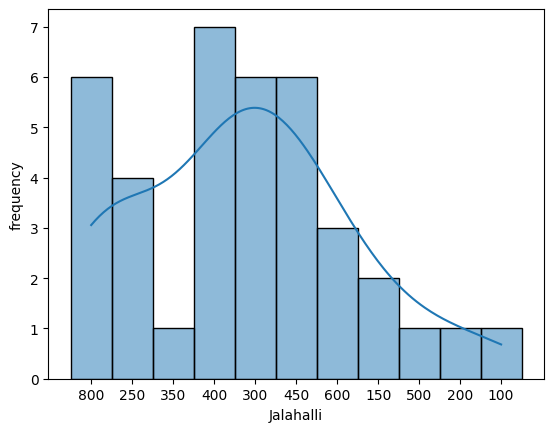

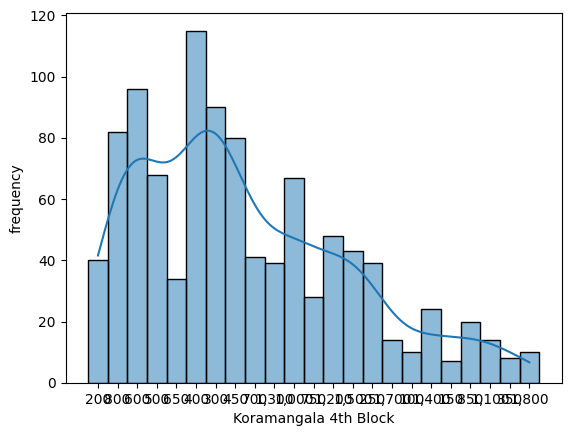

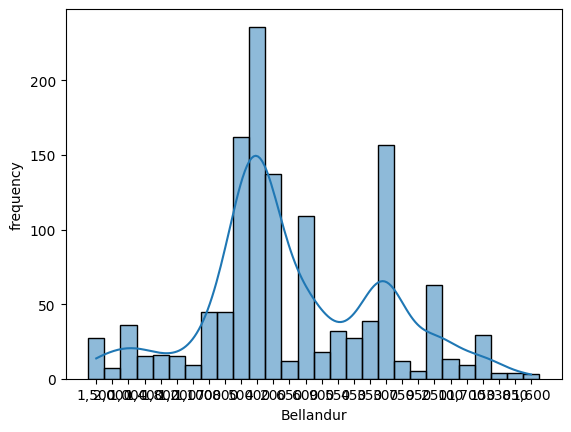

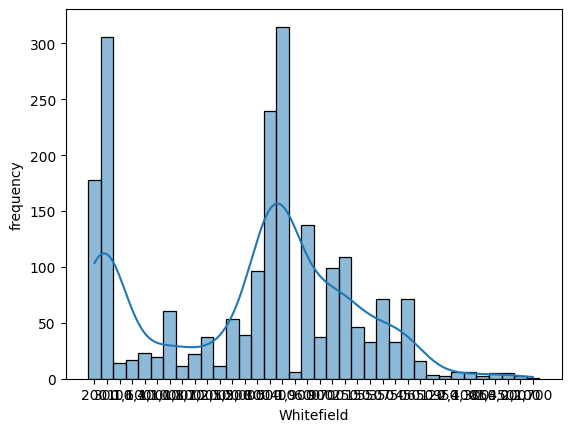

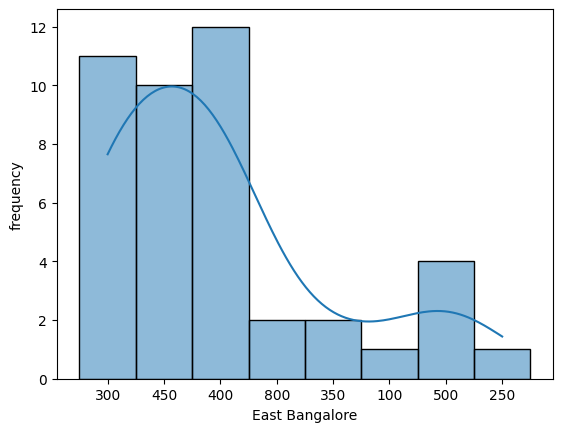

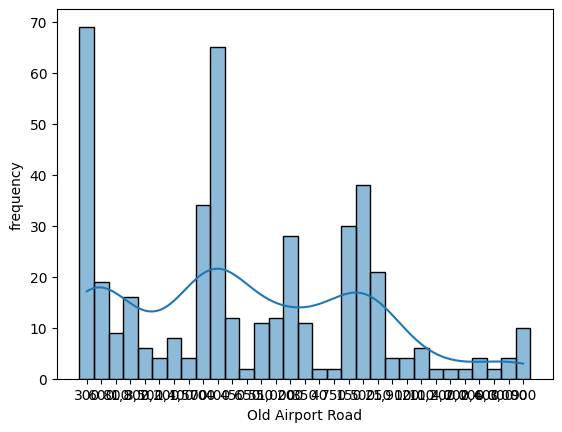

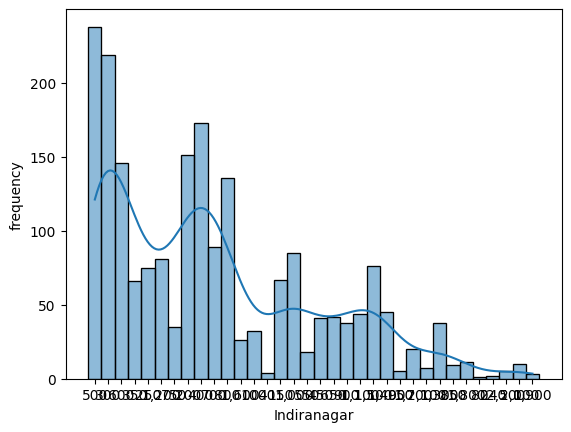

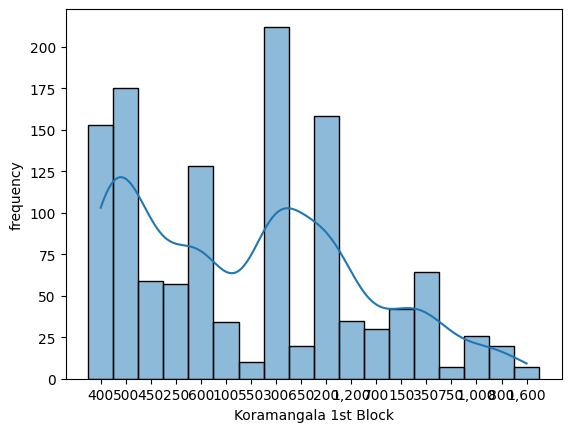

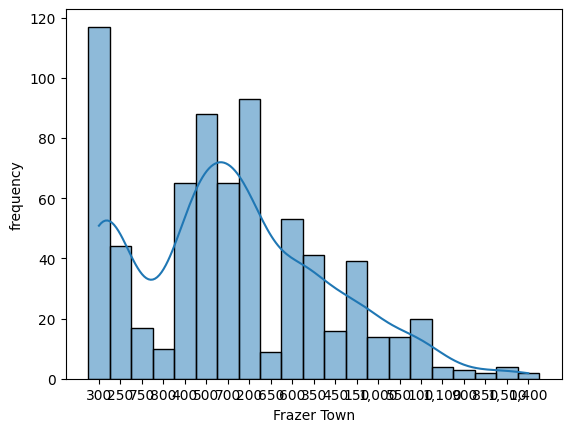

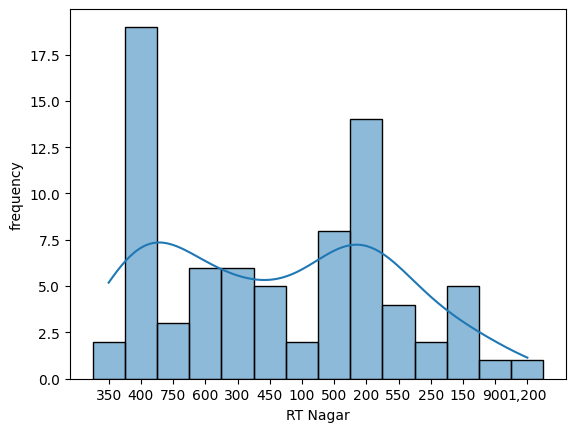

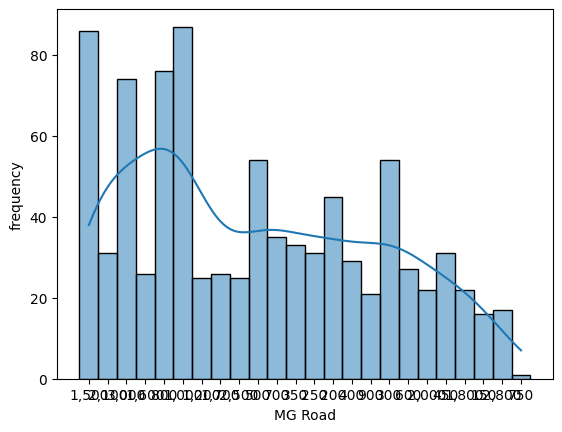

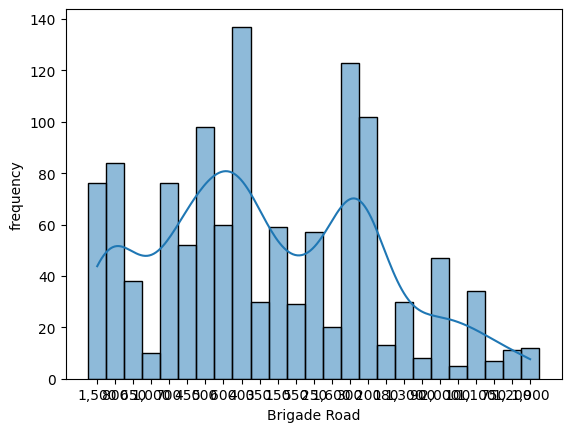

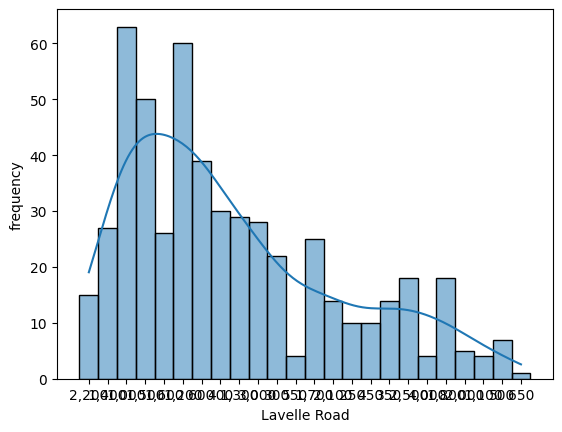

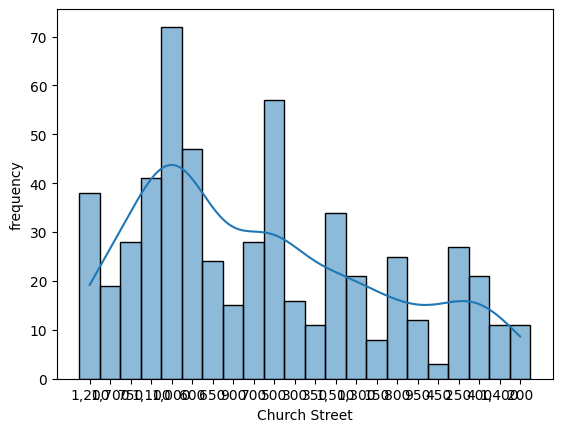

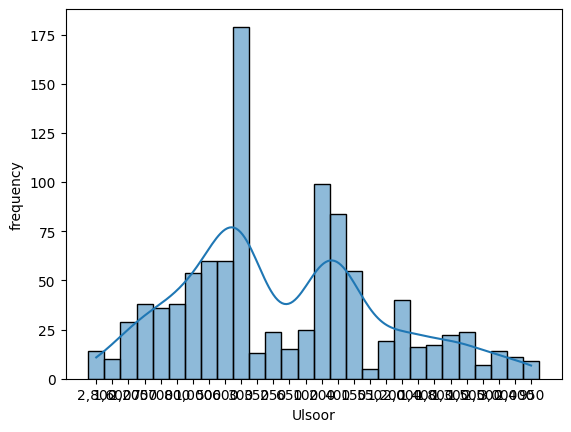

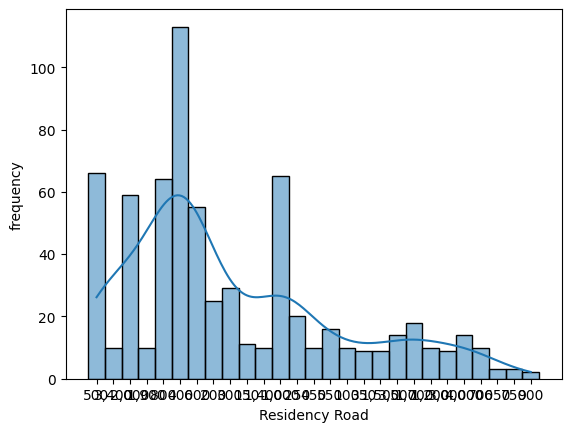

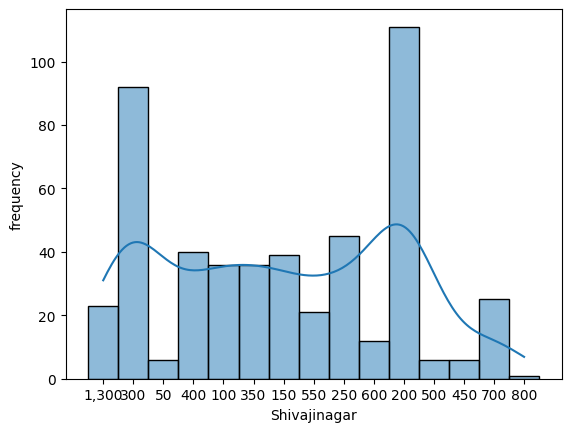

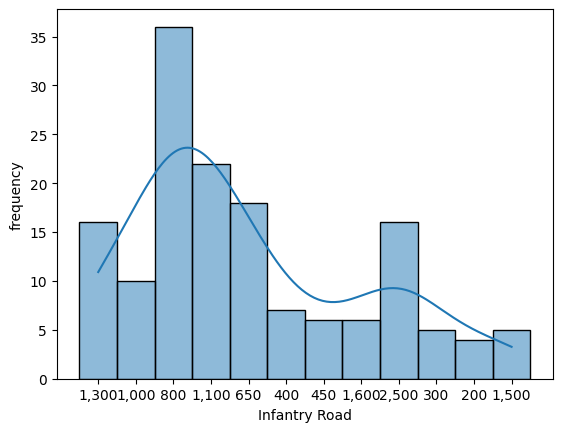

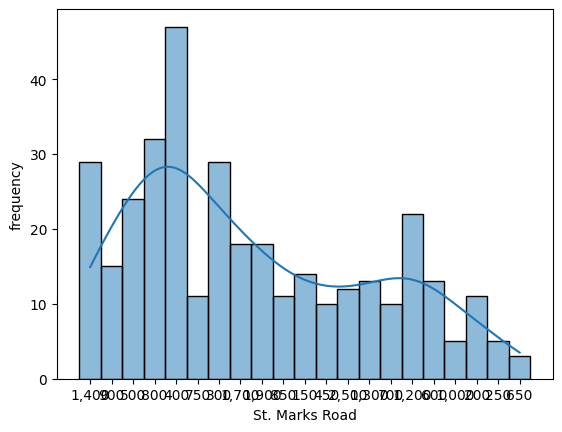

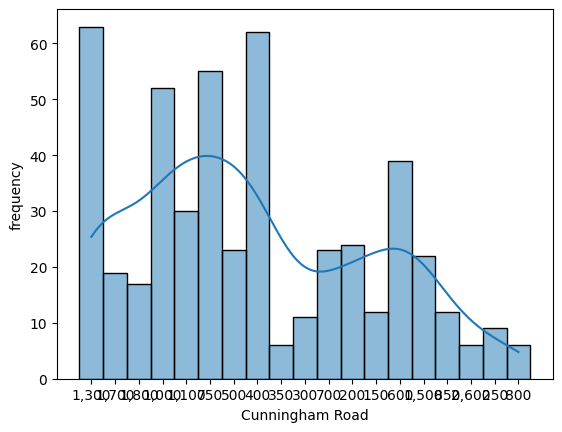

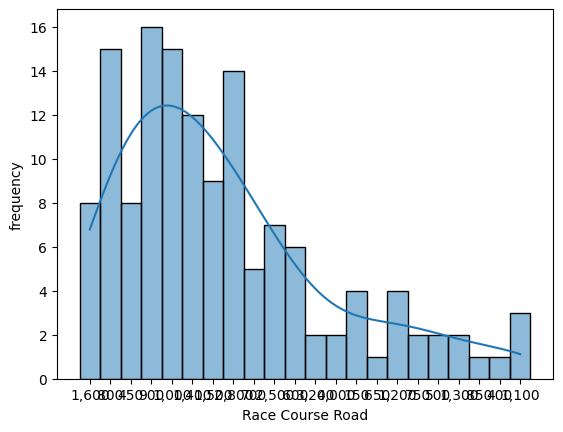

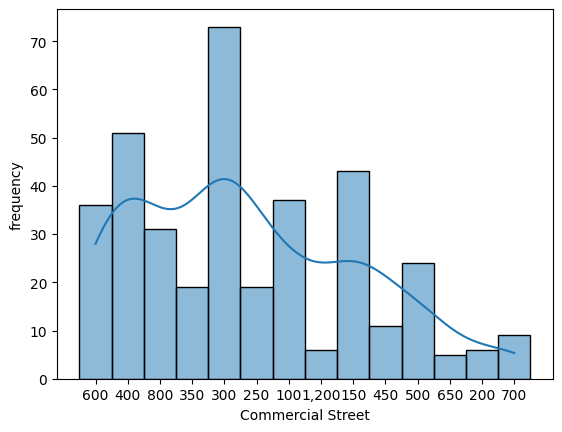

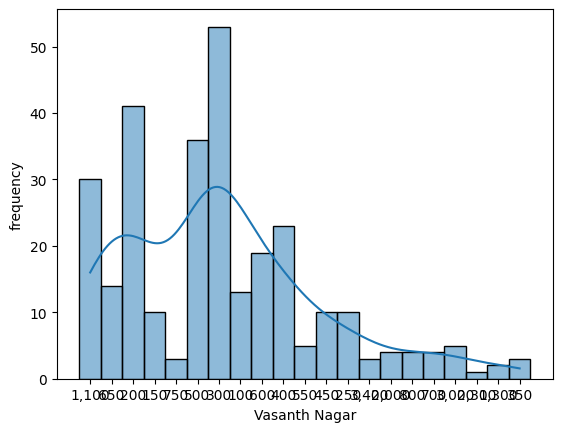

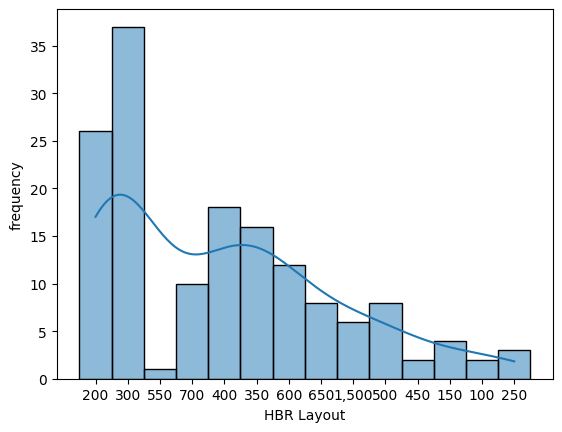

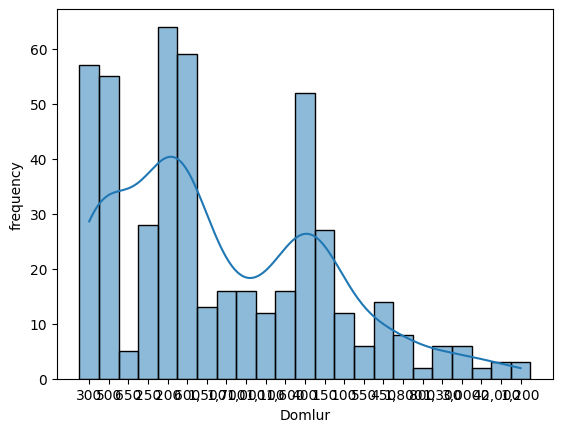

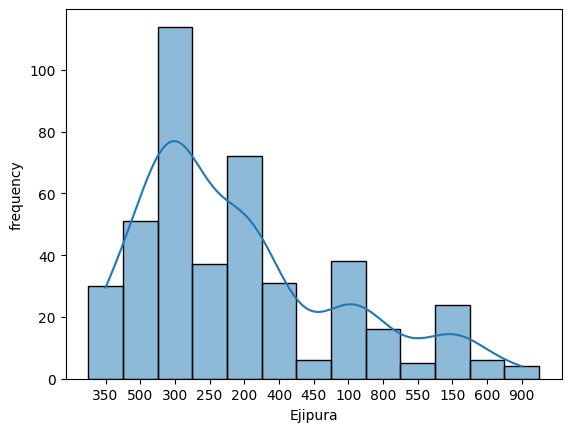

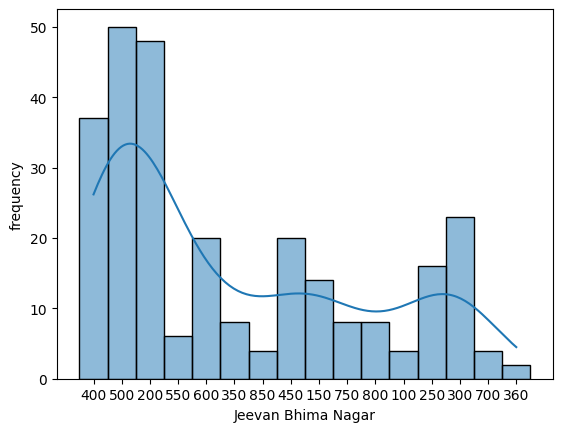

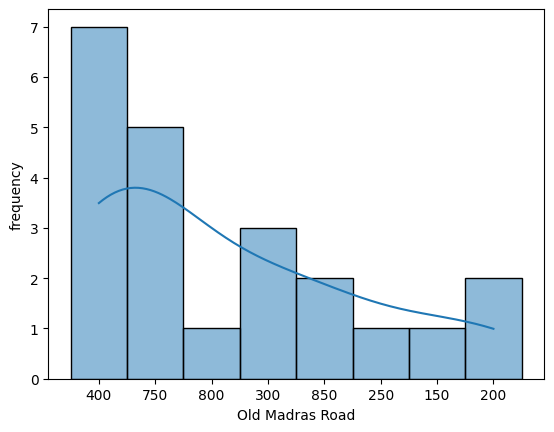

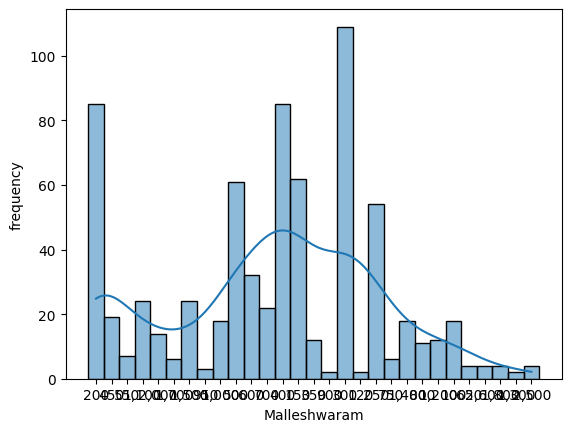

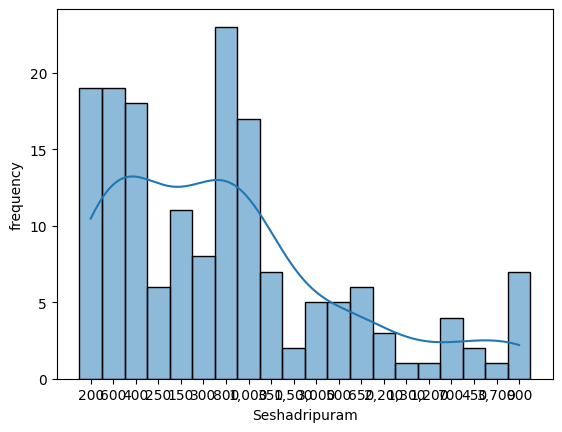

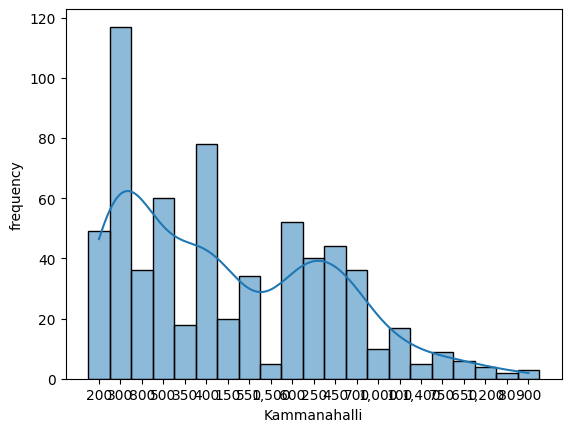

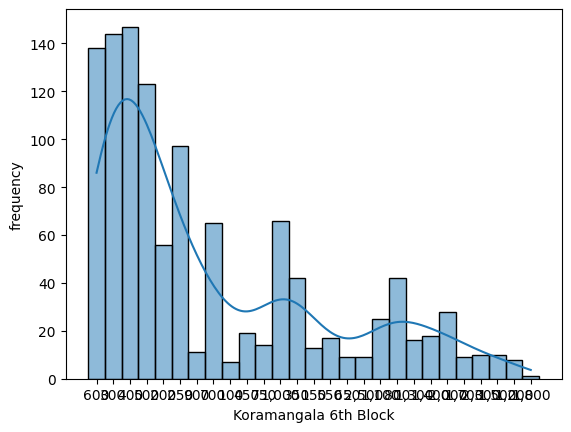

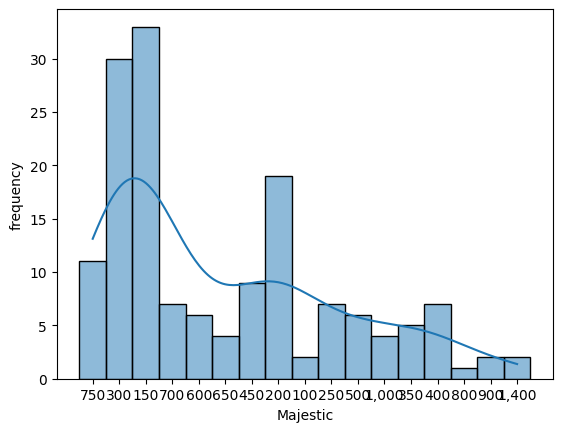

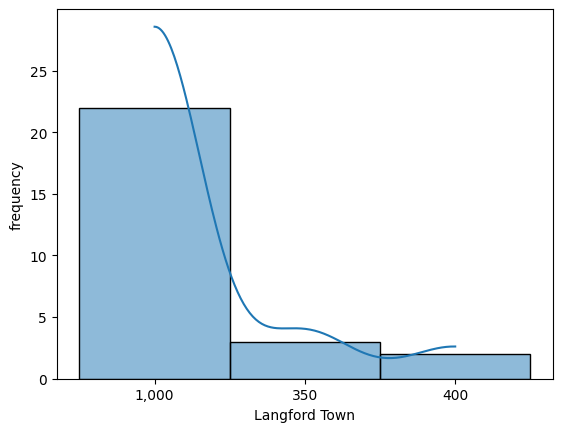

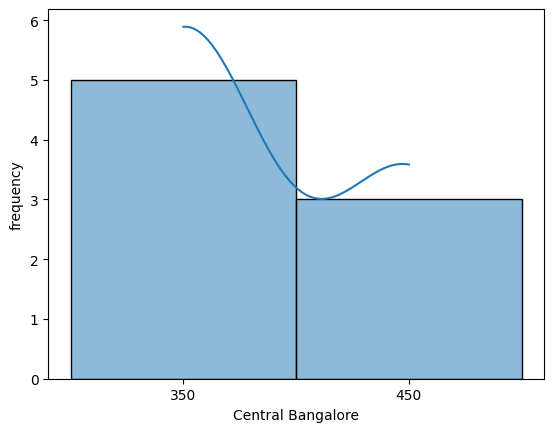

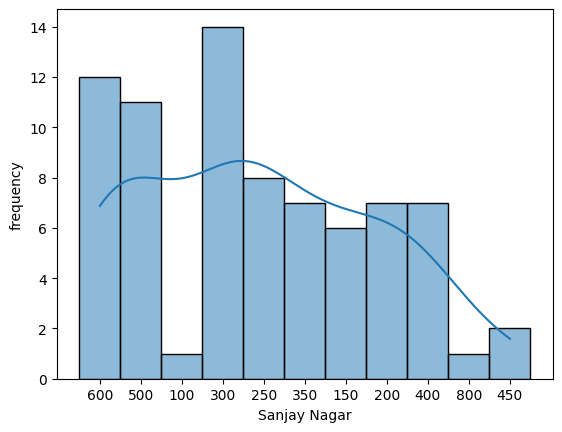

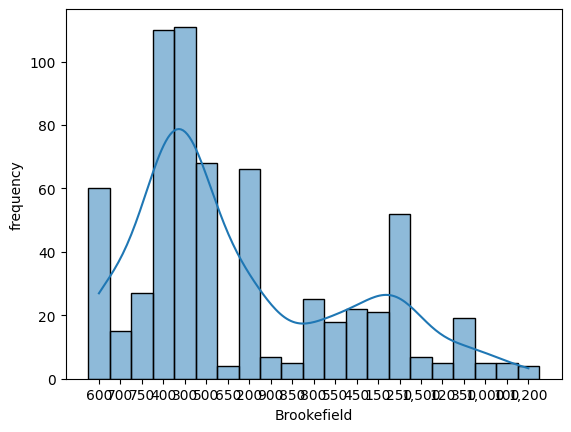

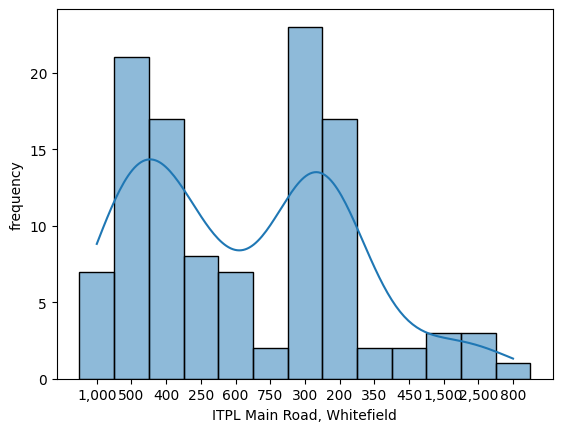

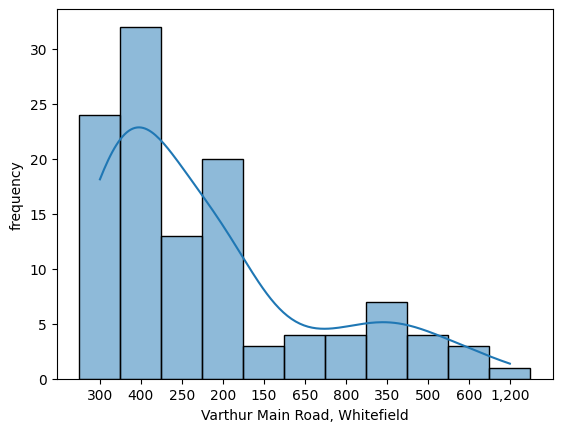

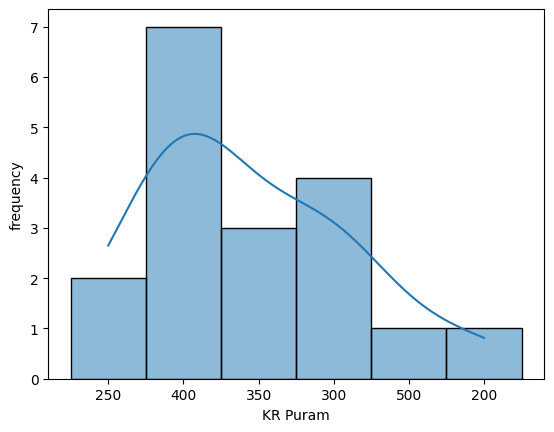

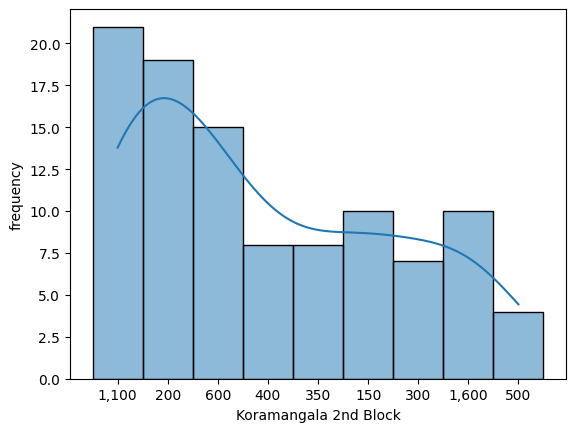

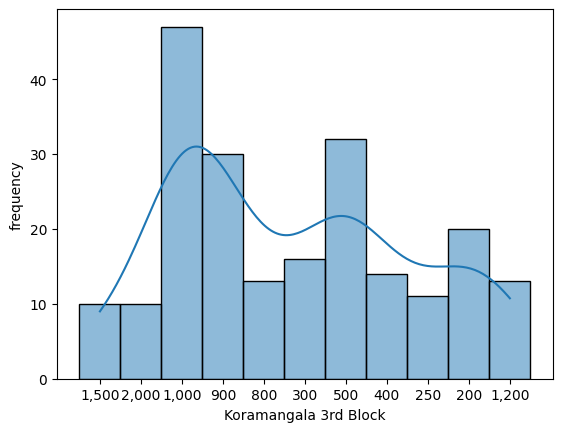

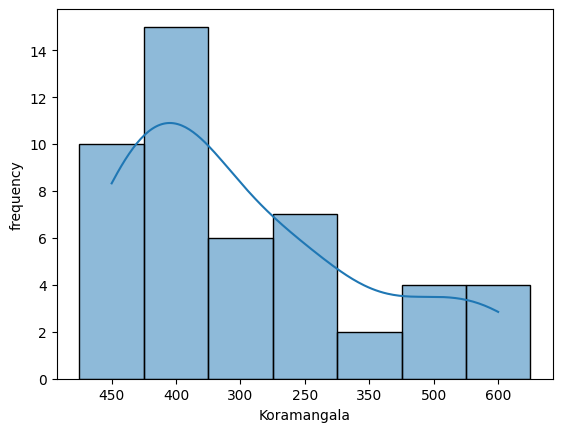

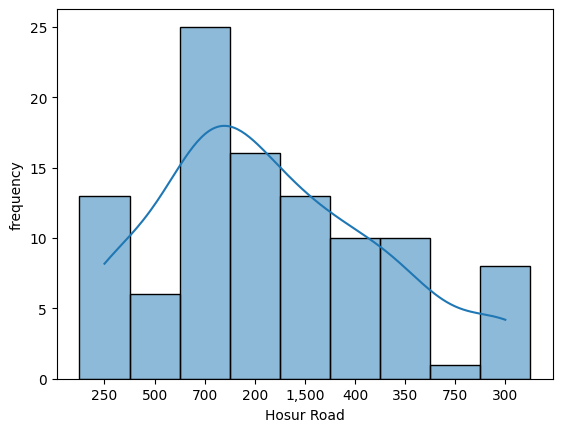

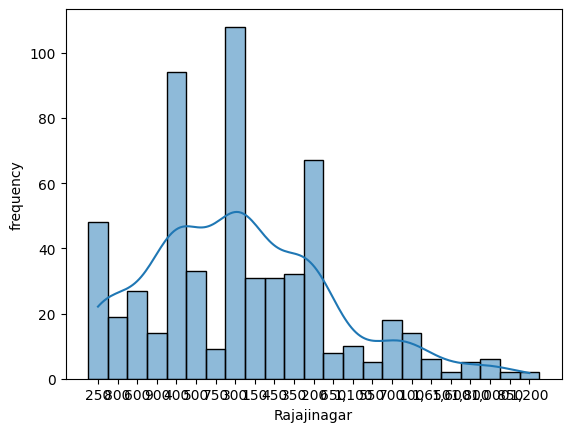

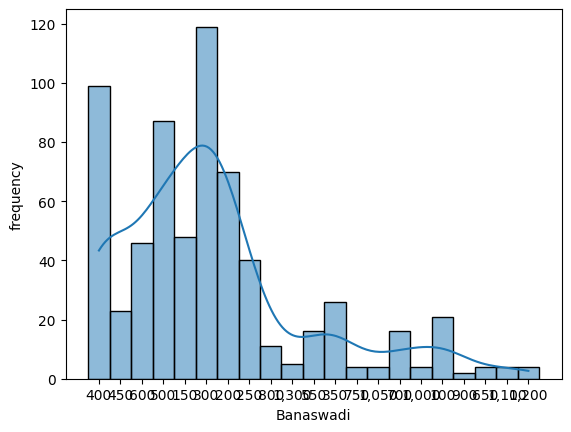

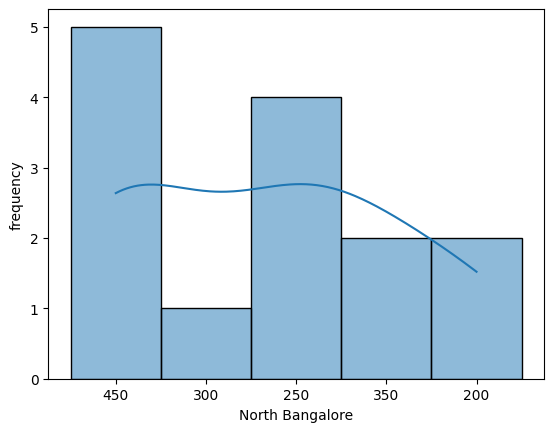

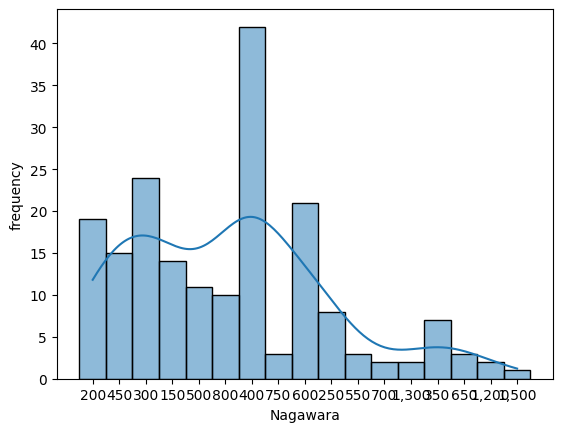

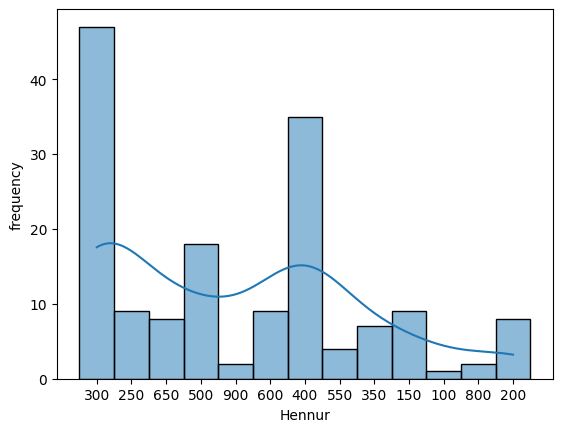

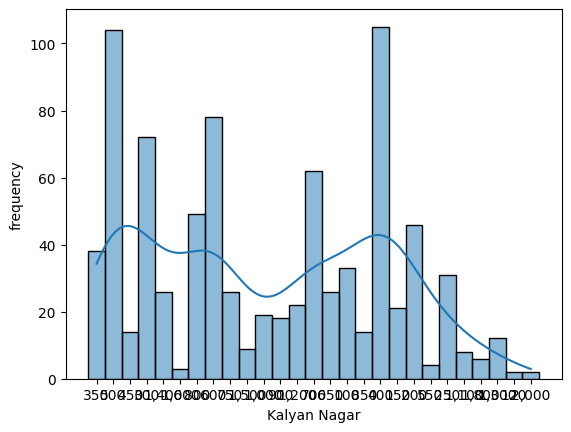

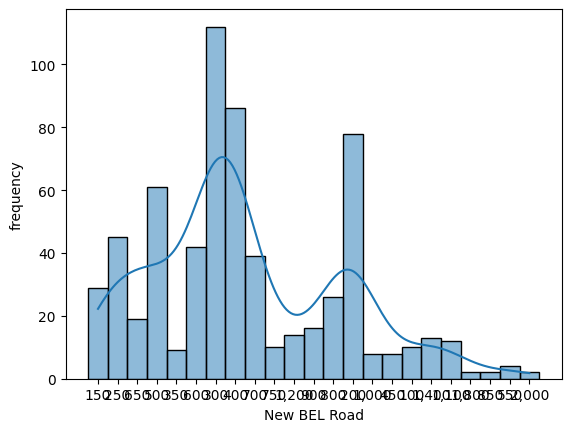

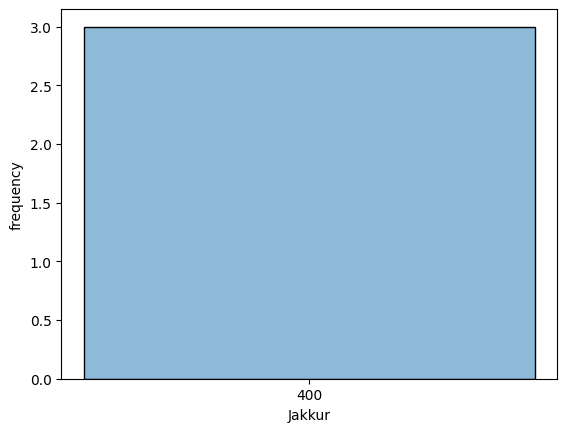

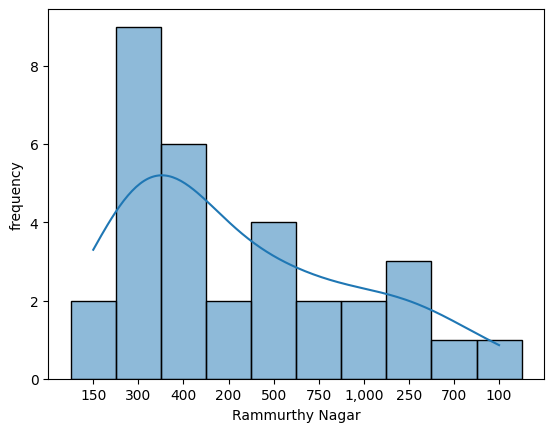

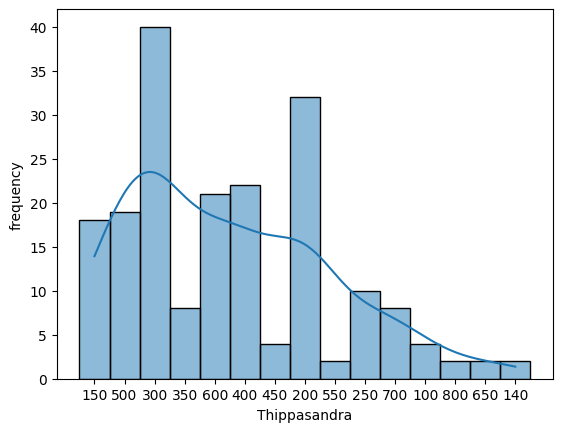

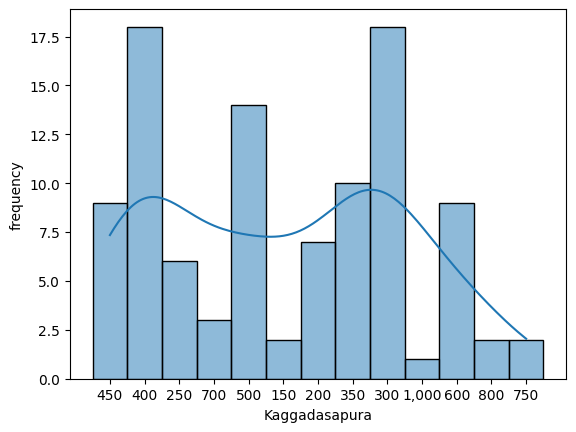

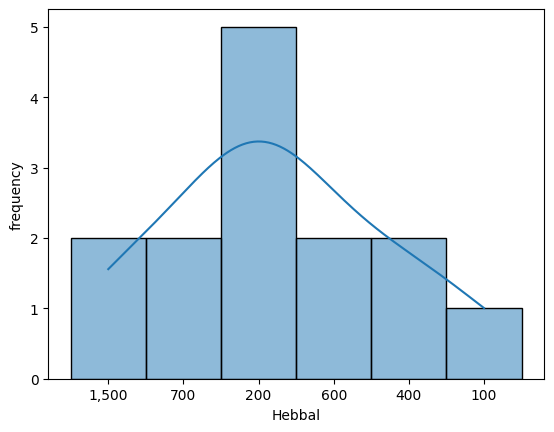

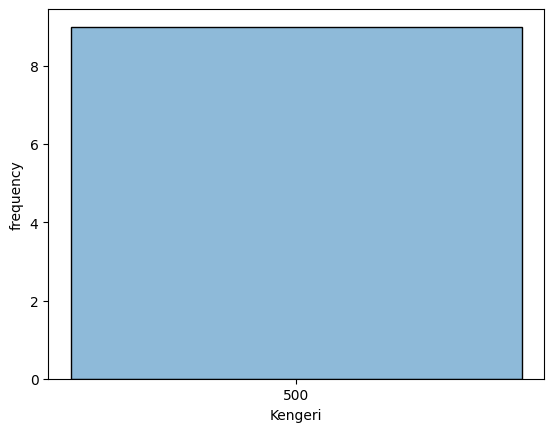

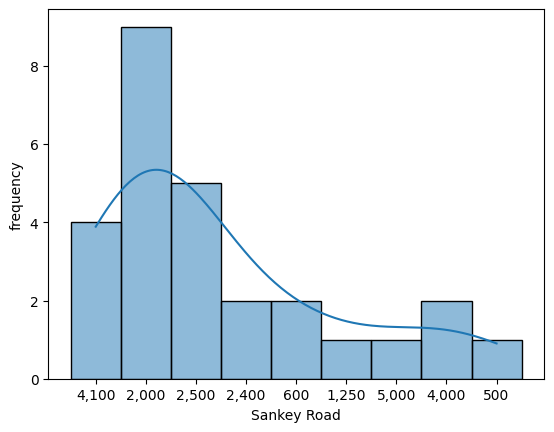

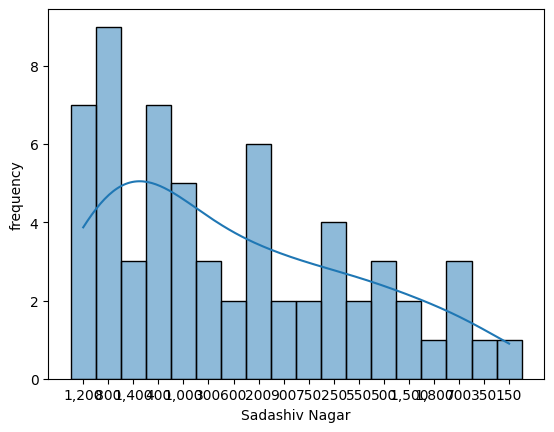

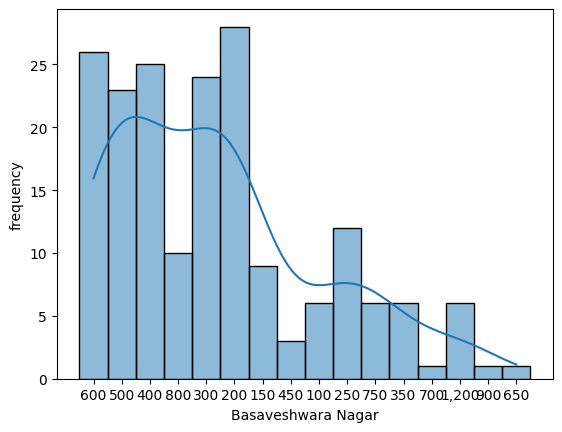

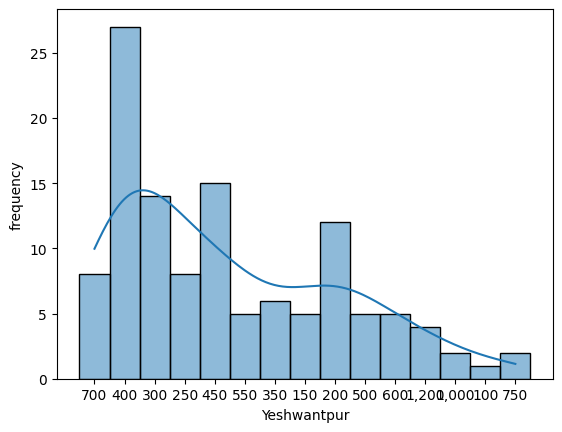

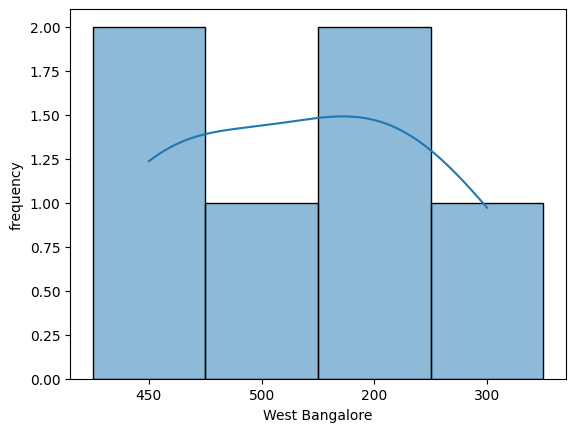

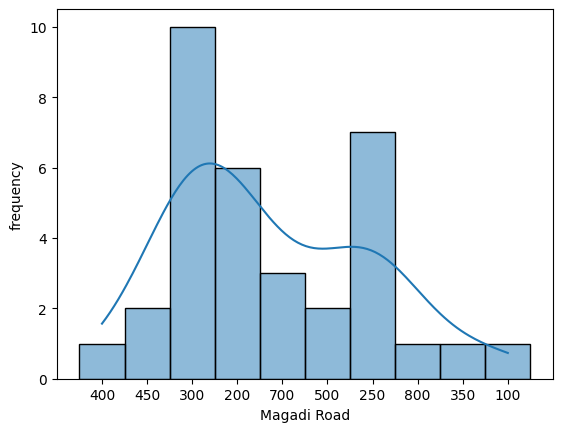

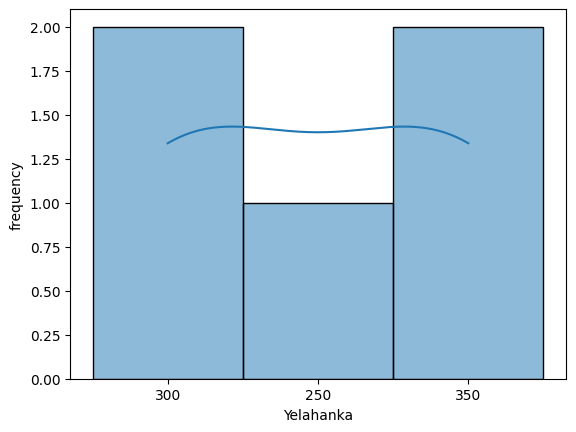

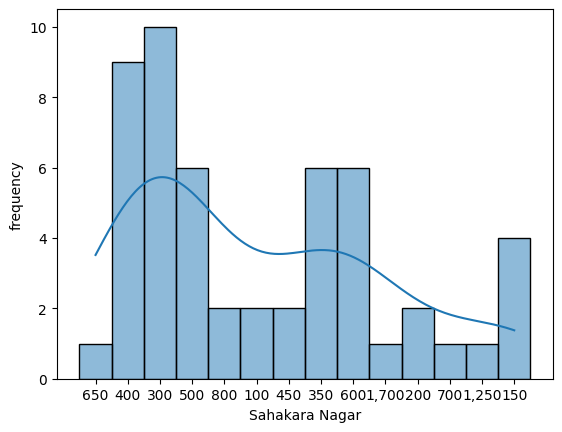

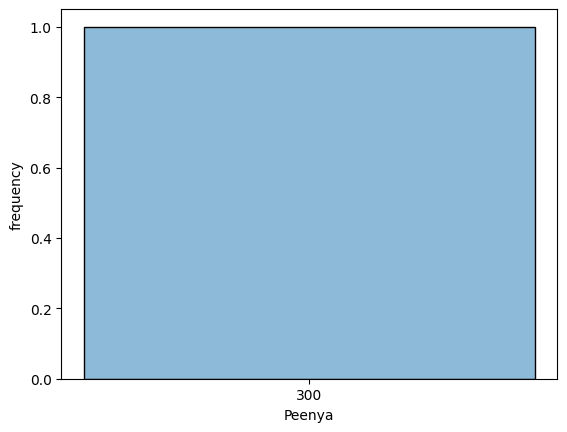

In [31]:
for location in df1['location'].unique():
    new_val = df1[df1['location'] == location]['approx_cost(for two people)']
    sns.histplot(new_val, kde=True)
    plt.xlabel(location)
    plt.ylabel("frequency")
    plt.show()

In [416]:
df1['approx_cost(for two people)'] = df1['approx_cost(for two people)'].str.replace(',','')
df1['approx_cost(for two people)'] = df1['approx_cost(for two people)'].astype('float64')

In [417]:
df1[df1['location'] == 'Yeshwantpur']['approx_cost(for two people)'].quantile(0.75)

500.0

In [418]:
location_based_cost_75 = df1.groupby('location')['approx_cost(for two people)'].quantile(0.75)

In [419]:
location_based_cost_75.head()

location
BTM                  500.0
Banashankari         600.0
Banaswadi            500.0
Bannerghatta Road    600.0
Basavanagudi         500.0
Name: approx_cost(for two people), dtype: float64

In [420]:
df_location_based_75 = pd.DataFrame(location_based_cost_75)
df_location_based_75.head()

approx_cost(for two people)
location                                      
BTM                                      500.0
Banashankari                             600.0
Banaswadi                                500.0
Bannerghatta Road                        600.0
Basavanagudi                             500.0

In [421]:
location_sortrd_by_cost = df_location_based_75.sort_values(by='approx_cost(for two people)').index.to_list()

In [422]:
location_sortrd_by_cost

['Peenya',
 'Yelahanka',
 'Magadi Road',
 'KR Puram',
 'Ejipura',
 'City Market',
 'CV Raman Nagar',
 'Shivajinagar',
 'Koramangala 8th Block',
 'Jakkur',
 'Uttarahalli',
 'Varthur Main Road, Whitefield',
 'South Bangalore',
 'Koramangala',
 'East Bangalore',
 'West Bangalore',
 'North Bangalore',
 'Wilson Garden',
 'Central Bangalore',
 'Vijay Nagar',
 'Jalahalli',
 'Kaggadasapura',
 'Kengeri',
 'Koramangala 1st Block',
 'BTM',
 'Majestic',
 'Rajajinagar',
 'Rammurthy Nagar',
 'Sahakara Nagar',
 'Sanjay Nagar',
 'Thippasandra',
 'Kumaraswamy Layout',
 'RT Nagar',
 'Yeshwantpur',
 'Commercial Street',
 'HBR Layout',
 'Banaswadi',
 'ITPL Main Road, Whitefield',
 'Basavanagudi',
 'Bommanahalli',
 'Hennur',
 'Jeevan Bhima Nagar',
 'Nagawara',
 'Brookefield',
 'Shanti Nagar',
 'Mysore Road',
 'Kanakapura Road',
 'Marathahalli',
 'Malleshwaram',
 'HSR',
 'Electronic City',
 'Vasanth Nagar',
 'Bannerghatta Road',
 'Frazer Town',
 'Kammanahalli',
 'Banashankari',
 'Domlur',
 'Basaveshwara Nag

In [423]:
# sns.heatmap(df1[['approx_cost(for two people)']].isna())

In [424]:
df1['approx_cost(for two people)'].isna().sum()

346

In [425]:
df1['approx_cost(for two people)'] = df1['approx_cost(for two people)'].fillna(df1['approx_cost(for two people)'].median())

In [426]:
df1['approx_cost(for two people)'].isna().sum()

0

In [427]:
df1['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

## encode location

### 1. Encoding location

In [428]:
df1['location'].isna().sum()

21

In [429]:
df1['location'].dropna(inplace=True)

In [430]:
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder

In [431]:
encode_location = OrdinalEncoder(categories=[location_sortrd_by_cost])

In [432]:
df1 = df1.dropna(subset=['location'])

In [433]:
df1.location.isna().sum()

0

In [434]:
df1['location_encoded'] = encode_location.fit_transform(df1[['location']])

In [435]:
df1.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  
0          Buffet    Banashankari              55.0  
1          Buffet    Banashankari              55.0  
2          Buffet    Banashankari              55.0  
3          Buffet    Banashankari              55.0  
4          Buffet    Banashankari              38.0

### 2. encode rest_type

In [436]:
df1['rest_type'] = df1['rest_type'].str.strip().str.lower()

In [437]:
df1['rest_type'].unique()

array(['casual dining', 'cafe, casual dining', 'quick bites',
       'casual dining, cafe', 'cafe', 'quick bites, cafe',
       'cafe, quick bites', 'delivery', 'mess', 'dessert parlor',
       'bakery, dessert parlor', 'pub', 'bakery', 'takeaway, delivery',
       'fine dining', 'beverage shop', 'sweet shop', 'bar',
       'beverage shop, quick bites', 'confectionery',
       'quick bites, beverage shop', 'dessert parlor, sweet shop',
       'bakery, quick bites', 'sweet shop, quick bites', 'kiosk',
       'food truck', 'quick bites, dessert parlor',
       'beverage shop, dessert parlor', 'takeaway', 'pub, casual dining',
       'casual dining, bar', 'dessert parlor, beverage shop',
       'quick bites, bakery', 'dessert parlor, quick bites',
       'microbrewery, casual dining', 'lounge', 'bar, casual dining',
       'food court', 'cafe, bakery', nan, 'dhaba',
       'quick bites, sweet shop', 'microbrewery',
       'food court, quick bites', 'pub, bar', 'casual dining, pub',
      

In [438]:
df1['rest_type'].isna().sum()

206

In [439]:
df1['rest_type'].fillna('general', inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_12420\2080460416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['rest_type'].fillna('general', inplace=True)


In [440]:
df1['rest_type'].isna().sum()

0

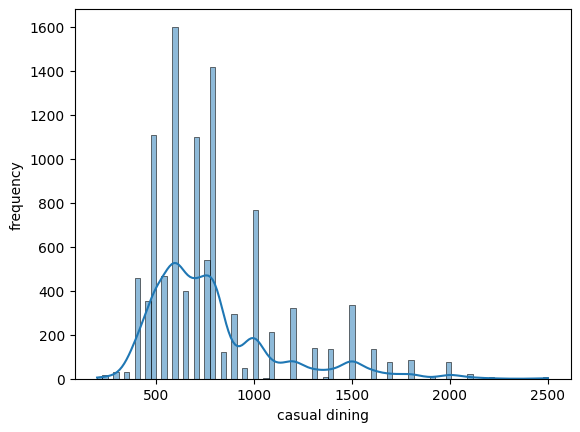

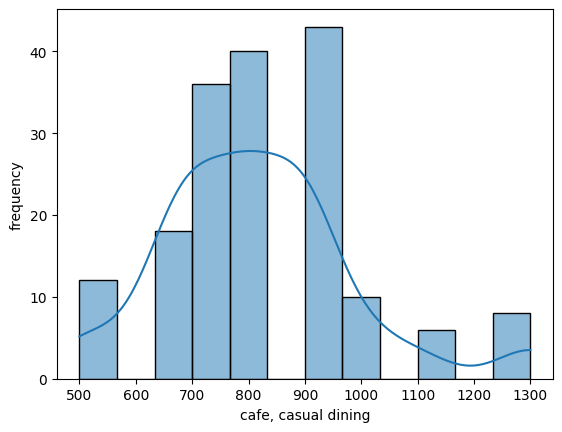

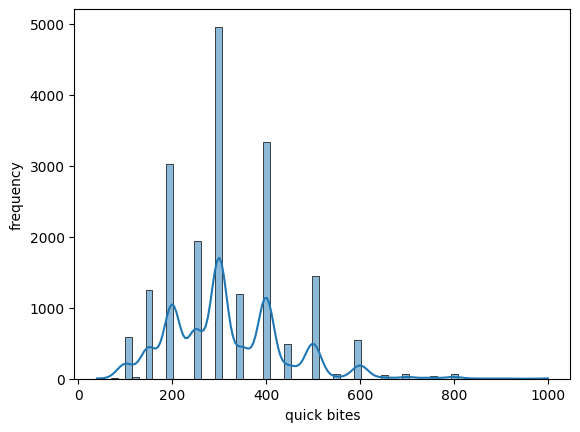

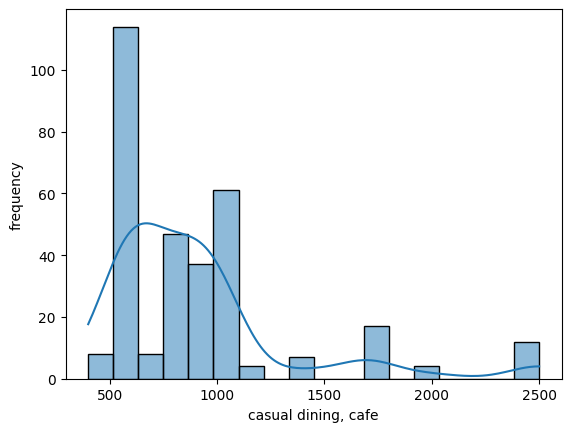

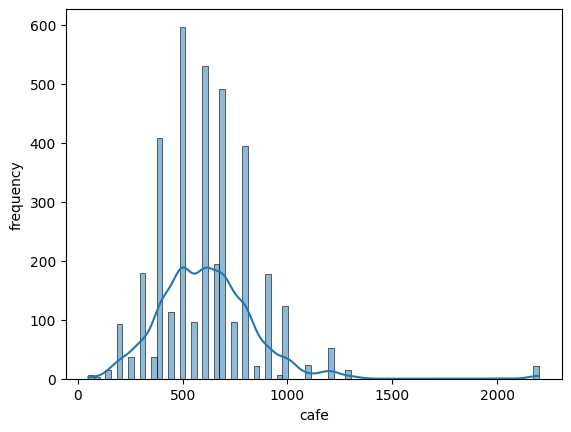

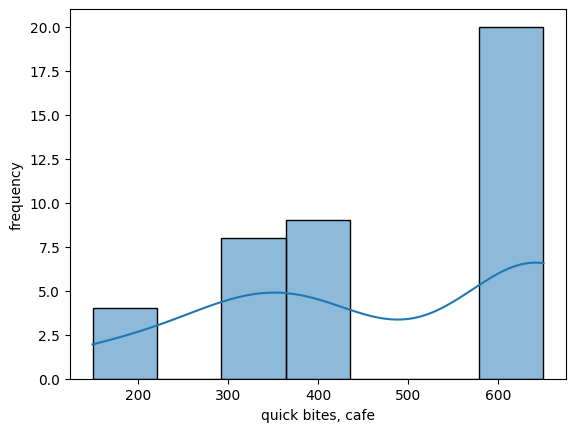

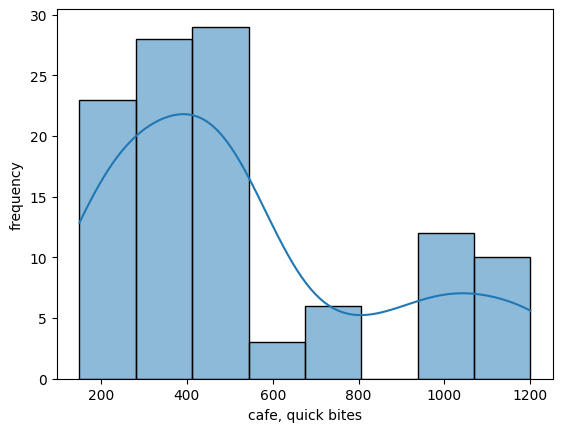

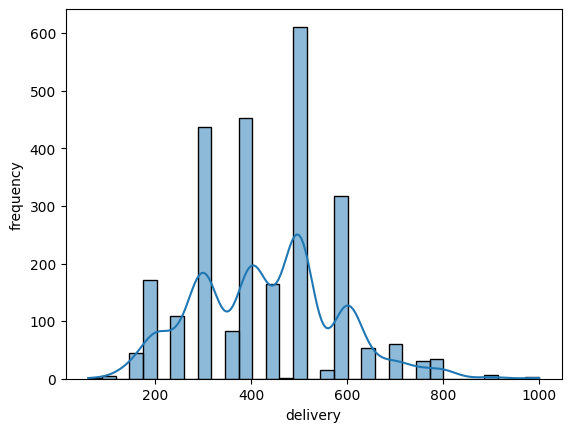

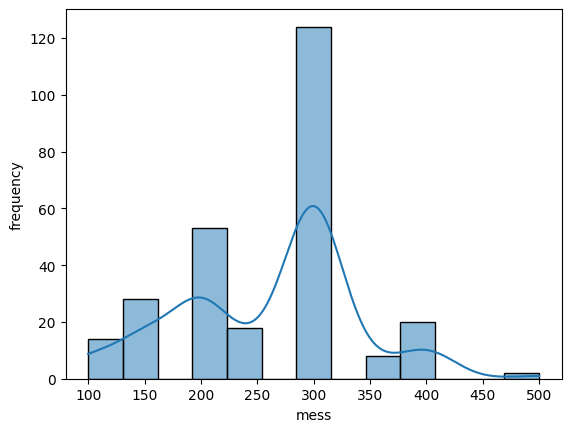

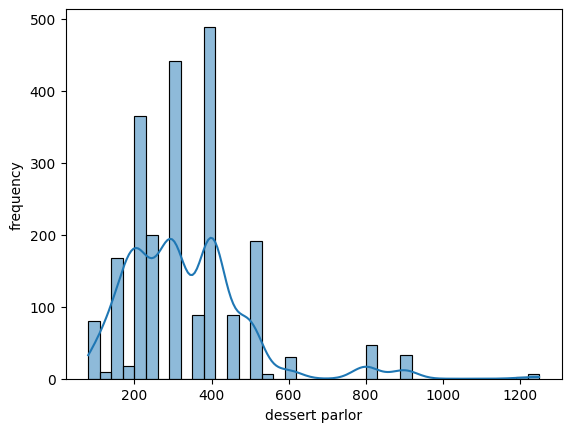

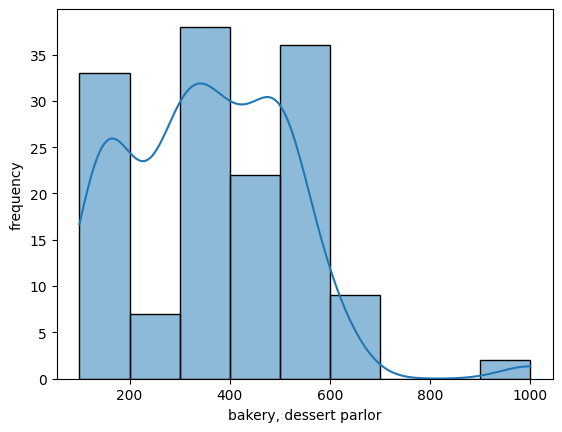

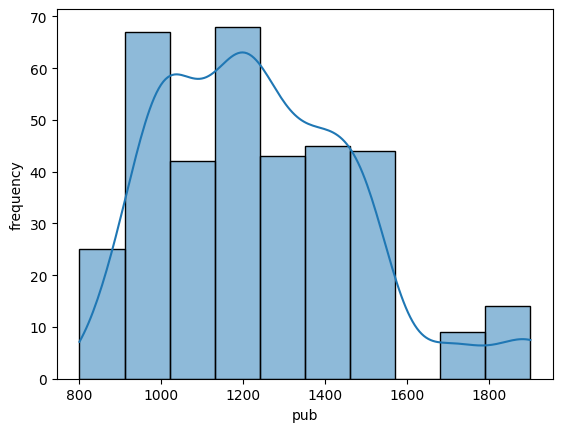

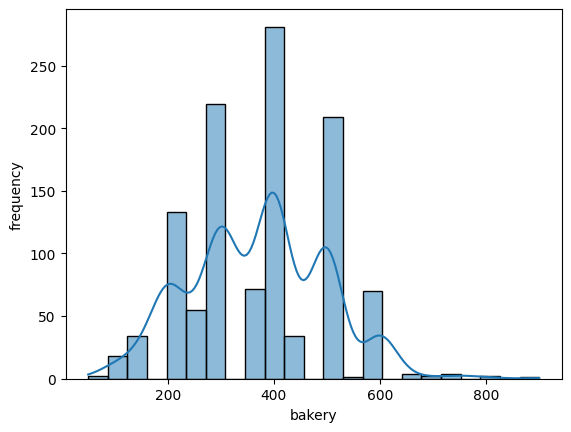

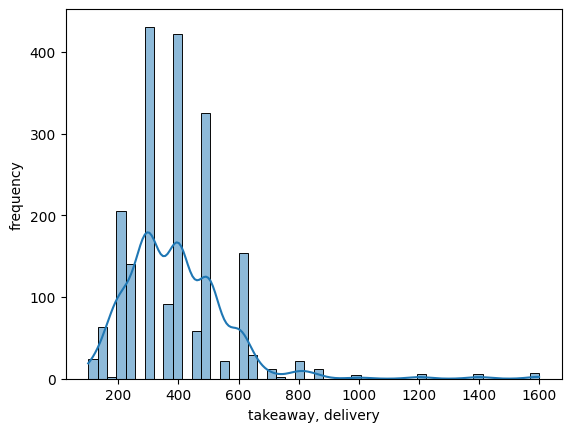

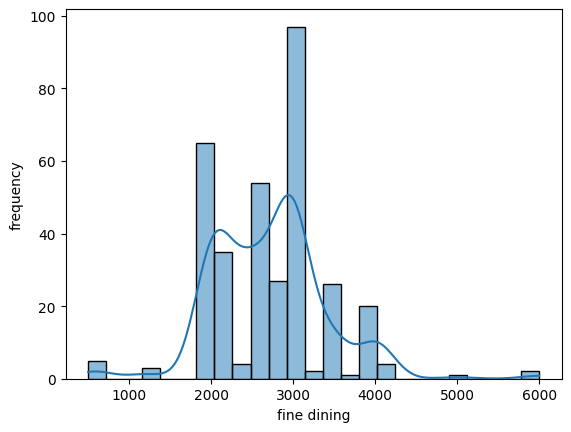

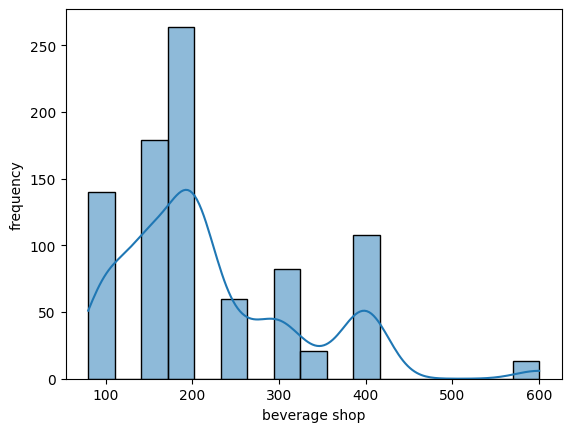

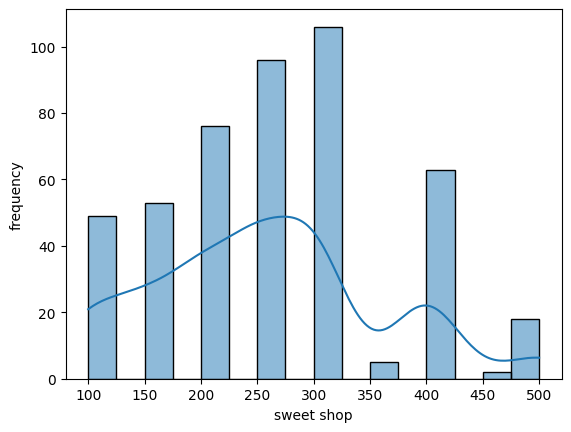

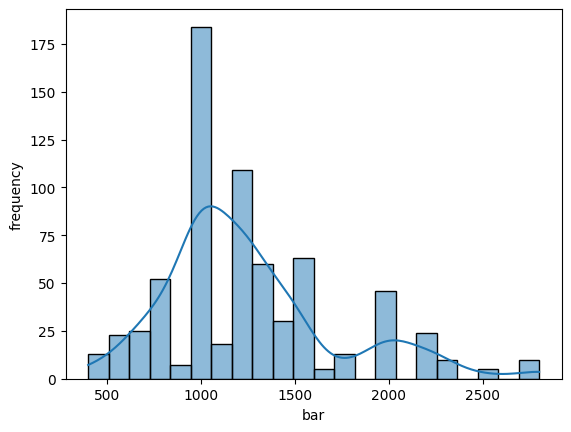

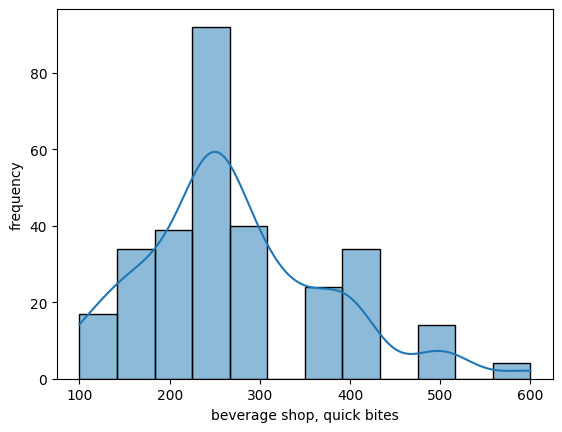

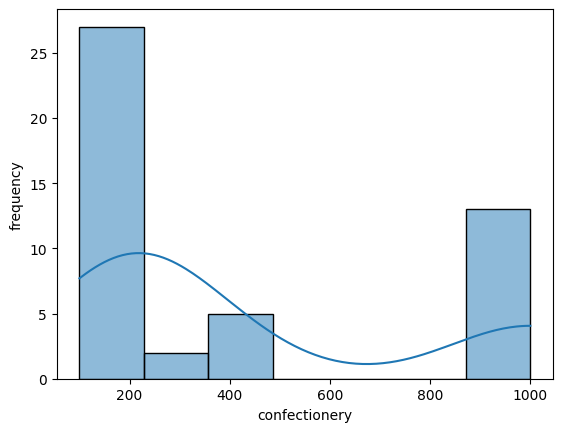

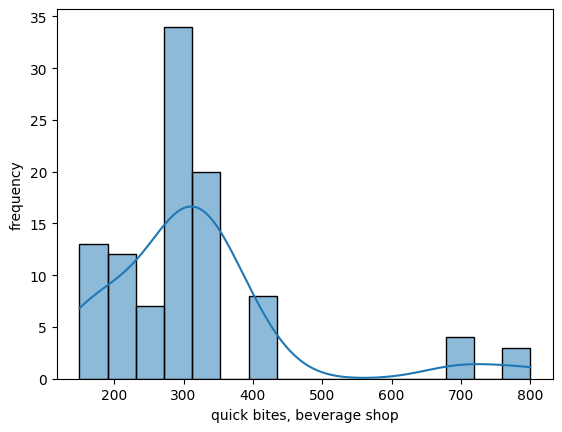

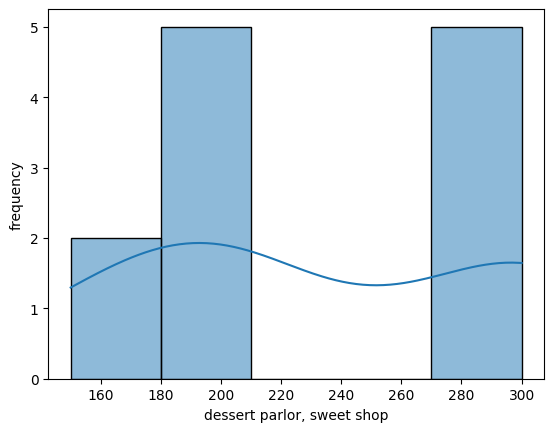

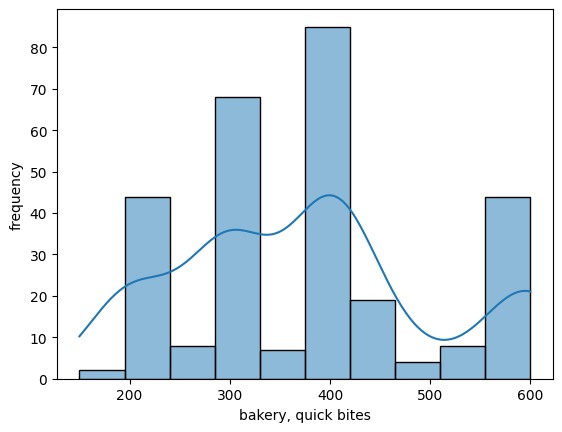

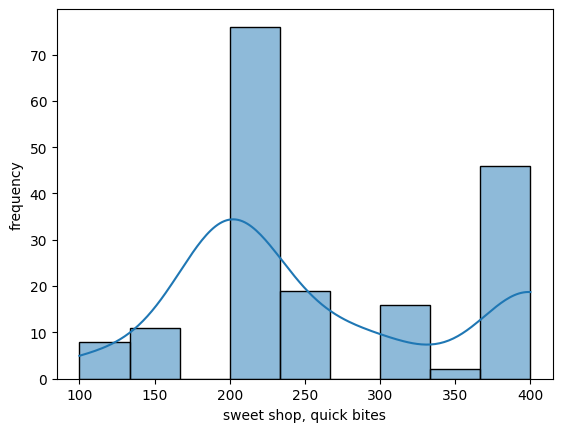

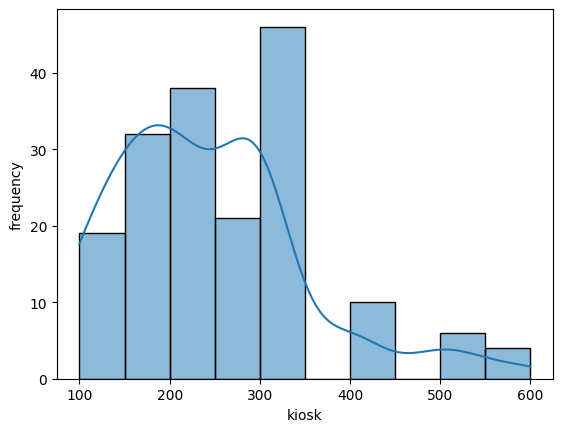

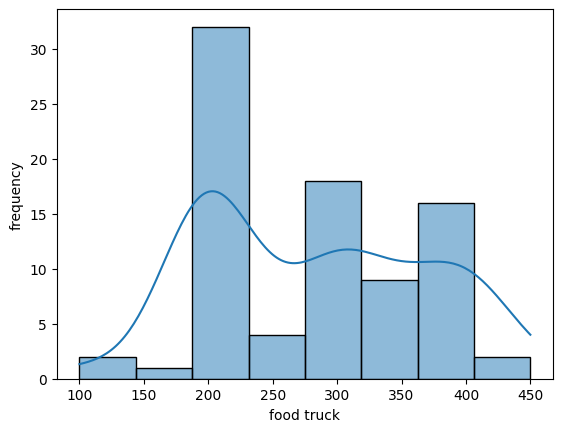

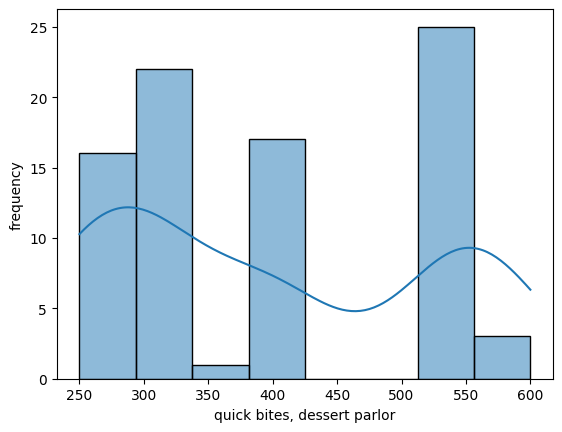

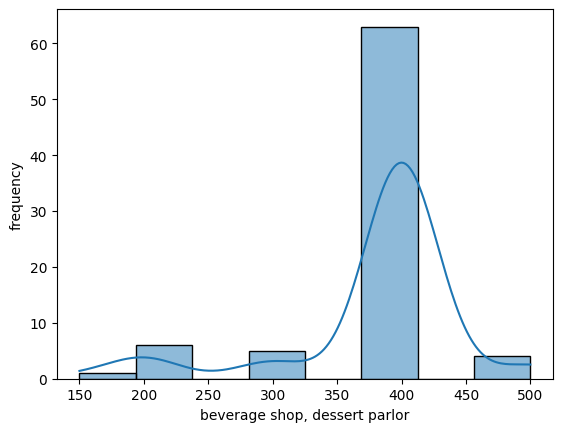

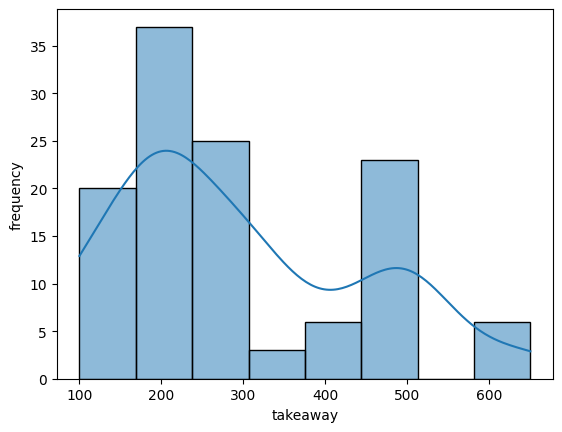

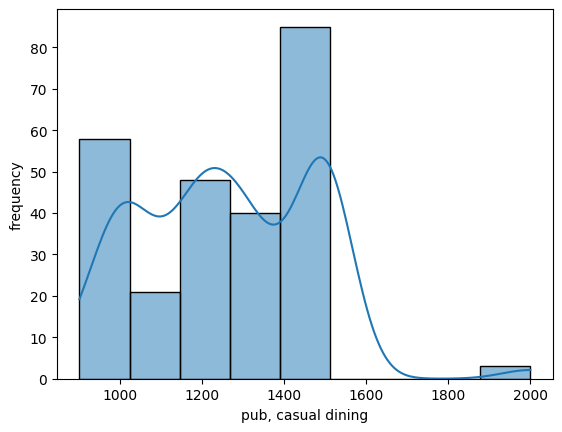

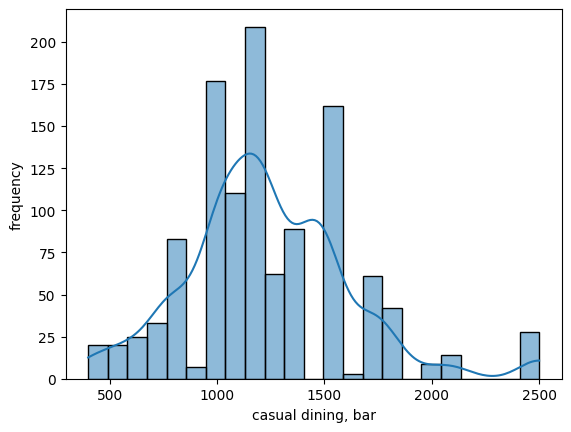

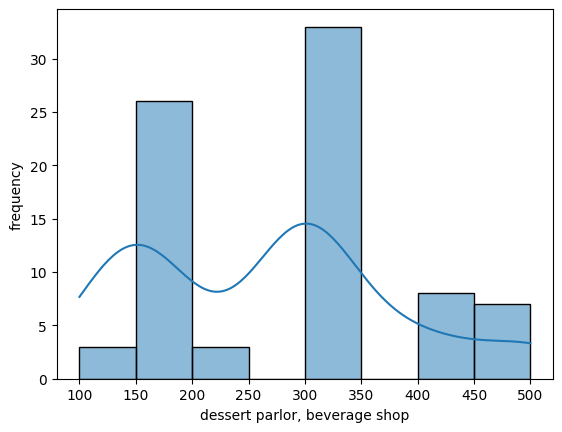

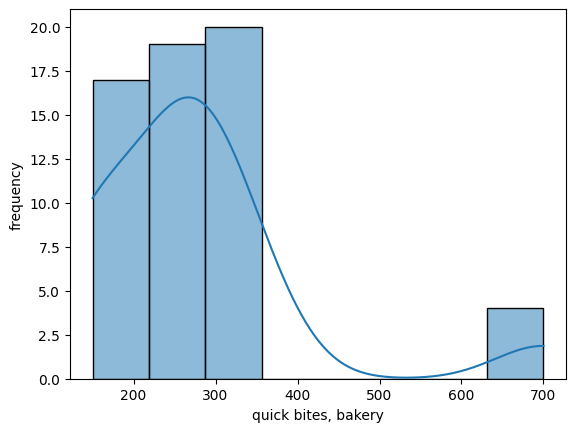

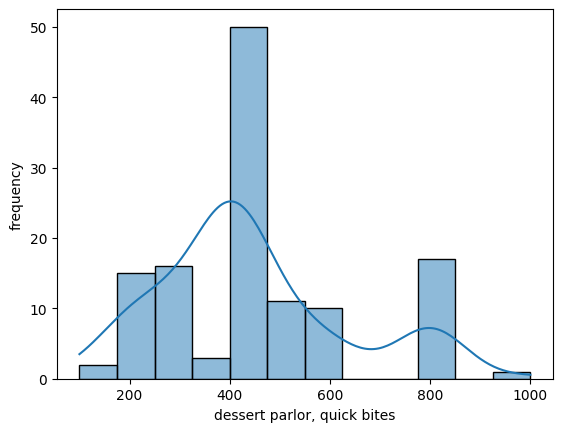

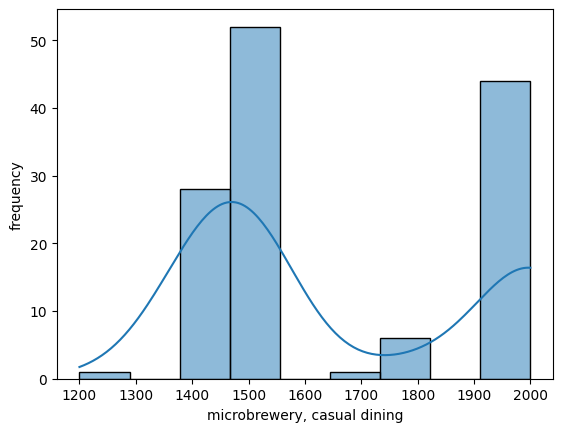

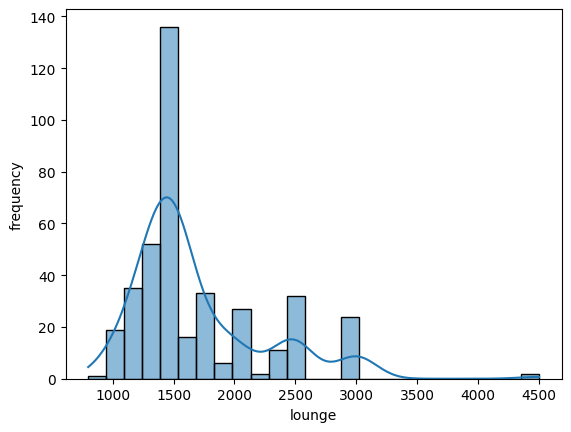

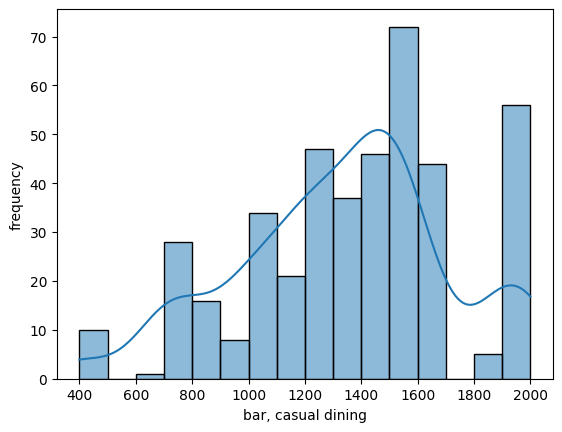

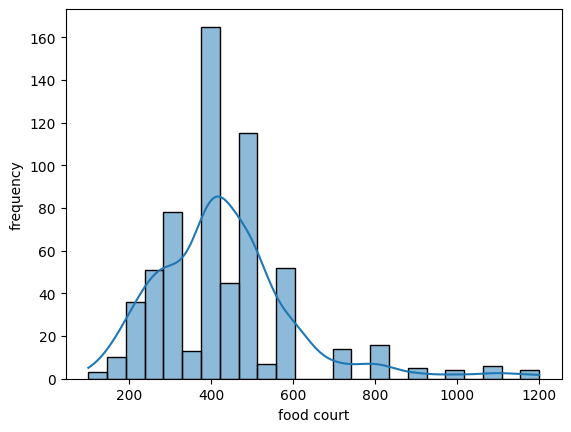

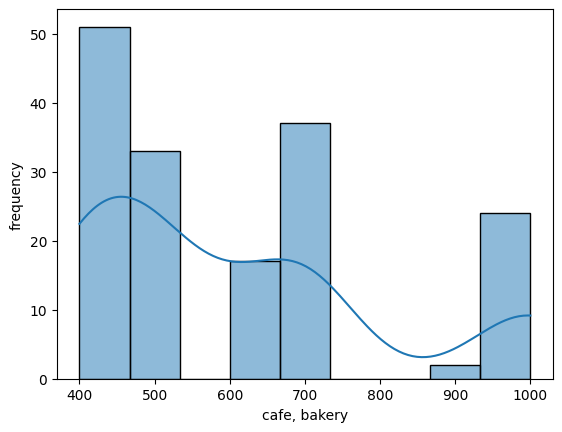

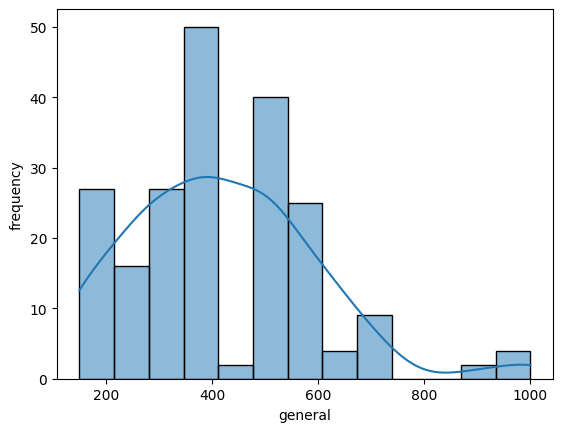

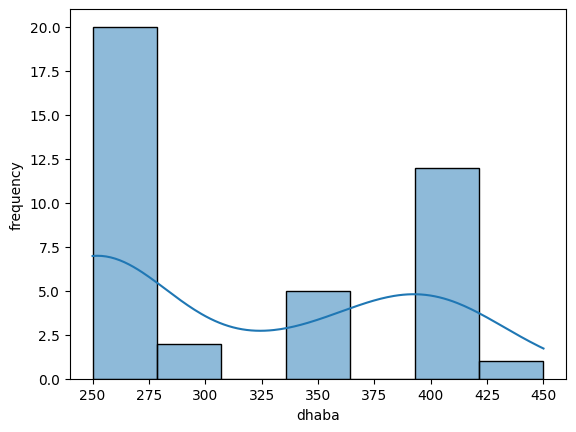

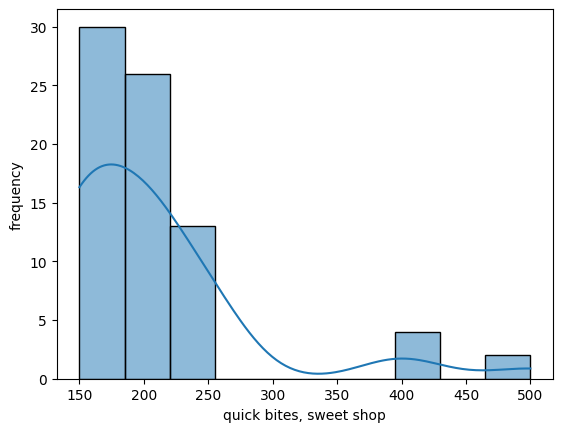

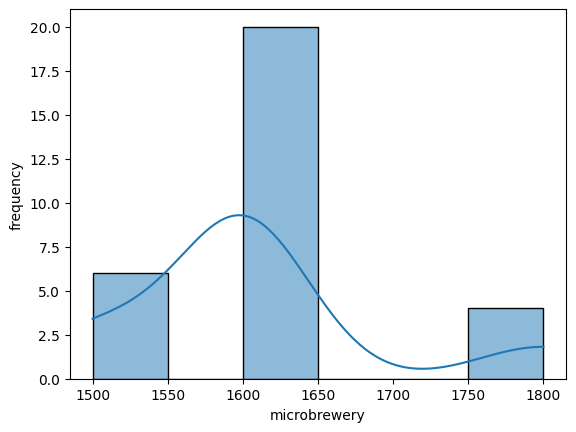

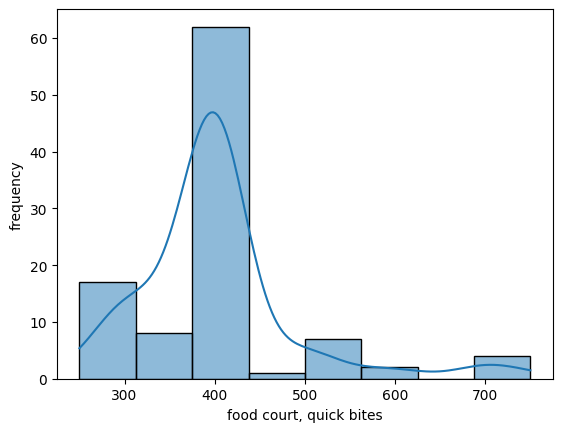

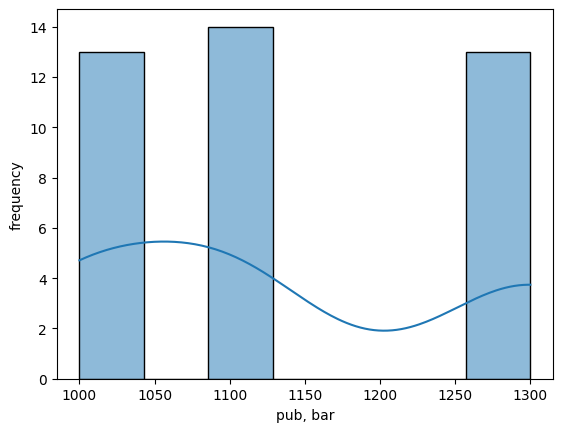

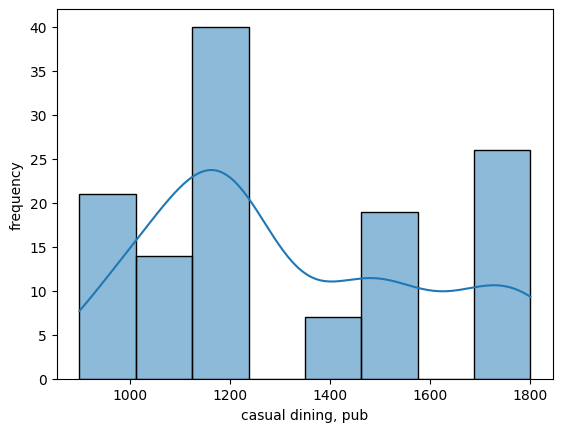

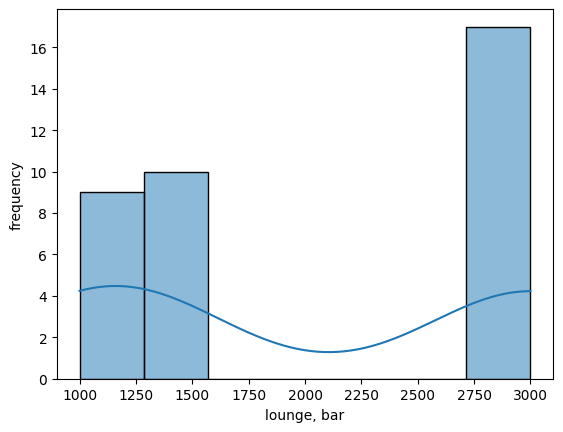

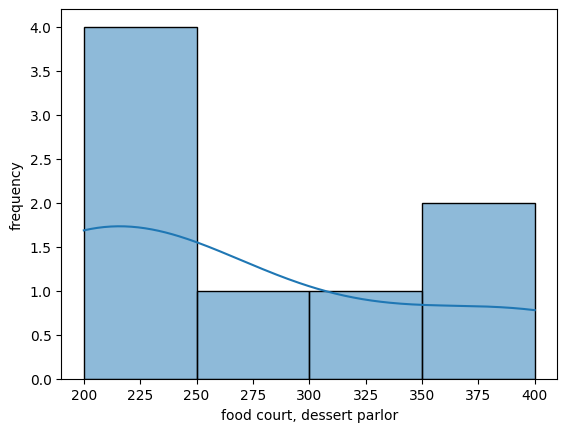

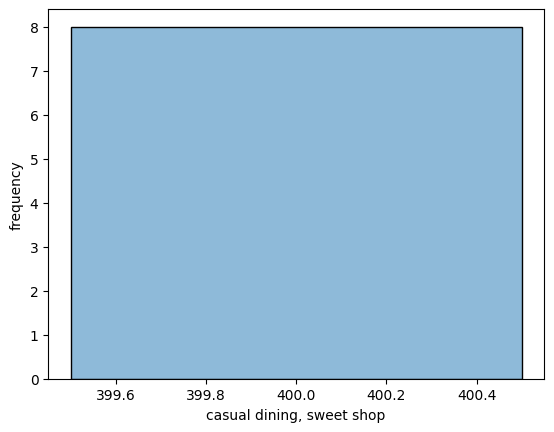

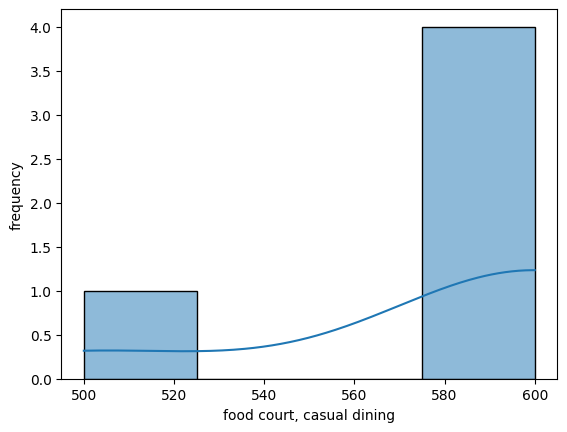

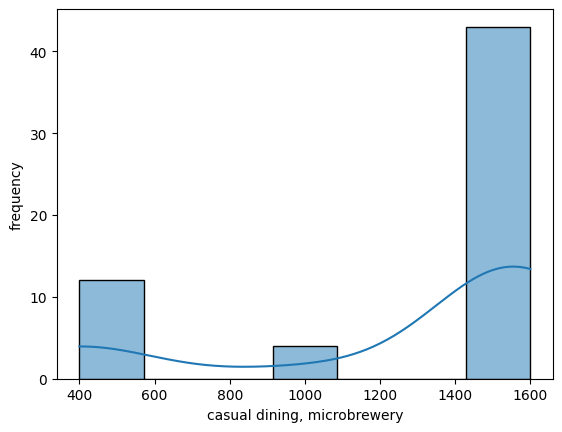

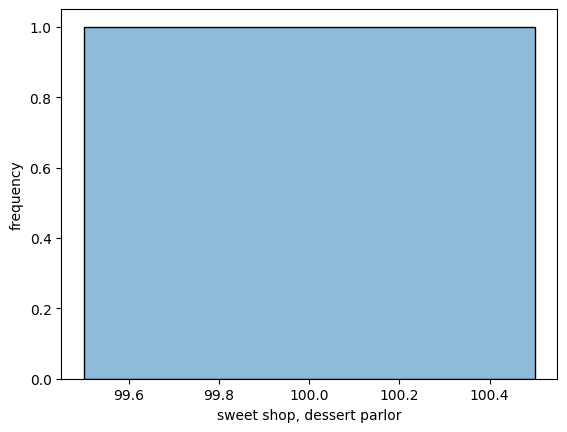

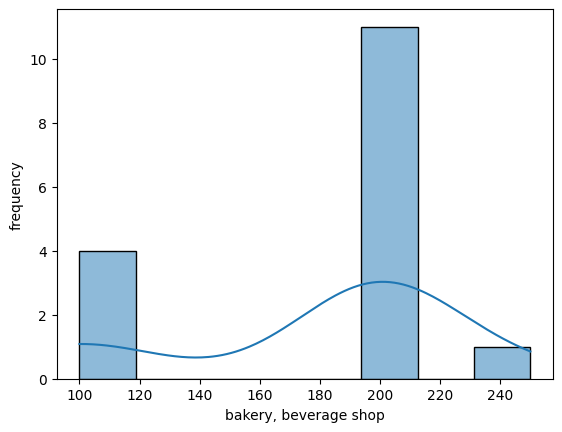

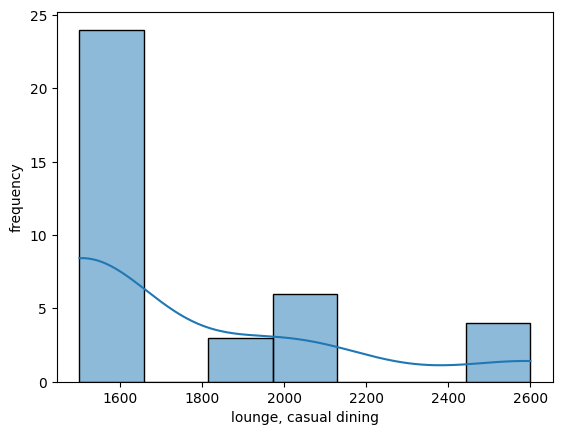

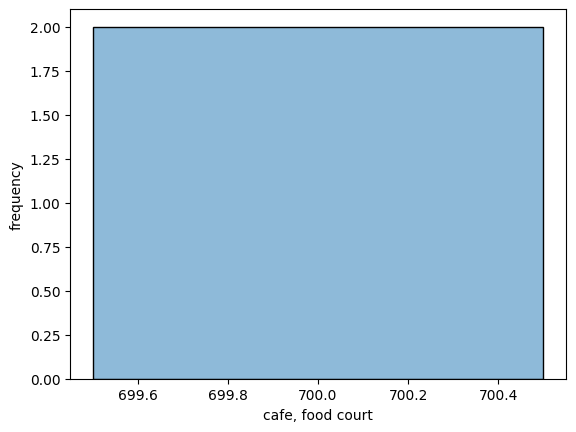

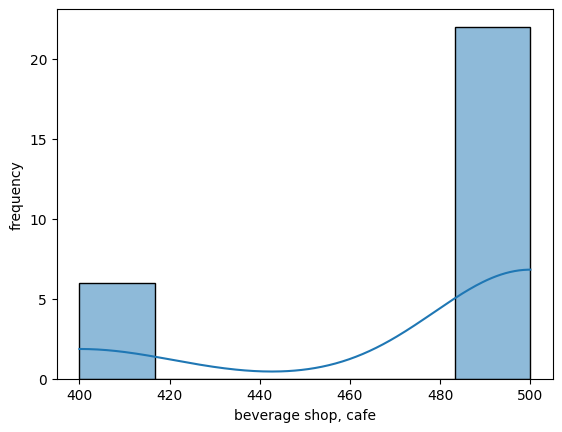

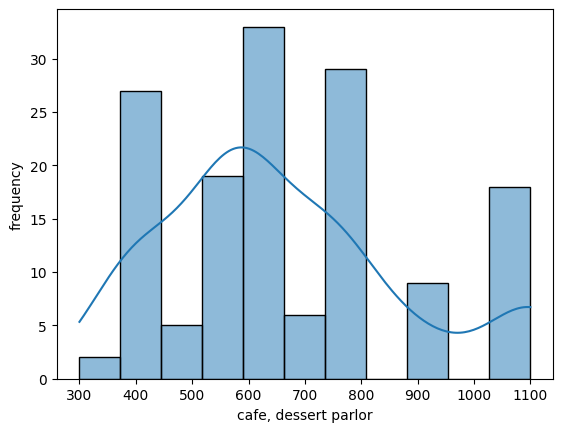

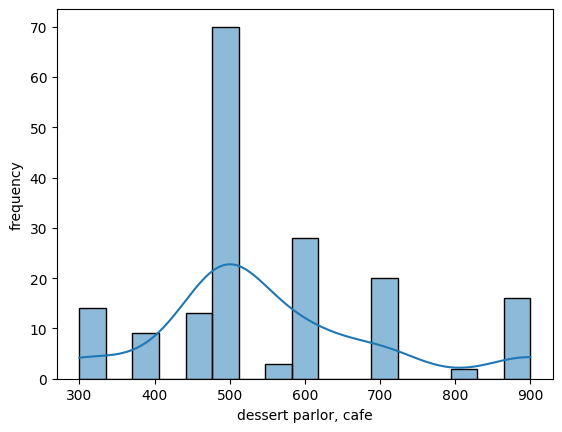

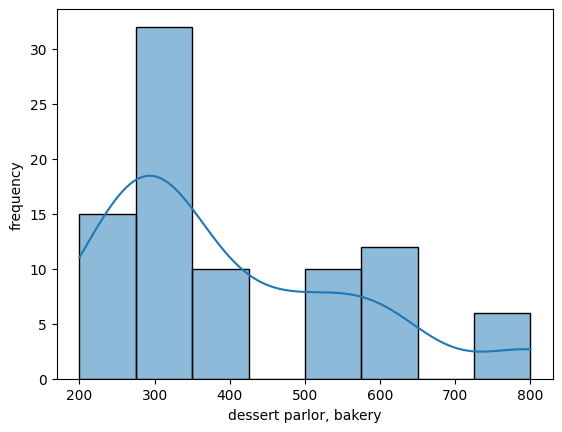

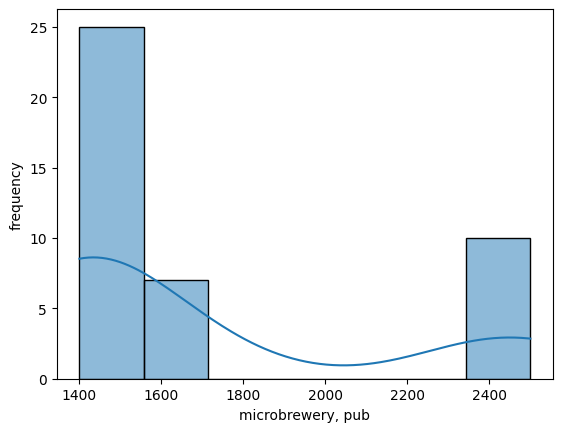

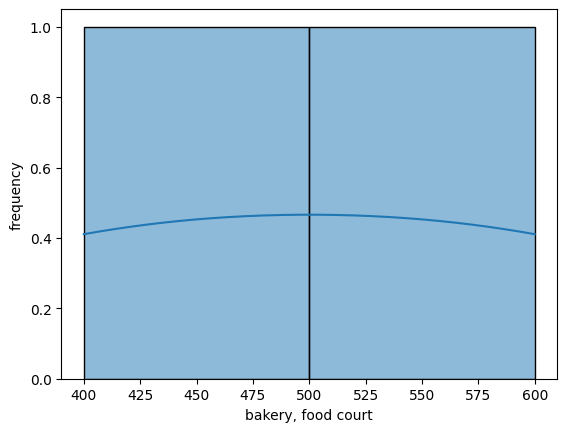

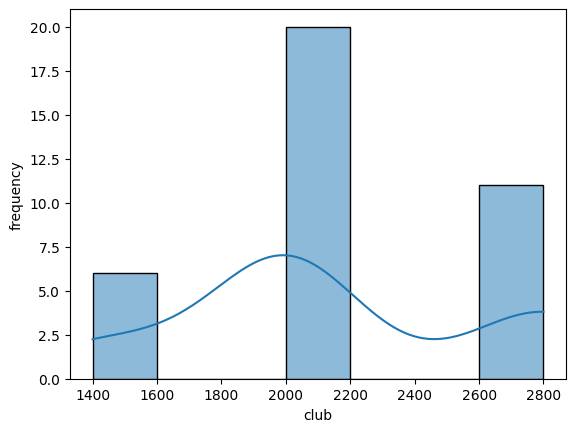

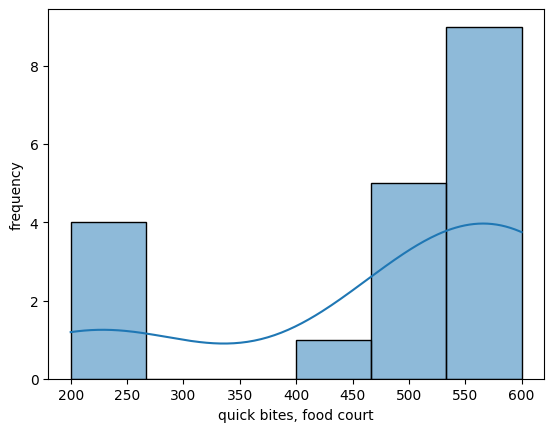

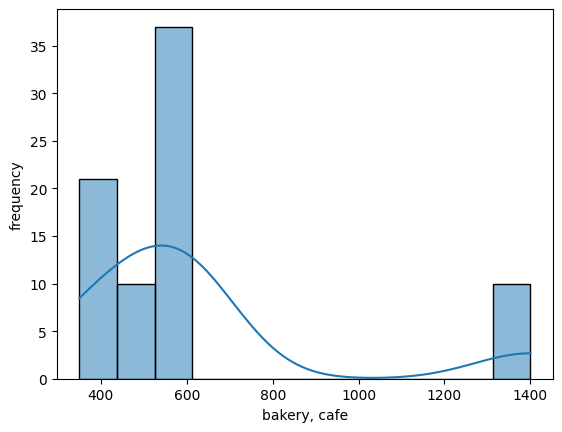

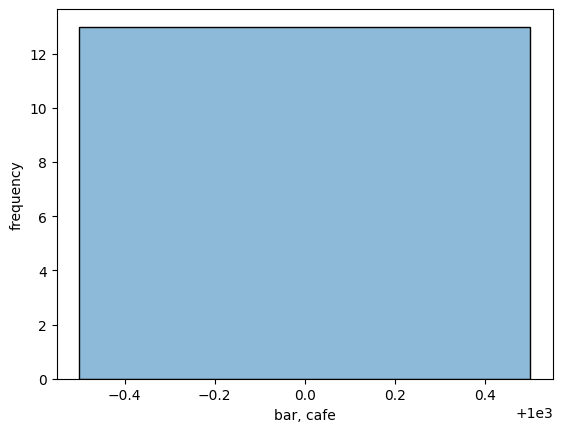

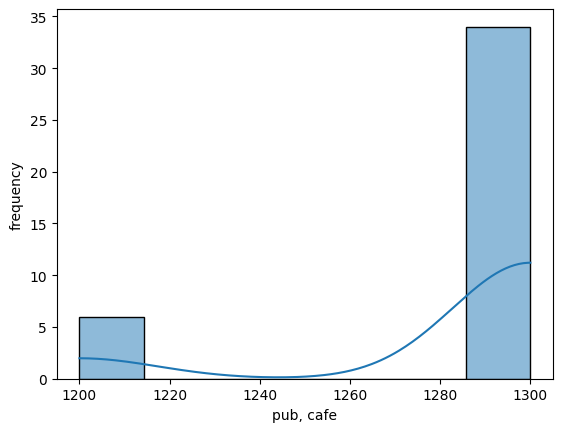

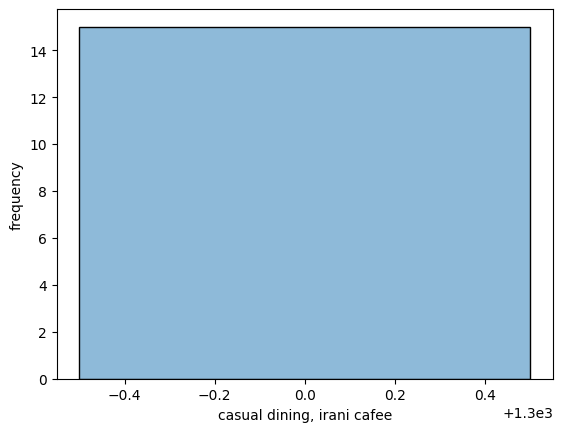

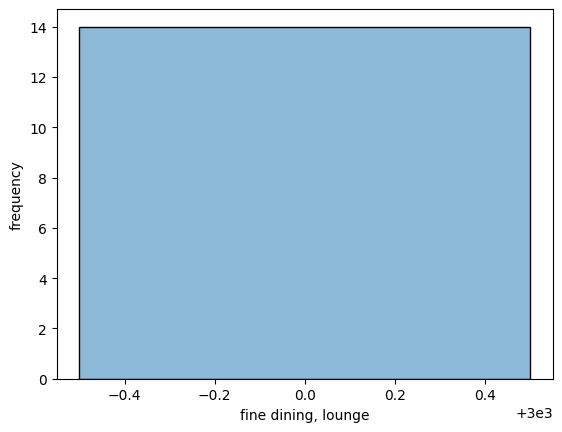

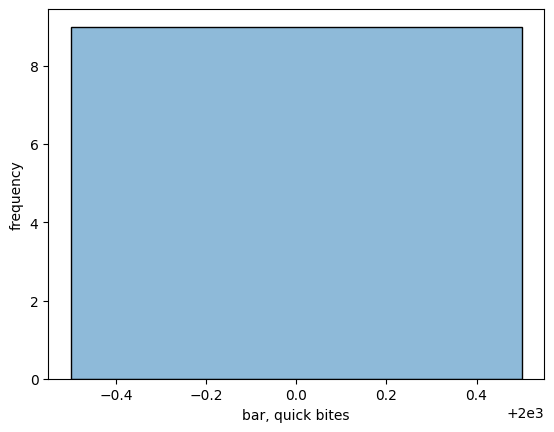

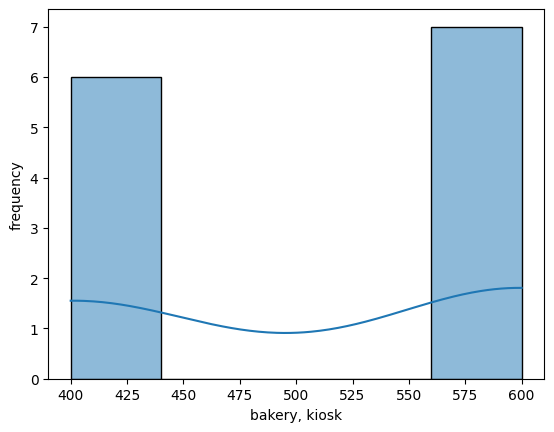

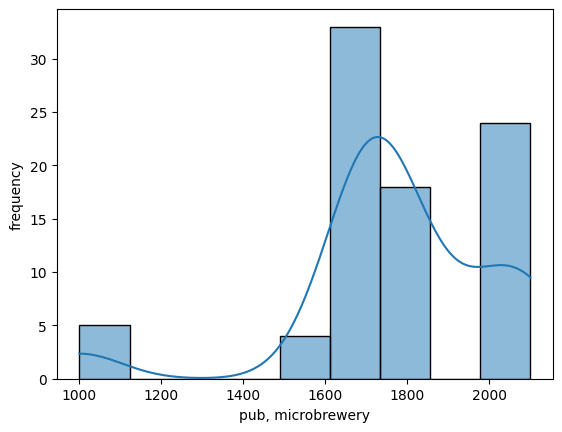

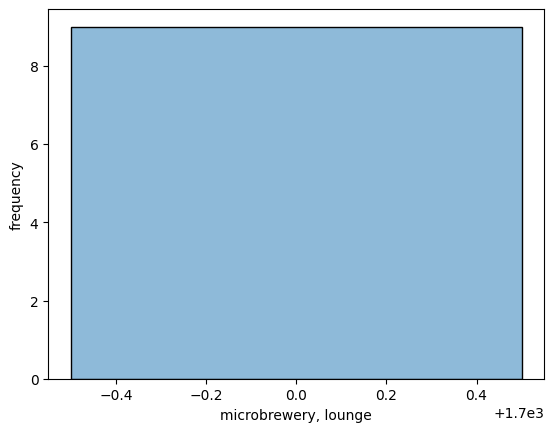

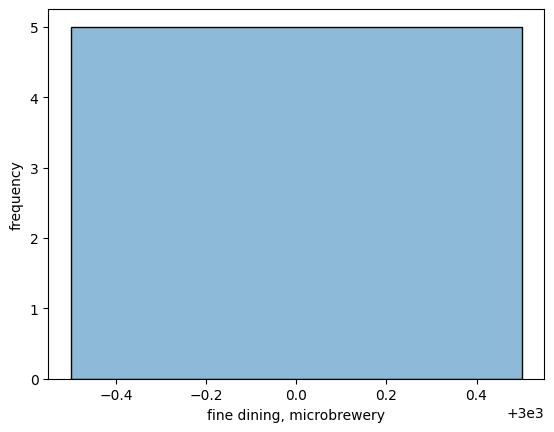

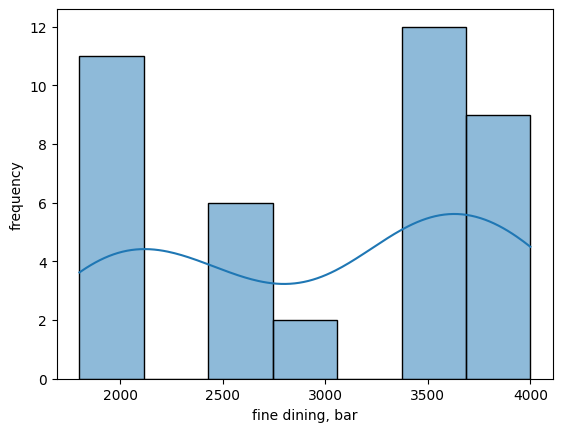

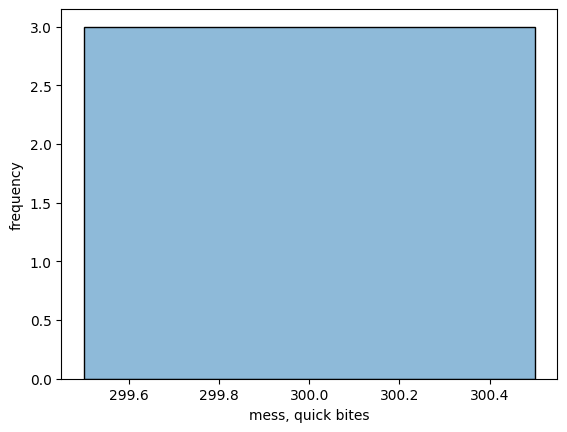

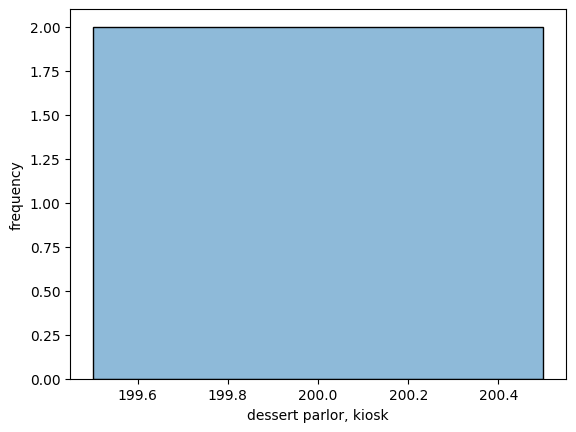

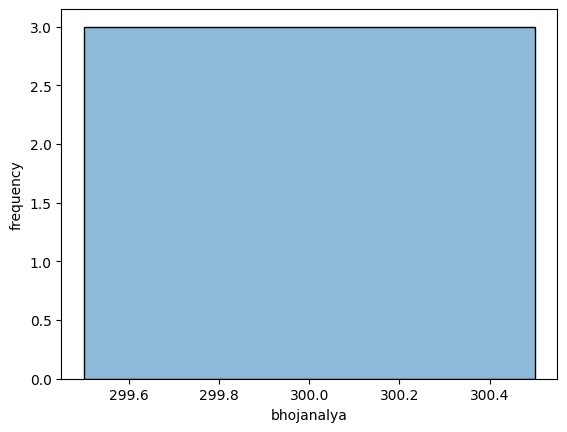

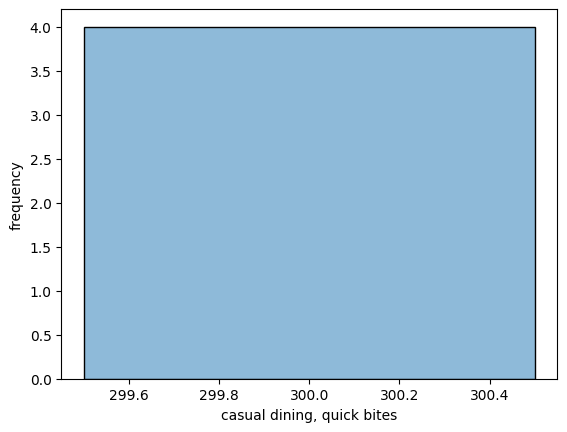

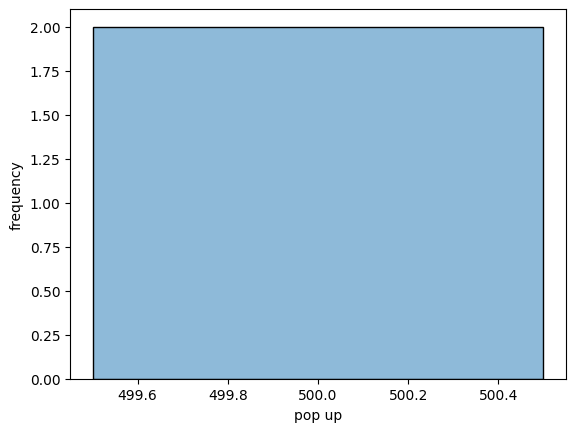

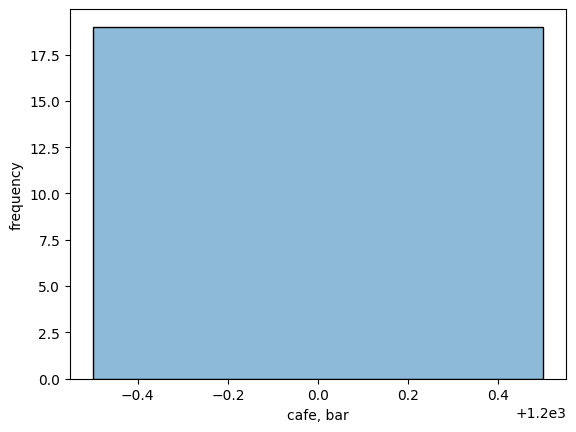

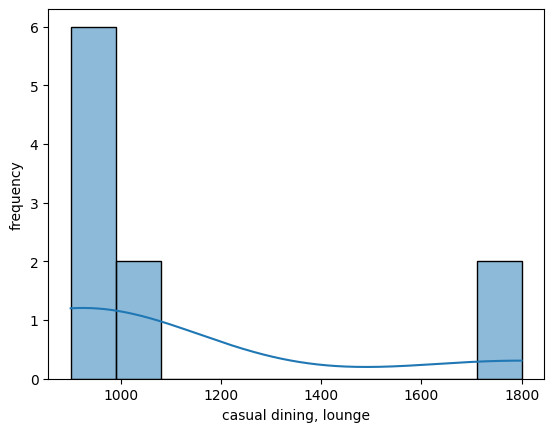

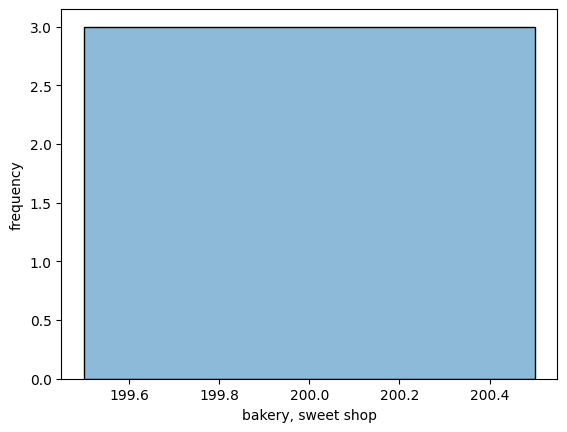

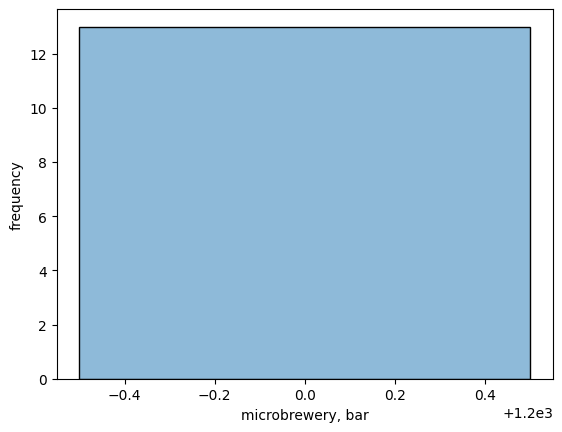

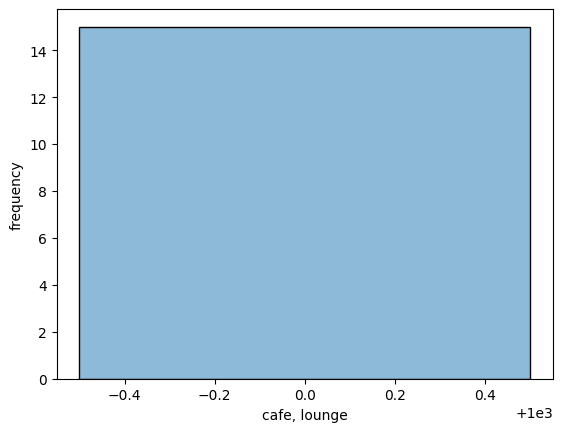

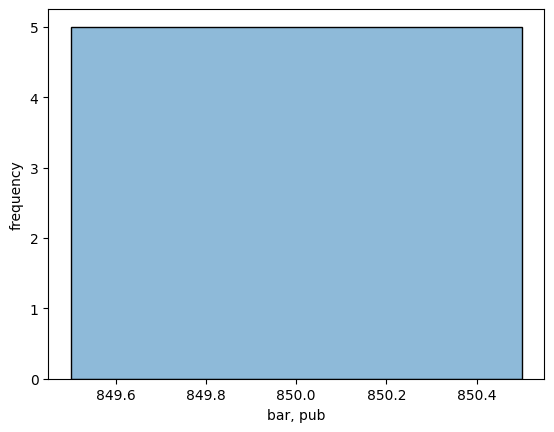

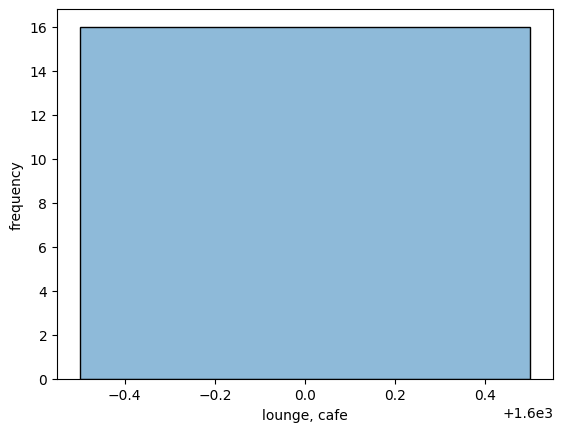

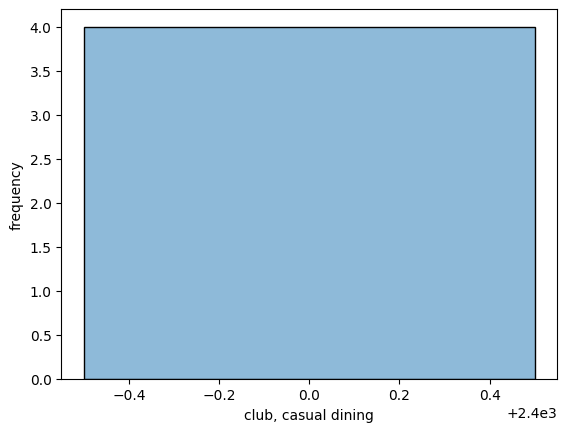

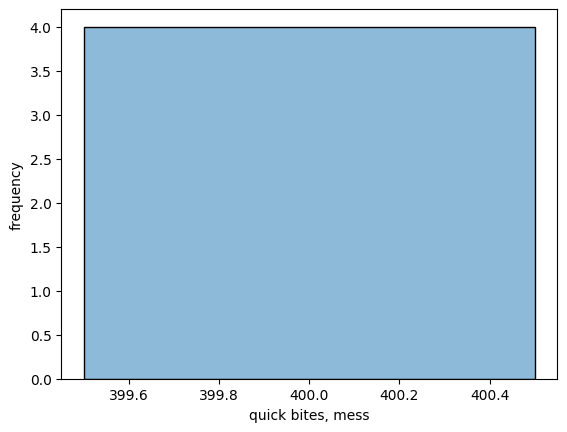

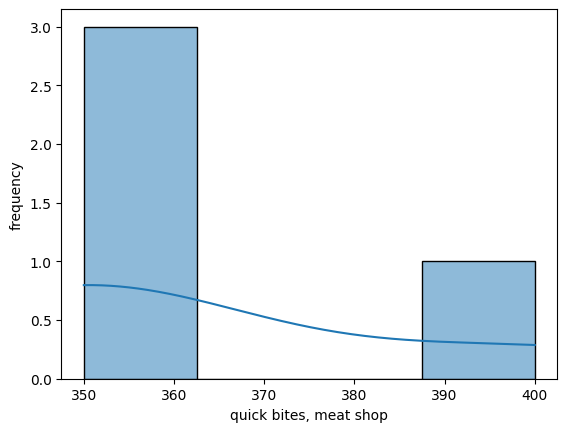

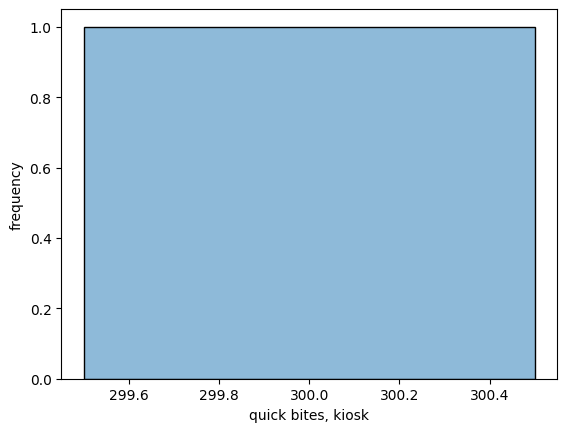

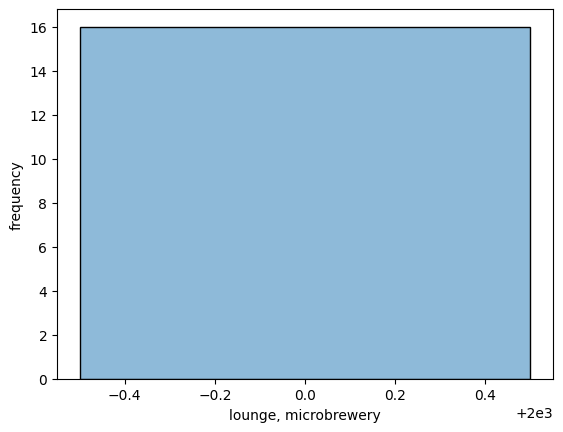

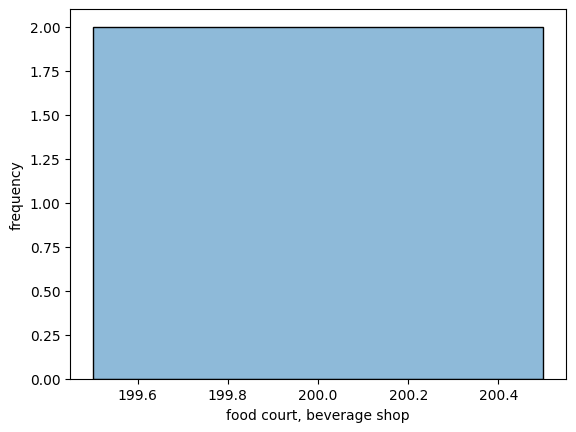

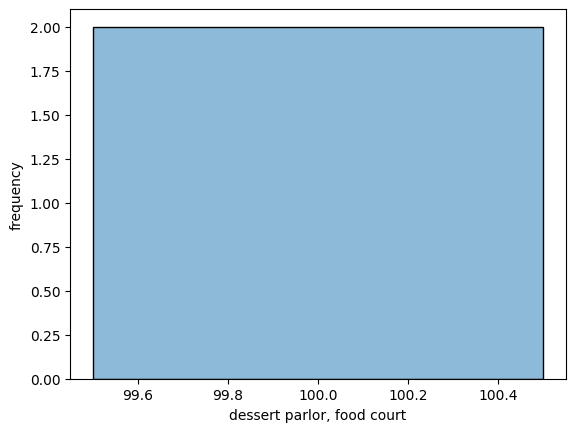

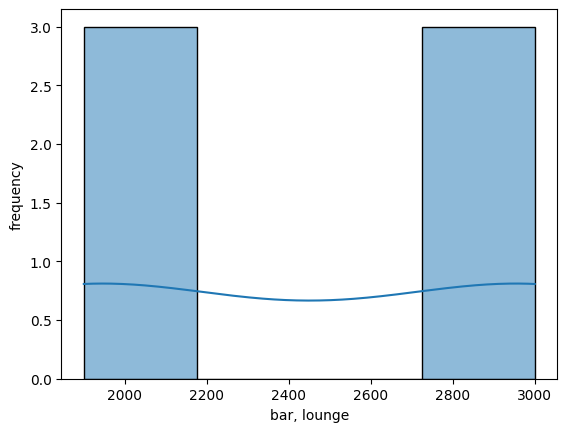

In [390]:
for rest_type in df1['rest_type'].unique():
    new_val = df1[df1['rest_type'] == rest_type]['approx_cost(for two people)']
    sns.histplot(new_val, kde=True)
    plt.xlabel(rest_type)
    plt.ylabel("frequency")
    plt.show()

In [441]:
df_rest_type = pd.DataFrame()

In [442]:
df_rest_type[['part1', 'part2']] = df1['rest_type'].str.strip().str.split(',', expand=True)

In [443]:
df_rest_type.head()

part1           part2
0  casual dining            None
1  casual dining            None
2           cafe   casual dining
3    quick bites            None
4  casual dining            None

In [444]:
df_rest_type['part1'] = df_rest_type['part1'].str.strip()
df_rest_type['part2'] = df_rest_type['part2'].str.strip()

In [445]:
df_rest_type.head()

part1          part2
0  casual dining           None
1  casual dining           None
2           cafe  casual dining
3    quick bites           None
4  casual dining           None

In [446]:
df_rest_type.shape

(51696, 2)

In [447]:
df1.shape

(51696, 14)

In [448]:
combined_series = pd.concat([df_rest_type['part1'], df_rest_type['part2']]).unique()

In [449]:
combined_series

array(['casual dining', 'cafe', 'quick bites', 'delivery', 'mess',
       'dessert parlor', 'bakery', 'pub', 'takeaway', 'fine dining',
       'beverage shop', 'sweet shop', 'bar', 'confectionery', 'kiosk',
       'food truck', 'microbrewery', 'lounge', 'food court', 'general',
       'dhaba', 'club', 'bhojanalya', 'pop up', None, 'irani cafee',
       'meat shop'], dtype=object)

In [450]:
len(combined_series)

27

In [451]:
unique = []
for val in combined_series:
    if val is not None and val.strip() not in unique:
        unique.append(val.strip())
print(unique)

['casual dining', 'cafe', 'quick bites', 'delivery', 'mess', 'dessert parlor', 'bakery', 'pub', 'takeaway', 'fine dining', 'beverage shop', 'sweet shop', 'bar', 'confectionery', 'kiosk', 'food truck', 'microbrewery', 'lounge', 'food court', 'general', 'dhaba', 'club', 'bhojanalya', 'pop up', 'irani cafee', 'meat shop']


In [452]:
unique_df = pd.DataFrame(unique, columns=['value'])
unique_df

value
0    casual dining
1             cafe
2      quick bites
3         delivery
4             mess
5   dessert parlor
6           bakery
7              pub
8         takeaway
9      fine dining
10   beverage shop
11      sweet shop
12             bar
13   confectionery
14           kiosk
15      food truck
16    microbrewery
17          lounge
18      food court
19         general
20           dhaba
21            club
22      bhojanalya
23          pop up
24     irani cafee
25       meat shop

In [453]:
dummy_df = pd.DataFrame(0, index=df_rest_type.index, columns=unique_df['value'])

In [454]:
# it has only 0's
dummy_df.head()

value  casual dining  cafe  quick bites  delivery  mess  dessert parlor  \
0                  0     0            0         0     0               0   
1                  0     0            0         0     0               0   
2                  0     0            0         0     0               0   
3                  0     0            0         0     0               0   
4                  0     0            0         0     0               0   

value  bakery  pub  takeaway  fine dining  beverage shop  sweet shop  bar  \
0           0    0         0            0              0           0    0   
1           0    0         0            0              0           0    0   
2           0    0         0            0              0           0    0   
3           0    0         0            0              0           0    0   
4           0    0         0            0              0           0    0   

value  confectionery  kiosk  food truck  microbrewery  lounge  food court  \
0                  0      0           0             0       0           0   
1                  0      0           0             0       0           0   
2                  0      0           0             0       0           0   
3                  0      0           0             0       0           0   
4                  0      0           0             0       0           0   

value  general  dhaba  club  bhojanalya  pop up  irani cafee  meat shop  
0            0      0     0           0       0            0          0  
1            0      0     0           0       0            0          0  
2            0      0     0           0       0            0          0  
3            0      0     0           0       0            0          0  
4            0      0     0           0       0            0          0

In [455]:
# updated the dummy columns with 1, if they exixt in the df_rest_type, eaither of the columns.

for category in unique_df['value']:
    dummy_df[category] = df_rest_type.apply(lambda row: 1 if (row['part1'] == category or row['part2'] == category) else 0, axis=1)

In [456]:
dummy_df.head()

value  casual dining  cafe  quick bites  delivery  mess  dessert parlor  \
0                  1     0            0         0     0               0   
1                  1     0            0         0     0               0   
2                  1     1            0         0     0               0   
3                  0     0            1         0     0               0   
4                  1     0            0         0     0               0   

value  bakery  pub  takeaway  fine dining  beverage shop  sweet shop  bar  \
0           0    0         0            0              0           0    0   
1           0    0         0            0              0           0    0   
2           0    0         0            0              0           0    0   
3           0    0         0            0              0           0    0   
4           0    0         0            0              0           0    0   

value  confectionery  kiosk  food truck  microbrewery  lounge  food court  \
0                  0      0           0             0       0           0   
1                  0      0           0             0       0           0   
2                  0      0           0             0       0           0   
3                  0      0           0             0       0           0   
4                  0      0           0             0       0           0   

value  general  dhaba  club  bhojanalya  pop up  irani cafee  meat shop  
0            0      0     0           0       0            0          0  
1            0      0     0           0       0            0          0  
2            0      0     0           0       0            0          0  
3            0      0     0           0       0            0          0  
4            0      0     0           0       0            0          0

In [457]:
df_encoded = pd.concat([df_rest_type, dummy_df], axis=1)

In [458]:
df_encoded.shape

(51696, 28)

In [459]:
df_encoded.head()

part1          part2  casual dining  cafe  quick bites  delivery  \
0  casual dining           None              1     0            0         0   
1  casual dining           None              1     0            0         0   
2           cafe  casual dining              1     1            0         0   
3    quick bites           None              0     0            1         0   
4  casual dining           None              1     0            0         0   

   mess  dessert parlor  bakery  pub  takeaway  fine dining  beverage shop  \
0     0               0       0    0         0            0              0   
1     0               0       0    0         0            0              0   
2     0               0       0    0         0            0              0   
3     0               0       0    0         0            0              0   
4     0               0       0    0         0            0              0   

   sweet shop  bar  confectionery  kiosk  food truck  microbrewery  lounge  \
0           0    0              0      0           0             0       0   
1           0    0              0      0           0             0       0   
2           0    0              0      0           0             0       0   
3           0    0              0      0           0             0       0   
4           0    0              0      0           0             0       0   

   food court  general  dhaba  club  bhojanalya  pop up  irani cafee  \
0           0        0      0     0           0       0            0   
1           0        0      0     0           0       0            0   
2           0        0      0     0           0       0            0   
3           0        0      0     0           0       0            0   
4           0        0      0     0           0       0            0   

   meat shop  
0          0  
1          0  
2          0  
3          0  
4          0

In [460]:
df1.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        casual dining   
1          Yes         No   4.1    787  Banashankari        casual dining   
2          Yes         No   3.8    918  Banashankari  cafe, casual dining   
3           No         No   3.7     88  Banashankari          quick bites   
4           No         No   3.8    166  Basavanagudi        casual dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  
0          Buffet    Banashankari              55.0  
1          Buffet    Banashankari              55.0  
2          Buffet    Banashankari              55.0  
3          Buffet    Banashankari              55.0  
4          Buffet    Banashankari              38.0

In [461]:
df_encoded.columns = [col + " rest_type" for col in df_encoded.columns]

In [462]:
df_encoded.head()

part1 rest_type part2 rest_type  casual dining rest_type  cafe rest_type  \
0   casual dining            None                        1               0   
1   casual dining            None                        1               0   
2            cafe   casual dining                        1               1   
3     quick bites            None                        0               0   
4   casual dining            None                        1               0   

   quick bites rest_type  delivery rest_type  mess rest_type  \
0                      0                   0               0   
1                      0                   0               0   
2                      0                   0               0   
3                      1                   0               0   
4                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0                 0   
3               0                     0                 0   
4               0                     0                 0   

   irani cafee rest_type  meat shop rest_type  
0                      0                    0  
1                      0                    0  
2                      0                    0  
3                      0                    0  
4                      0                    0

In [463]:
df2 = pd.concat((df1, df_encoded.drop(['part1 rest_type', 'part2 rest_type'], axis=1)), axis=1)

In [464]:
df2.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        casual dining   
1          Yes         No   4.1    787  Banashankari        casual dining   
2          Yes         No   3.8    918  Banashankari  cafe, casual dining   
3           No         No   3.7     88  Banashankari          quick bites   
4           No         No   3.8    166  Basavanagudi        casual dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  casual dining rest_type  \
0          Buffet    Banashankari              55.0                        1   
1          Buffet    Banashankari              55.0                        1   
2          Buffet    Banashankari              55.0                        1   
3          Buffet    Banashankari              55.0                        0   
4          Buffet    Banashankari              38.0                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2              

In [465]:
len(df2['menu_item'].unique())

9098

## 3. encode_cuisines

In [466]:
df2[df2['cuisines'].isna()]

online_order book_table  rate  votes            location  \
438            Yes         No   NaN      0        Banashankari   
440            Yes         No   3.3      4  Kumaraswamy Layout   
759            Yes         No   NaN      0        Banashankari   
4037           Yes         No   NaN      0        Marathahalli   
6887           Yes         No   3.6      9          Whitefield   
6897           Yes         No   NaN      0          Whitefield   
7277            No         No   NaN      0          Whitefield   
7555           Yes         No   NaN      0        Marathahalli   
13591          Yes         No   NaN      0     Electronic City   
22236          Yes         No   3.3      4  Kumaraswamy Layout   
22974           No         No   NaN      0  Kumaraswamy Layout   
23385           No         No   NaN      0            JP Nagar   
23399           No         No   NaN      0            JP Nagar   
24725          Yes         No   3.3     24        Kalyan Nagar   
26186          Yes         No   3.3     24        Kalyan Nagar   
39171           No         No   3.6     31         City Market   
40625          Yes         No   3.7     12          Whitefield   
40640          Yes         No   NaN      0          Whitefield   
40977          Yes         No   NaN      0        Marathahalli   
43169           No         No   3.4      4         Indiranagar   
45813           No         No   4.0   1137         Indiranagar   
50355          Yes         No   3.7     12          Whitefield   
50439          Yes         No   3.2      6          Whitefield   
50755           No         No   NaN      0          Whitefield   

                        rest_type dish_liked cuisines  \
438                   quick bites        NaN      NaN   
440                 beverage shop        NaN      NaN   
759                   quick bites        NaN      NaN   
4037   beverage shop, quick bites        NaN      NaN   
6887                     delivery        NaN      NaN   
6897                     delivery        NaN      NaN   
7277           takeaway, delivery        NaN      NaN   
7555                     delivery        NaN      NaN   
13591                    delivery        NaN      NaN   
22236               beverage shop        NaN      NaN   
22974                    delivery        NaN      NaN   
23385                 quick bites        NaN      NaN   
23399                  food court        NaN      NaN   
24725               casual dining        NaN      NaN   
26186               casual dining        NaN      NaN   
39171               casual dining        NaN      NaN   
40625                    delivery        NaN      NaN   
40640                    delivery        NaN      NaN   
40977  beverage shop, quick bites        NaN      NaN   
43169              dessert parlor        NaN      NaN   
45813               casual dining        NaN      NaN   
50355                    delivery        NaN      NaN   
50439                    delivery        NaN      NaN   
50755          takeaway, delivery        NaN      NaN   

       approx_cost(for two people)  \
438                          150.0   
440                          100.0   
759                          150.0   
4037                         200.0   
6887                         400.0   
6897                         400.0   
7277                         400.0   
7555                         500.0   
13591                        500.0   
22236                        100.0   
22974                        500.0   
23385                        400.0   
23399                        400.0   
24725                        600.0   
26186                        600.0   
39171                        400.0   
40625                        400.0   
40640                        400.0   
40977                        200.0   
43169                        400.0   
45813                        400.0   
50355                        400.0   
50439                        400.0   
50755            

In [467]:
df2['cuisines'].fillna('Not Specified', inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_12420\1174696378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cuisines'].fillna('Not Specified', inplace=True)


In [468]:
df2[df2['cuisines'] == 'Not Specified']

online_order book_table  rate  votes            location  \
438            Yes         No   NaN      0        Banashankari   
440            Yes         No   3.3      4  Kumaraswamy Layout   
759            Yes         No   NaN      0        Banashankari   
4037           Yes         No   NaN      0        Marathahalli   
6887           Yes         No   3.6      9          Whitefield   
6897           Yes         No   NaN      0          Whitefield   
7277            No         No   NaN      0          Whitefield   
7555           Yes         No   NaN      0        Marathahalli   
13591          Yes         No   NaN      0     Electronic City   
22236          Yes         No   3.3      4  Kumaraswamy Layout   
22974           No         No   NaN      0  Kumaraswamy Layout   
23385           No         No   NaN      0            JP Nagar   
23399           No         No   NaN      0            JP Nagar   
24725          Yes         No   3.3     24        Kalyan Nagar   
26186          Yes         No   3.3     24        Kalyan Nagar   
39171           No         No   3.6     31         City Market   
40625          Yes         No   3.7     12          Whitefield   
40640          Yes         No   NaN      0          Whitefield   
40977          Yes         No   NaN      0        Marathahalli   
43169           No         No   3.4      4         Indiranagar   
45813           No         No   4.0   1137         Indiranagar   
50355          Yes         No   3.7     12          Whitefield   
50439          Yes         No   3.2      6          Whitefield   
50755           No         No   NaN      0          Whitefield   

                        rest_type dish_liked       cuisines  \
438                   quick bites        NaN  Not Specified   
440                 beverage shop        NaN  Not Specified   
759                   quick bites        NaN  Not Specified   
4037   beverage shop, quick bites        NaN  Not Specified   
6887                     delivery        NaN  Not Specified   
6897                     delivery        NaN  Not Specified   
7277           takeaway, delivery        NaN  Not Specified   
7555                     delivery        NaN  Not Specified   
13591                    delivery        NaN  Not Specified   
22236               beverage shop        NaN  Not Specified   
22974                    delivery        NaN  Not Specified   
23385                 quick bites        NaN  Not Specified   
23399                  food court        NaN  Not Specified   
24725               casual dining        NaN  Not Specified   
26186               casual dining        NaN  Not Specified   
39171               casual dining        NaN  Not Specified   
40625                    delivery        NaN  Not Specified   
40640                    delivery        NaN  Not Specified   
40977  beverage shop, quick bites        NaN  Not Specified   
43169              dessert parlor        NaN  Not Specified   
45813               casual dining        NaN  Not Specified   
50355                    delivery        NaN  Not Specified   
50439                    delivery        NaN  Not Specified   
50755          takeaway, delivery        NaN  Not Specified   

       approx_cost(for two people)  \
438                          150.0   
440                          100.0   
759                          150.0   
4037                         200.0   
6887                         400.0   
6897                         400.0   
7277                         400.0   
7555                         500.0   
13591                        500.0   
22236                        100.0   
22974                        500.0   
23385                        400.0   
23399                        400.0   
24725                        600.0   
26186                        600.0   
39171                        400.0   
40625                        400.0   
40640                        400.0   
40977                        200.0   
43169              

In [469]:
df2['cuisines'].isna().sum()

0

In [470]:
df_cuisines = df2['cuisines'].str.split(',', expand=True)
df_cuisines.columns = ['part0', 'part1', 'part2', 'part3', 'part4', 'part5', 'part6', 'part7']

In [471]:
df_cuisines.head()

part0          part1     part2 part3 part4 part5 part6 part7
0  North Indian        Mughlai   Chinese  None  None  None  None  None
1       Chinese   North Indian      Thai  None  None  None  None  None
2          Cafe        Mexican   Italian  None  None  None  None  None
3  South Indian   North Indian      None  None  None  None  None  None
4  North Indian     Rajasthani      None  None  None  None  None  None

In [472]:
for col in df_cuisines.columns:
    df_cuisines[col] = df_cuisines[col].str.strip()

In [473]:
df_cuisines.head()

part0         part1    part2 part3 part4 part5 part6 part7
0  North Indian       Mughlai  Chinese  None  None  None  None  None
1       Chinese  North Indian     Thai  None  None  None  None  None
2          Cafe       Mexican  Italian  None  None  None  None  None
3  South Indian  North Indian     None  None  None  None  None  None
4  North Indian    Rajasthani     None  None  None  None  None  None

In [474]:
df_cuisines.shape

(51696, 8)

In [475]:
combined_cuisines = pd.concat([df_cuisines[col] for col in df_cuisines.columns]).unique()

In [476]:
combined_cuisines = [str(c) for c in combined_cuisines]
combined_cuisines

['North Indian',
 'Chinese',
 'Cafe',
 'South Indian',
 'Pizza',
 'Italian',
 'Bakery',
 'Biryani',
 'Street Food',
 'Burger',
 'Fast Food',
 'Ice Cream',
 'Healthy Food',
 'Asian',
 'Desserts',
 'Goan',
 'Continental',
 'Seafood',
 'Beverages',
 'Mithai',
 'Sandwich',
 'Mangalorean',
 'Rolls',
 'Andhra',
 'Thai',
 'Salad',
 'Bengali',
 'Arabian',
 'BBQ',
 'Vietnamese',
 'Juices',
 'Mexican',
 'Tibetan',
 'Tea',
 'Momos',
 'Mughlai',
 'Not Specified',
 'Hyderabadi',
 'Finger Food',
 'Kebab',
 'American',
 'Kerala',
 'Oriya',
 'Maharashtrian',
 'Bohri',
 'African',
 'Rajasthani',
 'Turkish',
 'Tamil',
 'Roast Chicken',
 'Gujarati',
 'South American',
 'Konkan',
 'Drinks Only',
 'Awadhi',
 'European',
 'Lebanese',
 'Japanese',
 'Modern Indian',
 'Bihari',
 'Australian',
 'Mediterranean',
 'Chettinad',
 'Steak',
 'Spanish',
 'Portuguese',
 'Parsi',
 'Nepalese',
 'Burmese',
 'North Eastern',
 'Lucknowi',
 'Korean',
 'Malaysian',
 'Sushi',
 'Kashmiri',
 'French',
 'Assamese',
 'Coffee',
 'C

In [477]:
len(combined_cuisines)

109

In [478]:
combined_cuisines.remove('None')

In [479]:
len(combined_cuisines)

108

In [480]:
combined_cuisines

['North Indian',
 'Chinese',
 'Cafe',
 'South Indian',
 'Pizza',
 'Italian',
 'Bakery',
 'Biryani',
 'Street Food',
 'Burger',
 'Fast Food',
 'Ice Cream',
 'Healthy Food',
 'Asian',
 'Desserts',
 'Goan',
 'Continental',
 'Seafood',
 'Beverages',
 'Mithai',
 'Sandwich',
 'Mangalorean',
 'Rolls',
 'Andhra',
 'Thai',
 'Salad',
 'Bengali',
 'Arabian',
 'BBQ',
 'Vietnamese',
 'Juices',
 'Mexican',
 'Tibetan',
 'Tea',
 'Momos',
 'Mughlai',
 'Not Specified',
 'Hyderabadi',
 'Finger Food',
 'Kebab',
 'American',
 'Kerala',
 'Oriya',
 'Maharashtrian',
 'Bohri',
 'African',
 'Rajasthani',
 'Turkish',
 'Tamil',
 'Roast Chicken',
 'Gujarati',
 'South American',
 'Konkan',
 'Drinks Only',
 'Awadhi',
 'European',
 'Lebanese',
 'Japanese',
 'Modern Indian',
 'Bihari',
 'Australian',
 'Mediterranean',
 'Chettinad',
 'Steak',
 'Spanish',
 'Portuguese',
 'Parsi',
 'Nepalese',
 'Burmese',
 'North Eastern',
 'Lucknowi',
 'Korean',
 'Malaysian',
 'Sushi',
 'Kashmiri',
 'French',
 'Assamese',
 'Coffee',
 'C

In [481]:
dummy_df_cuisines = pd.DataFrame(0, index=df_cuisines.index, columns=combined_cuisines)

In [482]:
dummy_df_cuisines.head()

North Indian  Chinese  Cafe  South Indian  Pizza  Italian  Bakery  Biryani  \
0             0        0     0             0      0        0       0        0   
1             0        0     0             0      0        0       0        0   
2             0        0     0             0      0        0       0        0   
3             0        0     0             0      0        0       0        0   
4             0        0     0             0      0        0       0        0   

   Street Food  Burger  Fast Food  Ice Cream  Healthy Food  Asian  Desserts  \
0            0       0          0          0             0      0         0   
1            0       0          0          0             0      0         0   
2            0       0          0          0             0      0         0   
3            0       0          0          0             0      0         0   
4            0       0          0          0             0      0         0   

   Goan  Continental  Seafood  Beverages  Mithai  Sandwich  Mangalorean  \
0     0            0        0          0       0         0            0   
1     0            0        0          0       0         0            0   
2     0            0        0          0       0         0            0   
3     0            0        0          0       0         0            0   
4     0            0        0          0       0         0            0   

   Rolls  Andhra  Thai  Salad  Bengali  Arabian  BBQ  Vietnamese  Juices  \
0      0       0     0      0        0        0    0           0       0   
1      0       0     0      0        0        0    0           0       0   
2      0       0     0      0        0        0    0           0       0   
3      0       0     0      0        0        0    0           0       0   
4      0       0     0      0        0        0    0           0       0   

   Mexican  Tibetan  Tea  Momos  Mughlai  Not Specified  Hyderabadi  \
0        0        0    0      0        0              0           0   
1        0        0    0      0        0              0           0   
2        0        0    0      0        0              0           0   
3        0        0    0      0        0              0           0   
4        0        0    0      0        0              0           0   

   Finger Food  Kebab  American  Kerala  Oriya  Maharashtrian  Bohri  African  \
0            0      0         0       0      0              0      0        0   
1            0      0         0       0      0              0      0        0   
2            0      0         0       0      0              0      0        0   
3            0      0         0       0      0              0      0        0   
4            0      0         0       0      0              0      0        0   

   Rajasthani  Turkish  Tamil  Roast Chicken  Gujarati  South American  \
0           0        0      0              0         0               0   
1           0        0      0              0         0               0   
2           0        0      0              0         0               0   
3           0        0      0              0         0               0   
4           0        0      0              0         0               0   

   Konkan  Drinks Only  Awadhi  European  Lebanese  Japanese  Modern Indian  \
0       0            0       0         0         0         0              0   
1       0            0       0         0         0         0              0   
2       0            0       0         0         0         0              0   
3       0            0       0         0         0         0              0   
4       0            0       0         0         0         0              0   

   Bihari  Australian  Mediterranean  Chettinad  Steak  Spanish  Portuguese  \
0       0           0              0          0      0        0           0   
1       0           0              0          0      0        0           0   
2       0           0              0          0      0        

In [483]:
for cuisine in combined_cuisines:
    dummy_df_cuisines[cuisine] = df_cuisines.apply(lambda row: 1 if (row['part0'] == cuisine or row['part1'] == cuisine or row['part2'] == cuisine or row['part3'] == cuisine or \
                                                                     row['part4'] == cuisine or row['part5'] == cuisine or row['part6'] == cuisine or row['part7'] == cuisine) else 0, axis=1)

In [484]:
dummy_df_cuisines.head()

North Indian  Chinese  Cafe  South Indian  Pizza  Italian  Bakery  Biryani  \
0             1        1     0             0      0        0       0        0   
1             1        1     0             0      0        0       0        0   
2             0        0     1             0      0        1       0        0   
3             1        0     0             1      0        0       0        0   
4             1        0     0             0      0        0       0        0   

   Street Food  Burger  Fast Food  Ice Cream  Healthy Food  Asian  Desserts  \
0            0       0          0          0             0      0         0   
1            0       0          0          0             0      0         0   
2            0       0          0          0             0      0         0   
3            0       0          0          0             0      0         0   
4            0       0          0          0             0      0         0   

   Goan  Continental  Seafood  Beverages  Mithai  Sandwich  Mangalorean  \
0     0            0        0          0       0         0            0   
1     0            0        0          0       0         0            0   
2     0            0        0          0       0         0            0   
3     0            0        0          0       0         0            0   
4     0            0        0          0       0         0            0   

   Rolls  Andhra  Thai  Salad  Bengali  Arabian  BBQ  Vietnamese  Juices  \
0      0       0     0      0        0        0    0           0       0   
1      0       0     1      0        0        0    0           0       0   
2      0       0     0      0        0        0    0           0       0   
3      0       0     0      0        0        0    0           0       0   
4      0       0     0      0        0        0    0           0       0   

   Mexican  Tibetan  Tea  Momos  Mughlai  Not Specified  Hyderabadi  \
0        0        0    0      0        1              0           0   
1        0        0    0      0        0              0           0   
2        1        0    0      0        0              0           0   
3        0        0    0      0        0              0           0   
4        0        0    0      0        0              0           0   

   Finger Food  Kebab  American  Kerala  Oriya  Maharashtrian  Bohri  African  \
0            0      0         0       0      0              0      0        0   
1            0      0         0       0      0              0      0        0   
2            0      0         0       0      0              0      0        0   
3            0      0         0       0      0              0      0        0   
4            0      0         0       0      0              0      0        0   

   Rajasthani  Turkish  Tamil  Roast Chicken  Gujarati  South American  \
0           0        0      0              0         0               0   
1           0        0      0              0         0               0   
2           0        0      0              0         0               0   
3           0        0      0              0         0               0   
4           1        0      0              0         0               0   

   Konkan  Drinks Only  Awadhi  European  Lebanese  Japanese  Modern Indian  \
0       0            0       0         0         0         0              0   
1       0            0       0         0         0         0              0   
2       0            0       0         0         0         0              0   
3       0            0       0         0         0         0              0   
4       0            0       0         0         0         0              0   

   Bihari  Australian  Mediterranean  Chettinad  Steak  Spanish  Portuguese  \
0       0           0              0          0      0        0           0   
1       0           0              0          0      0        0           0   
2       0           0              0          0      0        

In [485]:
dummy_df_cuisines.columns = [col + " cuisine" for col in dummy_df_cuisines.columns]

In [486]:
dummy_df_cuisines.head()

North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1                1             0                     0   
2                     0                0             1                     0   
3                     1                0             0                     1   
4                     1                0             0                     0   

   Pizza cuisine  Italian cuisine  Bakery cuisine  Biryani cuisine  \
0              0                0               0                0   
1              0                0               0                0   
2              0                1               0                0   
3              0                0               0                0   
4              0                0               0                0   

   Street Food cuisine  Burger cuisine  Fast Food cuisine  Ice Cream cuisine  \
0                    0               0                  0                  0   
1                    0               0                  0                  0   
2                    0               0                  0                  0   
3                    0               0                  0                  0   
4                    0               0                  0                  0   

   Healthy Food cuisine  Asian cuisine  Desserts cuisine  Goan cuisine  \
0                     0              0                 0             0   
1                     0              0                 0             0   
2                     0              0                 0             0   
3                     0              0                 0             0   
4                     0              0                 0             0   

   Continental cuisine  Seafood cuisine  Beverages cuisine  Mithai cuisine  \
0                    0                0                  0               0   
1                    0                0                  0               0   
2                    0                0                  0               0   
3                    0                0                  0               0   
4                    0                0                  0               0   

   Sandwich cuisine  Mangalorean cuisine  Rolls cuisine  Andhra cuisine  \
0                 0                    0              0               0   
1                 0                    0              0               0   
2                 0                    0              0               0   
3                 0                    0              0               0   
4                 0                    0              0               0   

   Thai cuisine  Salad cuisine  Bengali cuisine  Arabian cuisine  BBQ cuisine  \
0             0              0                0                0            0   
1             1              0                0                0            0   
2             0              0                0                0            0   
3             0              0                0                0            0   
4             0              0                0                0            0   

   Vietnamese cuisine  Juices cuisine  Mexican cuisine  Tibetan cuisine  \
0                   0               0                0                0   
1                   0               0                0                0   
2                   0               0                1                0   
3                   0               0                0                0   
4                   0               0                0                0   

   Tea cuisine  Momos cuisine  Mughlai cuisine  Not Specified cuisine  \
0            0              0                1                      0   
1            0              0                0                      0   
2            0              0                0                      0   
3            0           

In [487]:
dummy_df_cuisines['North Indian cuisine'].value_counts()

North Indian cuisine
0    30611
1    21085
Name: count, dtype: int64

In [488]:
df3 = pd.concat([df2, dummy_df_cuisines], axis=1)

In [489]:
df3.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        casual dining   
1          Yes         No   4.1    787  Banashankari        casual dining   
2          Yes         No   3.8    918  Banashankari  cafe, casual dining   
3           No         No   3.7     88  Banashankari          quick bites   
4           No         No   3.8    166  Basavanagudi        casual dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  casual dining rest_type  \
0          Buffet    Banashankari              55.0                        1   
1          Buffet    Banashankari              55.0                        1   
2          Buffet    Banashankari              55.0                        1   
3          Buffet    Banashankari              55.0                        0   
4          Buffet    Banashankari              38.0                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2              

## Drop irrelavent columns

In [490]:
df4 = df3.drop(['location', 'rest_type', 'cuisines', 'dish_liked', 'reviews_list', 'menu_item', 'listed_in(city)'], axis=1)

In [491]:
df4.head()

online_order book_table  rate  votes  approx_cost(for two people)  \
0          Yes        Yes   4.1    775                        800.0   
1          Yes         No   4.1    787                        800.0   
2          Yes         No   3.8    918                        800.0   
3           No         No   3.7     88                        300.0   
4           No         No   3.8    166                        600.0   

  listed_in(type)  location_encoded  casual dining rest_type  cafe rest_type  \
0          Buffet              55.0                        1               0   
1          Buffet              55.0                        1               0   
2          Buffet              55.0                        1               1   
3          Buffet              55.0                        0               0   
4          Buffet              38.0                        1               0   

   quick bites rest_type  delivery rest_type  mess rest_type  \
0                      0                   0               0   
1                      0                   0               0   
2                      0                   0               0   
3                      1                   0               0   
4                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0                 0   
3               0                     0                 0   
4               0                     0                 0   

   irani cafee rest_type  meat shop rest_type  North Indian cuisine  \
0                      0                    0                     1   
1                      0                    0                     1   
2     

## 4. Encode Online Order and book table

In [492]:
df5 = pd.get_dummies(df4, columns=['online_order', 'book_table'], dtype='int64', drop_first=True)

In [493]:
df5.head()

rate  votes  approx_cost(for two people) listed_in(type)  location_encoded  \
0   4.1    775                        800.0          Buffet              55.0   
1   4.1    787                        800.0          Buffet              55.0   
2   3.8    918                        800.0          Buffet              55.0   
3   3.7     88                        300.0          Buffet              55.0   
4   3.8    166                        600.0          Buffet              38.0   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                   

## 5. Encode listed_in(type)

In [494]:
df5['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [495]:
df5['listed_in(type)'].isna().sum()

0

In [496]:
import seaborn as sns

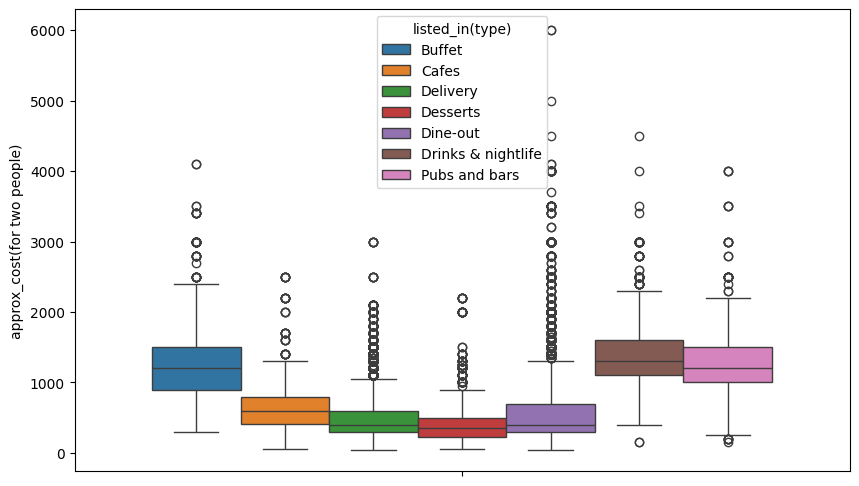

In [497]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data = df5, y='approx_cost(for two people)', hue='listed_in(type)')
plt.show()

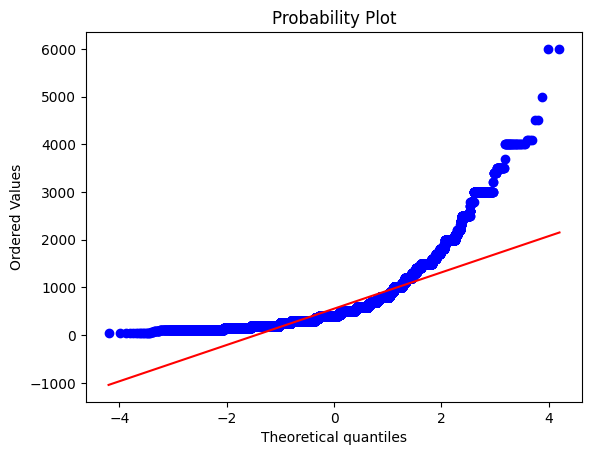

In [498]:
import scipy.stats as stats
stats.probplot(df5['approx_cost(for two people)'], dist="norm", plot=plt)
plt.show()

In [499]:
df_listed_in = pd.DataFrame(df5.groupby('listed_in(type)')['approx_cost(for two people)'].mean())
df_listed_in

approx_cost(for two people)
listed_in(type)                                
Buffet                              1299.430524
Cafes                                625.290360
Delivery                             464.122354
Desserts                             392.323963
Dine-out                             590.888476
Drinks & nightlife                  1436.103542
Pubs and bars                       1316.068867

In [500]:
df_listed_in.sort_values(by='approx_cost(for two people)')

approx_cost(for two people)
listed_in(type)                                
Desserts                             392.323963
Delivery                             464.122354
Dine-out                             590.888476
Cafes                                625.290360
Buffet                              1299.430524
Pubs and bars                       1316.068867
Drinks & nightlife                  1436.103542

- **Lest perform statistical test to find that the approx_cost changes based on list_in catagory**
- **For that we need to use ANOVA, Since we are comparing between Catagorical variable and numberical variable.**

In [501]:
import scipy.stats as stast
import statsmodels

In [502]:
stat, p = stats.shapiro(df5["approx_cost(for two people)"])
print(f'Shapiro-Wilk Test: Statistics={stat}, p={p}') 

Shapiro-Wilk Test: Statistics=0.7560791354606391, p=1.4049959150370192e-121


C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51696.
  res = hypotest_fun_out(*samples, **kwds)


- **P-value is < 0.05**
- **Failes in Normaity test**

**Lets drop the "listed_in(type)" because the "approx_cost(for two people)" is not varying that much based on "listed_in(type)".**

In [625]:
df6 = df5.drop(['listed_in(type)'], axis=1)

In [504]:
df6.head()

rate  votes  approx_cost(for two people)  location_encoded  \
0   4.1    775                        800.0              55.0   
1   4.1    787                        800.0              55.0   
2   3.8    918                        800.0              55.0   
3   3.7     88                        300.0              55.0   
4   3.8    166                        600.0              38.0   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1             

## Relationship between votes and approx_cost(for two people)

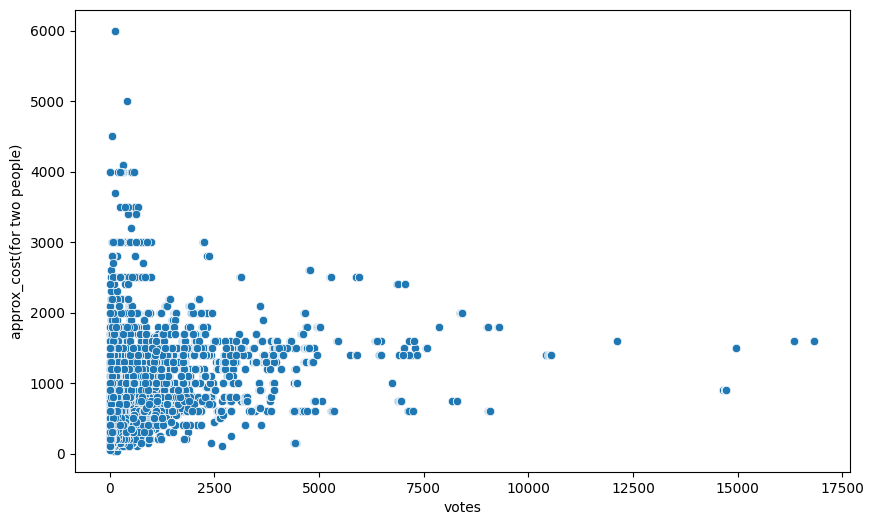

In [505]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(df6, x='votes', y='approx_cost(for two people)')
plt.show()

In [506]:
corr, p_value = stats.pearsonr(df6['votes'], df6['approx_cost(for two people)'])
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

Pearson Correlation: 0.3809610133611131, P-value: 0.0


From the plot we can see that, restorets with 0 votes have hugh approx_cost(for two people), based on this we can say the may be the restorent which are new has high approx_cost(for two people).

So according to our problem statement, adding this feature may misslead the model, so we should drop this feature.

## Relationship between rate and approx_cost(for two people)

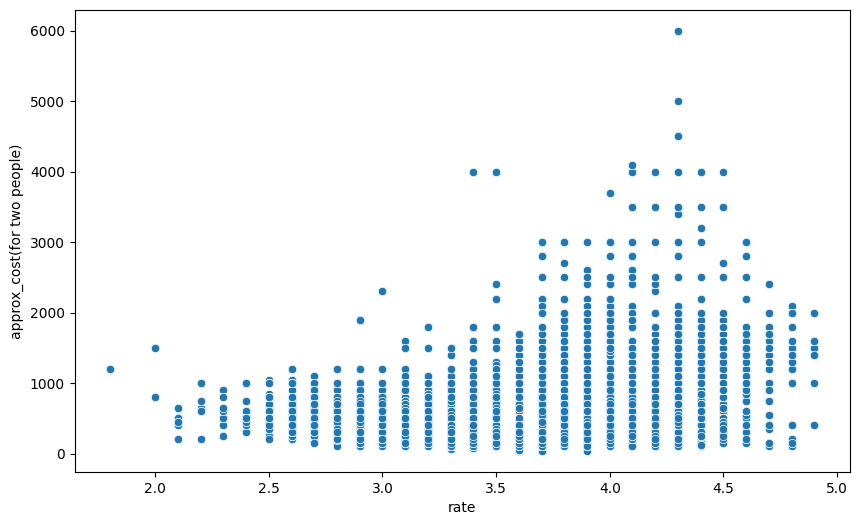

In [507]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(df6, x='rate', y='approx_cost(for two people)')
plt.show()

In [509]:
df6['rate'].isna().sum()

10031

In [512]:
df6.head()

rate  votes  approx_cost(for two people)  location_encoded  \
0   4.1    775                        800.0              55.0   
1   4.1    787                        800.0              55.0   
2   3.8    918                        800.0              55.0   
3   3.7     88                        300.0              55.0   
4   3.8    166                        600.0              38.0   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1             

**Null value imputation for rate column using regression imputer**

In [626]:
from sklearn.impute import KNNImputer

In [627]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [629]:
df6['rate'] = imputer.fit_transform(df6[['rate']])

<Axes: xlabel='rate', ylabel='Count'>

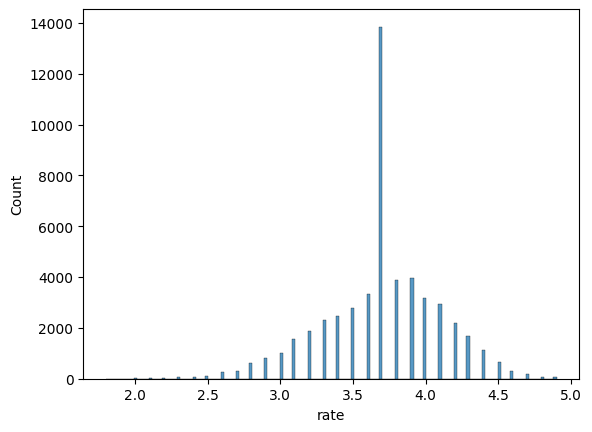

In [630]:
sns.histplot(df6['rate'])

In [631]:
corr, p_value = stats.pearsonr(df6['rate'], df6['approx_cost(for two people)'])
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

Pearson Correlation: 0.364721187054251, P-value: 0.0


According to rate feature, as the rating increases the approx_cost also increases, and if the restorent could maintian the raing between 4 to 5 they can make more amount per 2 customer.

In [528]:
df7 = df6.drop('votes', axis=1)

In [529]:
df7.head()

rate  approx_cost(for two people)  location_encoded  \
0   4.1                        800.0              55.0   
1   4.1                        800.0              55.0   
2   3.8                        800.0              55.0   
3   3.7                        300.0              55.0   
4   3.8                        600.0              38.0   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1                1             0                     0  

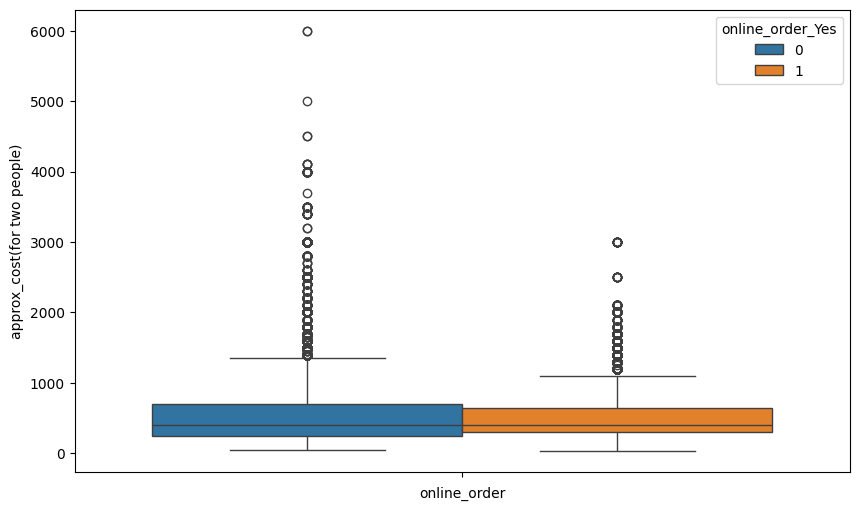

In [530]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(df7, y='approx_cost(for two people)', hue='online_order_Yes')
plt.xlabel("online_order")
plt.show()

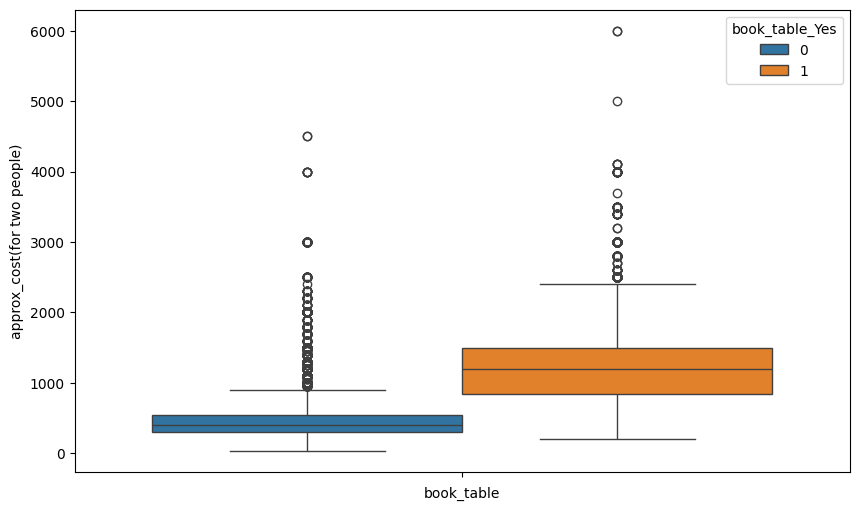

In [535]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(df7, y='approx_cost(for two people)', hue='book_table_Yes')
plt.xlabel('book_table')
plt.show()

**we can drop online order feature, Since there is no significant difference between classes.**

In [536]:
df8 = df7.drop('online_order_Yes', axis=1)

In [537]:
df8.head()

rate  approx_cost(for two people)  location_encoded  \
0   4.1                        800.0              55.0   
1   4.1                        800.0              55.0   
2   3.8                        800.0              55.0   
3   3.7                        300.0              55.0   
4   3.8                        600.0              38.0   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1                1             0                     0  

In [538]:
from sklearn.experimental import enable_iterative_imputer


In [539]:
df8.isna().sum()

rate                           0
approx_cost(for two people)    0
location_encoded               0
casual dining rest_type        0
cafe rest_type                 0
quick bites rest_type          0
delivery rest_type             0
mess rest_type                 0
dessert parlor rest_type       0
bakery rest_type               0
pub rest_type                  0
takeaway rest_type             0
fine dining rest_type          0
beverage shop rest_type        0
sweet shop rest_type           0
bar rest_type                  0
confectionery rest_type        0
kiosk rest_type                0
food truck rest_type           0
microbrewery rest_type         0
lounge rest_type               0
food court rest_type           0
general rest_type              0
dhaba rest_type                0
club rest_type                 0
bhojanalya rest_type           0
pop up rest_type               0
irani cafee rest_type          0
meat shop rest_type            0
North Indian cuisine           0
Chinese cu

In [540]:
df8['North Indian cuisine'].value_counts()

North Indian cuisine
0    30611
1    21085
Name: count, dtype: int64

## Model Building

In [541]:
x = df8.drop('approx_cost(for two people)', axis=1)
y = df8['approx_cost(for two people)']

In [542]:
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split

In [543]:
xc = add_constant(x)

In [544]:
xtrain, xtest, ytrain, ytest = train_test_split(xc, y, test_size=0.3, random_state=10)

## 1. OLS Model

In [545]:
model_ols = OLS(ytrain, xtrain).fit()

In [546]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.765
Model:                                     OLS   Adj. R-squared:                  0.764
Method:                          Least Squares   F-statistic:                     867.4
Date:                         Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                                 14:10:46   Log-Likelihood:            -2.4529e+05
No. Observations:                        36187   AIC:                         4.909e+05
Df Residuals:                            36051   BIC:                         4.920e+05
Df Model:                                  135                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      185.3454     13.290     13.946      0.000     159.296     211.395
rate                        55.7994      3.415     16.339      0.000      49.106      62.493
location_encoded             1.6993      0.058     29.132      0.000       1.585       1.814
casual dining rest_type    165.7646      5.501     30.136      0.000     154.983     176.546
cafe rest_type             -24.8907     16.399     -1.518      0.129     -57.033       7.251
quick bites rest_type     -137.7910      5.289    -26.053      0.000    -148.157    -127.425
delivery rest_type         -51.2278      7.061     -7.255      0.000     -65.067     -37.389
mess rest_type            -193.9726     16.272    -11.921      0.000    -225.866    -162.079
dessert parlor rest_type   -82.8178      7.406    -11.183      0.000     -97.334     -68.302
bakery rest_type           -54.5811     10.725     -5.089      0.000     -75.603     -33.559
pub rest_type              325.4040      9.985     32.590      0.000     305.833     344.975
takeaway rest_type         -38.0825      7.258     -5.247      0.000     -52.308     -23.857
fine dining rest_type     1796.2124     14.383    124.884      0.000    1768.021    1824.404
beverage shop rest_type   -118.5182      8.590    -13.797      0.000    -135.355    -101.681
sweet shop rest_type      -103.1991     17.974     -5.742      0.000    -138.428     -67.970
bar rest_type              369.7226      6.590     56.107      0.000     356.807     382.638
confectionery rest_type    -20.0762     40.833     -0.492      0.623    -100.110      59.957
kiosk rest_type           -194.1275     19.808     -9.801      0.000    -232.951    -155.304
food truck rest_type      -177.5754     28.253     -6.285      0.000    -232.952    -122.199
microbrewery rest_type     429.9283     14.451     29.750      0.000     401.603     458.254
lounge rest_type           817.0842     12.180     67.083      0.000     793.211     840.958
food court rest_type       -18.1661     10.379     -1.750      0.080     -38.509       2.176
general rest_type          -39.5661     18.680     -2.118      0.034     -76.180      -2.952
dhaba rest_type           -126.1737     40.744     -3.097      0.002    -206.032     -46.315
club rest_type            1337.4549     41.746     32.038      0.000    1255.632    1419.278
bhojanalya rest_type       -82.9790    123.142     -0.674      0.500    -324.341     158.383
pop up rest_type           -12.2854    150.797     -0.081      0.935    -307.853     283.282
irani cafee rest_type      541.7121     86.167      6.287      0.000     372.822     710.603
meat shop rest_type        -17.2166    106.530     -0.162      0.872    -226.018     191.585
North In

In [547]:
model_ols.params

const                        185.345357
rate                          55.799377
location_encoded               1.699305
casual dining rest_type      165.764582
cafe rest_type               -24.890747
quick bites rest_type       -137.791004
delivery rest_type           -51.227793
mess rest_type              -193.972602
dessert parlor rest_type     -82.817812
bakery rest_type             -54.581111
pub rest_type                325.403968
takeaway rest_type           -38.082514
fine dining rest_type       1796.212396
beverage shop rest_type     -118.518165
sweet shop rest_type        -103.199141
bar rest_type                369.722551
confectionery rest_type      -20.076241
kiosk rest_type             -194.127508
food truck rest_type        -177.575402
microbrewery rest_type       429.928305
lounge rest_type             817.084185
food court rest_type         -18.166074
general rest_type            -39.566135
dhaba rest_type             -126.173668
club rest_type              1337.454910


In [548]:
p_values = model_ols.pvalues
high_pvalue_features = p_values[p_values > 0.05].index

In [549]:
high_pvalue_features

Index(['cafe rest_type', 'confectionery rest_type', 'food court rest_type',
       'bhojanalya rest_type', 'pop up rest_type', 'meat shop rest_type',
       'Chinese cuisine', 'Pizza cuisine', 'Bakery cuisine', 'Biryani cuisine',
       'Goan cuisine', 'Beverages cuisine', 'Mangalorean cuisine',
       'Andhra cuisine', 'Bengali cuisine', 'Vietnamese cuisine',
       'Not Specified cuisine', 'Kebab cuisine', 'Maharashtrian cuisine',
       'Bohri cuisine', 'Rajasthani cuisine', 'Turkish cuisine',
       'Roast Chicken cuisine', 'Gujarati cuisine', 'Konkan cuisine',
       'Lebanese cuisine', 'Australian cuisine', 'Steak cuisine',
       'Spanish cuisine', 'Nepalese cuisine', 'Malaysian cuisine',
       'Kashmiri cuisine', 'Coffee cuisine', 'Charcoal Chicken cuisine',
       'Singaporean cuisine', 'Belgian cuisine', 'Indonesian cuisine',
       'Russian cuisine', 'British cuisine', 'Afghani cuisine',
       'Indian cuisine', 'Bubble Tea cuisine', 'Afghan cuisine',
       'Greek cuisine'

In [550]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data["Feature"] = x.columns
vif_data

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF                   Feature
0    27.484525                      rate
1     9.032593          location_encoded
2     5.792943   casual dining rest_type
3    19.594166            cafe rest_type
4     7.856814     quick bites rest_type
5     3.303312        delivery rest_type
6     1.118272            mess rest_type
7     2.750266  dessert parlor rest_type
8     3.592040          bakery rest_type
9     1.451538             pub rest_type
10    1.760558        takeaway rest_type
11    1.292377     fine dining rest_type
12    1.658708   beverage shop rest_type
13    3.819463      sweet shop rest_type
14    1.607288             bar rest_type
15    1.029440   confectionery rest_type
16    1.101213           kiosk rest_type
17    1.049898      food truck rest_type
18    1.227724    microbrewery rest_type
19    1.279387          lounge rest_type
20    1.198157      food court rest_type
21    1.082761         general rest_type
22    1.046142           dhaba rest_type
23    1.040210            club rest_type
24    1.001285      bhojanalya rest_type
25    1.001431          pop up rest_type
26    2.104515     irani cafee rest_type
27         inf       meat shop rest_type
28    2.714532      North Indian cuisine
29    2.059455           Chinese cuisine
30   18.635496              Cafe cuisine
31    1.467668      South Indian cuisine
32    1.239293             Pizza cuisine
33    1.405958           Italian cuisine
34    3.642465            Bakery cuisine
35    1.422460           Biryani cuisine
36    1.302473       Street Food cuisine
37    1.283597            Burger cuisine
38    1.458149         Fast Food cuisine
39    1.590313         Ice Cream cuisine
40    1.167650      Healthy Food cuisine
41    1.311059             Asian cuisine
42    2.173721          Desserts cuisine
43    1.094698              Goan cuisine
44    1.621323       Continental cuisine
45    1.320411           Seafood cuisine
46    1.551343         Beverages cuisine
47    3.946471            Mithai cuisine
48    1.098838          Sandwich cuisine
49    1.215239       Mangalorean cuisine
50    1.121741             Rolls cuisine
51    1.166347            Andhra cuisine
52    1.380324              Thai cuisine
53    1.243862             Salad cuisine
54    1.127617           Bengali cuisine
55    1.112673           Arabian cuisine
56    1.156020               BBQ cuisine
57    1.390056        Vietnamese cuisine
58    1.164983            Juices cuisine
59    1.113086           Mexican cuisine
60    1.396113           Tibetan cuisine
61    1.089998               Tea cuisine
62    1.397364             Momos cuisine
63    1.124349           Mughlai cuisine
64    1.004257     Not Specified cuisine
65    1.027829        Hyderabadi cuisine
66    1.463154       Finger Food cuisine
67    1.123860             Kebab cuisine
68    1.241053          American cuisine
69    1.130957            Kerala cuisine
70    1.089186             Oriya cuisine
71    1.033304     Maharashtrian cuisine
72    1.000921             Bohri cuisine
73    1.112020           African cuisine
74    1.080541        Rajasthani cuisine
75    1.055850           Turkish cuisine
76    1.000709             Tamil cuisine
77    1.022782     Roast Chicken cuisine
78    1.073243          Gujarati cuisine
79    1.005980    South American cuisine
80    1.160665            Konkan cuisine
81    1.008741       Drinks Only cuisine
82    1.062882            Awadhi cuisine
83    1.247648          European cuisine
84    1.130004          Lebanese cuisine
85    1.312673          Japanese cuisine
86    1.084607     Modern Indian cuisine
87    1.080520            Bihari cuisine
88    1.003498        Australian cuisine
89    1.244518     Mediterranean cuisine
90    1.052220         Chettinad cuisine
91    1.215985             Steak cuisine
92    1.095024           Spanish cuisine
93    1.206058        Portuguese cuisine
94    2.125236             Parsi cuisine
95    1.250924          Nepalese cuisine
96    1.327112           Burmese c

In [551]:
vif_data.sort_values(by='VIF', ascending=False)

VIF                   Feature
127        inf         Raw Meats cuisine
135        inf             Vegan cuisine
134        inf            Jewish cuisine
27         inf       meat shop rest_type
0    27.484525                      rate
3    19.594166            cafe rest_type
30   18.635496              Cafe cuisine
1     9.032593          location_encoded
4     7.856814     quick bites rest_type
2     5.792943   casual dining rest_type
47    3.946471            Mithai cuisine
13    3.819463      sweet shop rest_type
34    3.642465            Bakery cuisine
8     3.592040          bakery rest_type
5     3.303312        delivery rest_type
7     2.750266  dessert parlor rest_type
28    2.714532      North Indian cuisine
42    2.173721          Desserts cuisine
94    2.125236             Parsi cuisine
26    2.104515     irani cafee rest_type
29    2.059455           Chinese cuisine
136   2.032912            book_table_Yes
100   1.947196         Malaysian cuisine
10    1.760558        takeaway rest_type
12    1.658708   beverage shop rest_type
44    1.621323       Continental cuisine
14    1.607288             bar rest_type
39    1.590313         Ice Cream cuisine
108   1.580768       Singaporean cuisine
46    1.551343         Beverages cuisine
99    1.528560            Korean cuisine
31    1.467668      South Indian cuisine
66    1.463154       Finger Food cuisine
38    1.458149         Fast Food cuisine
9     1.451538             pub rest_type
35    1.422460           Biryani cuisine
33    1.405958           Italian cuisine
62    1.397364             Momos cuisine
60    1.396113           Tibetan cuisine
57    1.390056        Vietnamese cuisine
52    1.380324              Thai cuisine
112   1.351778        Indonesian cuisine
133   1.330793        Sri Lankan cuisine
96    1.327112           Burmese cuisine
45    1.320411           Seafood cuisine
85    1.312673          Japanese cuisine
41    1.311059             Asian cuisine
36    1.302473       Street Food cuisine
11    1.292377     fine dining rest_type
37    1.283597            Burger cuisine
19    1.279387          lounge rest_type
95    1.250924          Nepalese cuisine
83    1.247648          European cuisine
89    1.244518     Mediterranean cuisine
53    1.243862             Salad cuisine
68    1.241053          American cuisine
32    1.239293             Pizza cuisine
18    1.227724    microbrewery rest_type
91    1.215985             Steak cuisine
49    1.215239       Mangalorean cuisine
93    1.206058        Portuguese cuisine
20    1.198157      food court rest_type
40    1.167650      Healthy Food cuisine
51    1.166347            Andhra cuisine
58    1.164983            Juices cuisine
80    1.160665            Konkan cuisine
109   1.160469    Middle Eastern cuisine
56    1.156020               BBQ cuisine
118   1.144278             Wraps cuisine
69    1.130957            Kerala cuisine
84    1.130004          Lebanese cuisine
103   1.128575            French cuisine
54    1.127617           Bengali cuisine
63    1.124349           Mughlai cuisine
67    1.123860             Kebab cuisine
50    1.121741             Rolls cuisine
6     1.118272            mess rest_type
59    1.113086           Mexican cuisine
55    1.112673           Arabian cuisine
73    1.112020           African cuisine
16    1.101213           kiosk rest_type
48    1.098838          Sandwich cuisine
92    1.095024           Spanish cuisine
43    1.094698              Goan cuisine
123   1.091526             Greek cuisine
61    1.089998               Tea cuisine
70    1.089186             Oriya cuisine
101   1.086297             Sushi cuisine
110   1.085086              Naga cuisine
86    1.084607     Modern Indian cuisine
21    1.082761         general rest_type
74    1.080541        Rajasthani cuisine
87    1.080520            Bihari cuisine
78    1.073243          Gujarati cuisine
97    1.071688     North Eastern cuisine
119   1.070683           Tex-Mex cuisine
105   1.064624            Coffee c

**OLS_model2**

In [552]:
x_new = x.drop(high_pvalue_features, axis=1)

In [553]:
xc_new = add_constant(x_new)

In [554]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xc_new, y, test_size=0.3, random_state=10)

In [555]:
model_ols1 = OLS(ytrain1, xtrain1).fit()

In [556]:
model_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.764
Model:                                     OLS   Adj. R-squared:                  0.764
Method:                          Least Squares   F-statistic:                     1393.
Date:                         Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                                 14:19:55   Log-Likelihood:            -2.4532e+05
No. Observations:                        36187   AIC:                         4.908e+05
Df Residuals:                            36102   BIC:                         4.915e+05
Df Model:                                   84                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      181.9585     12.819     14.194      0.000     156.833     207.084
rate                        55.3606      3.371     16.422      0.000      48.753      61.968
location_encoded             1.6827      0.058     28.970      0.000       1.569       1.797
casual dining rest_type    170.0802      4.979     34.161      0.000     160.322     179.839
quick bites rest_type     -133.1977      4.729    -28.166      0.000    -142.467    -123.929
delivery rest_type         -48.4853      6.620     -7.324      0.000     -61.461     -35.510
mess rest_type            -189.6898     15.979    -11.871      0.000    -221.009    -158.371
dessert parlor rest_type   -79.6851      7.128    -11.179      0.000     -93.656     -65.714
bakery rest_type           -64.2468      6.765     -9.496      0.000     -77.507     -50.986
pub rest_type              328.7837      9.856     33.360      0.000     309.466     348.101
takeaway rest_type         -36.2725      7.210     -5.031      0.000     -50.404     -22.141
fine dining rest_type     1801.0384     14.136    127.406      0.000    1773.331    1828.746
beverage shop rest_type   -119.6161      7.801    -15.334      0.000    -134.905    -104.327
sweet shop rest_type       -99.5070     17.876     -5.567      0.000    -134.544     -64.470
bar rest_type              371.5503      6.470     57.425      0.000     358.869     384.232
kiosk rest_type           -193.4261     19.420     -9.960      0.000    -231.490    -155.362
food truck rest_type      -174.2012     28.127     -6.193      0.000    -229.332    -119.071
microbrewery rest_type     430.9477     14.358     30.015      0.000     402.806     459.089
lounge rest_type           820.1544     11.938     68.700      0.000     796.755     843.554
general rest_type          -36.6139     18.494     -1.980      0.048     -72.862      -0.366
dhaba rest_type           -123.9783     40.624     -3.052      0.002    -203.602     -44.354
club rest_type            1337.4643     41.544     32.194      0.000    1256.036    1418.893
irani cafee rest_type      532.7172     85.959      6.197      0.000     364.236     701.199
North Indian cuisine        28.6594      2.706     10.593      0.000      23.356      33.962
Cafe cuisine                42.3596      5.315      7.969      0.000      31.941      52.778
South Indian cuisine       -46.9711      3.275    -14.341      0.000     -53.391     -40.551
Italian cuisine             42.1523      5.022      8.393      0.000      32.309      51.996
Street Food cuisine        -69.9239      5.683    -12.304      0.000     -81.062     -58.785
Burger cuisine              18.8294      6.315      2.982      0.003       6.452      31.207
Fast Foo

In [557]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif_data["Feature"] = x_new.columns
vif_data.sort_values(by='VIF', ascending=False)

VIF                   Feature
0   23.668047                      rate
1    8.950193          location_encoded
3    6.438792     quick bites rest_type
2    4.802741   casual dining rest_type
35   3.931302            Mithai cuisine
12   3.789145      sweet shop rest_type
4    2.947612        delivery rest_type
6    2.574380  dessert parlor rest_type
22   2.303067      North Indian cuisine
23   2.268517              Cafe cuisine
65   2.107136             Parsi cuisine
21   2.093807     irani cafee rest_type
32   2.073247          Desserts cuisine
83   1.959367            book_table_Yes
9    1.738981        takeaway rest_type
33   1.578108       Continental cuisine
29   1.574890         Ice Cream cuisine
13   1.552479             bar rest_type
49   1.441429       Finger Food cuisine
24   1.427612      South Indian cuisine
8    1.411200             pub rest_type
28   1.408696         Fast Food cuisine
11   1.377605   beverage shop rest_type
7    1.364649          bakery rest_type
46   1.342860             Momos cuisine
25   1.326079           Italian cuisine
59   1.285565          Japanese cuisine
26   1.279540       Street Food cuisine
10   1.252517     fine dining rest_type
31   1.249388             Asian cuisine
69   1.247926            Korean cuisine
38   1.245453              Thai cuisine
17   1.235200          lounge rest_type
58   1.228589          European cuisine
39   1.225882             Salad cuisine
44   1.221026           Tibetan cuisine
27   1.220900            Burger cuisine
16   1.211193    microbrewery rest_type
64   1.204914        Portuguese cuisine
62   1.180634     Mediterranean cuisine
50   1.162725          American cuisine
42   1.158652            Juices cuisine
30   1.155842      Healthy Food cuisine
34   1.145566           Seafood cuisine
78   1.136292             Wraps cuisine
41   1.133667               BBQ cuisine
51   1.119612            Kerala cuisine
53   1.111152           African cuisine
43   1.103268           Mexican cuisine
47   1.103135           Mughlai cuisine
37   1.099046             Rolls cuisine
74   1.098778    Middle Eastern cuisine
40   1.097679           Arabian cuisine
66   1.095212           Burmese cuisine
5    1.081661            mess rest_type
45   1.081275               Tea cuisine
60   1.080061     Modern Indian cuisine
61   1.076565            Bihari cuisine
36   1.071862          Sandwich cuisine
67   1.068764     North Eastern cuisine
70   1.068172             Sushi cuisine
75   1.067568              Naga cuisine
18   1.066634         general rest_type
79   1.064001           Tex-Mex cuisine
14   1.060769           kiosk rest_type
57   1.057168            Awadhi cuisine
82   1.057088             Grill cuisine
71   1.045978            French cuisine
15   1.042456      food truck rest_type
19   1.042066           dhaba rest_type
63   1.037945         Chettinad cuisine
81   1.037757         Cantonese cuisine
77   1.026455            German cuisine
20   1.026066            club rest_type
48   1.017080        Hyderabadi cuisine
73   1.016566          Bar Food cuisine
76   1.011576           Iranian cuisine
68   1.011427          Lucknowi cuisine
52   1.007250             Oriya cuisine
80   1.006444              Paan cuisine
55   1.005169    South American cuisine
56   1.004433       Drinks Only cuisine
72   1.003712          Assamese cuisine
54   1.000637             Tamil cuisine

So according to our VIF value we can see that rate as hight VIF value (> 10), So lets drop rate column and fit the model to reduce multicollinearity.

**OLS Model 3**

In [558]:
x_new2 = x_new.drop('rate', axis=1)

In [559]:
xc_new2 = add_constant(x_new2)

In [560]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xc_new2, y, test_size=0.3, random_state=10)

In [561]:
model_ols3 = OLS(ytrain2, xtrain2).fit()

In [562]:
model_ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.762
Model:                                     OLS   Adj. R-squared:                  0.762
Method:                          Least Squares   F-statistic:                     1396.
Date:                         Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                                 14:24:31   Log-Likelihood:            -2.4545e+05
No. Observations:                        36187   AIC:                         4.911e+05
Df Residuals:                            36103   BIC:                         4.918e+05
Df Model:                                   83                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      371.1821      5.638     65.832      0.000     360.131     382.233
location_encoded             1.7924      0.058     30.950      0.000       1.679       1.906
casual dining rest_type    175.5716      4.986     35.213      0.000     165.799     185.344
quick bites rest_type     -132.1495      4.746    -27.843      0.000    -141.452    -122.847
delivery rest_type         -47.0295      6.644     -7.078      0.000     -60.052     -34.007
mess rest_type            -184.3963     16.035    -11.500      0.000    -215.825    -152.967
dessert parlor rest_type   -71.0160      7.135     -9.953      0.000     -85.001     -57.031
bakery rest_type           -66.2366      6.789     -9.756      0.000     -79.544     -52.929
pub rest_type              337.7343      9.877     34.193      0.000     318.375     357.094
takeaway rest_type         -38.7763      7.235     -5.360      0.000     -52.957     -24.596
fine dining rest_type     1813.3524     14.169    127.983      0.000    1785.581    1841.124
beverage shop rest_type   -114.9068      7.824    -14.686      0.000    -130.243     -99.571
sweet shop rest_type       -97.6504     17.942     -5.443      0.000    -132.817     -62.484
bar rest_type              376.7393      6.486     58.081      0.000     364.026     389.453
kiosk rest_type           -192.9437     19.492     -9.898      0.000    -231.149    -154.738
food truck rest_type      -172.3123     28.232     -6.104      0.000    -227.647    -116.978
microbrewery rest_type     446.4853     14.380     31.050      0.000     418.301     474.670
lounge rest_type           823.5707     11.981     68.741      0.000     800.088     847.053
general rest_type          -50.5284     18.543     -2.725      0.006     -86.873     -14.184
dhaba rest_type           -128.6291     40.774     -3.155      0.002    -208.547     -48.711
club rest_type            1345.8331     41.696     32.278      0.000    1264.109    1427.558
irani cafee rest_type      553.4980     86.269      6.416      0.000     384.409     722.587
North Indian cuisine        25.1996      2.707      9.308      0.000      19.893      30.506
Cafe cuisine                52.1583      5.301      9.839      0.000      41.768      62.549
South Indian cuisine       -45.6028      3.286    -13.876      0.000     -52.044     -39.161
Italian cuisine             43.3336      5.040      8.597      0.000      33.454      53.213
Street Food cuisine        -66.1402      5.699    -11.605      0.000     -77.311     -54.969
Burger cuisine              24.8577      6.328      3.928      0.000      12.455      37.261
Fast Food cuisine           10.3787      3.387      3.065      0.002       3.741      17.017
Ice Crea

- Even after removing the rate column the VIF values is not reduced sigificantly.
- So we use the rate feature. for future process.

In [563]:
model_ols1.params

const                        181.958454
rate                          55.360648
location_encoded               1.682657
casual dining rest_type      170.080235
quick bites rest_type       -133.197687
delivery rest_type           -48.485261
mess rest_type              -189.689805
dessert parlor rest_type     -79.685081
bakery rest_type             -64.246753
pub rest_type                328.783653
takeaway rest_type           -36.272481
fine dining rest_type       1801.038366
beverage shop rest_type     -119.616100
sweet shop rest_type         -99.507013
bar rest_type                371.550334
kiosk rest_type             -193.426067
food truck rest_type        -174.201191
microbrewery rest_type       430.947674
lounge rest_type             820.154367
general rest_type            -36.613857
dhaba rest_type             -123.978256
club rest_type              1337.464331
irani cafee rest_type        532.717239
North Indian cuisine          28.659406
Cafe cuisine                  42.359606


## LinearRegression

In [564]:
from sklearn.linear_model import LinearRegression

In [565]:
xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(x_new, y, test_size=0.3, random_state=10)

In [566]:
lr1 = LinearRegression()

In [567]:
lr1.fit(xtrain_lr, ytrain_lr)

LinearRegression()

In [568]:
lr1.feature_names_in_

array(['rate', 'location_encoded', 'casual dining rest_type',
       'quick bites rest_type', 'delivery rest_type', 'mess rest_type',
       'dessert parlor rest_type', 'bakery rest_type', 'pub rest_type',
       'takeaway rest_type', 'fine dining rest_type',
       'beverage shop rest_type', 'sweet shop rest_type', 'bar rest_type',
       'kiosk rest_type', 'food truck rest_type',
       'microbrewery rest_type', 'lounge rest_type', 'general rest_type',
       'dhaba rest_type', 'club rest_type', 'irani cafee rest_type',
       'North Indian cuisine', 'Cafe cuisine', 'South Indian cuisine',
       'Italian cuisine', 'Street Food cuisine', 'Burger cuisine',
       'Fast Food cuisine', 'Ice Cream cuisine', 'Healthy Food cuisine',
       'Asian cuisine', 'Desserts cuisine', 'Continental cuisine',
       'Seafood cuisine', 'Mithai cuisine', 'Sandwich cuisine',
       'Rolls cuisine', 'Thai cuisine', 'Salad cuisine',
       'Arabian cuisine', 'BBQ cuisine', 'Juices cuisine',
       'Mexica

In [569]:
lr1.coef_

array([ 5.53606480e+01,  1.68265728e+00,  1.70080235e+02, -1.33197687e+02,
       -4.84852608e+01, -1.89689805e+02, -7.96850806e+01, -6.42467533e+01,
        3.28783653e+02, -3.62724808e+01,  1.80103837e+03, -1.19616100e+02,
       -9.95070131e+01,  3.71550334e+02, -1.93426067e+02, -1.74201191e+02,
        4.30947674e+02,  8.20154367e+02, -3.66138569e+01, -1.23978256e+02,
        1.33746433e+03,  5.32717239e+02,  2.86594057e+01,  4.23596065e+01,
       -4.69710675e+01,  4.21523288e+01, -6.99238776e+01,  1.88293585e+01,
        1.09327374e+01, -1.01428371e+02, -3.12665137e+01,  1.46392199e+01,
        9.29986318e+00,  5.60067696e+01,  2.85144617e+01, -3.27183926e+01,
       -3.97448399e+01, -3.87066569e+01,  1.09708388e+02,  1.37577574e+02,
        3.53729555e+01,  8.87912465e+01, -8.30237961e+01,  5.87353827e+01,
       -4.73647013e+01, -9.91164884e+01, -2.20884951e+01,  3.90205727e+01,
        4.14834037e+01,  1.28812761e+02,  2.20760220e+01,  2.97581718e+01,
       -5.84093163e+01,  

In [570]:
lr1.intercept_

181.9584540544647

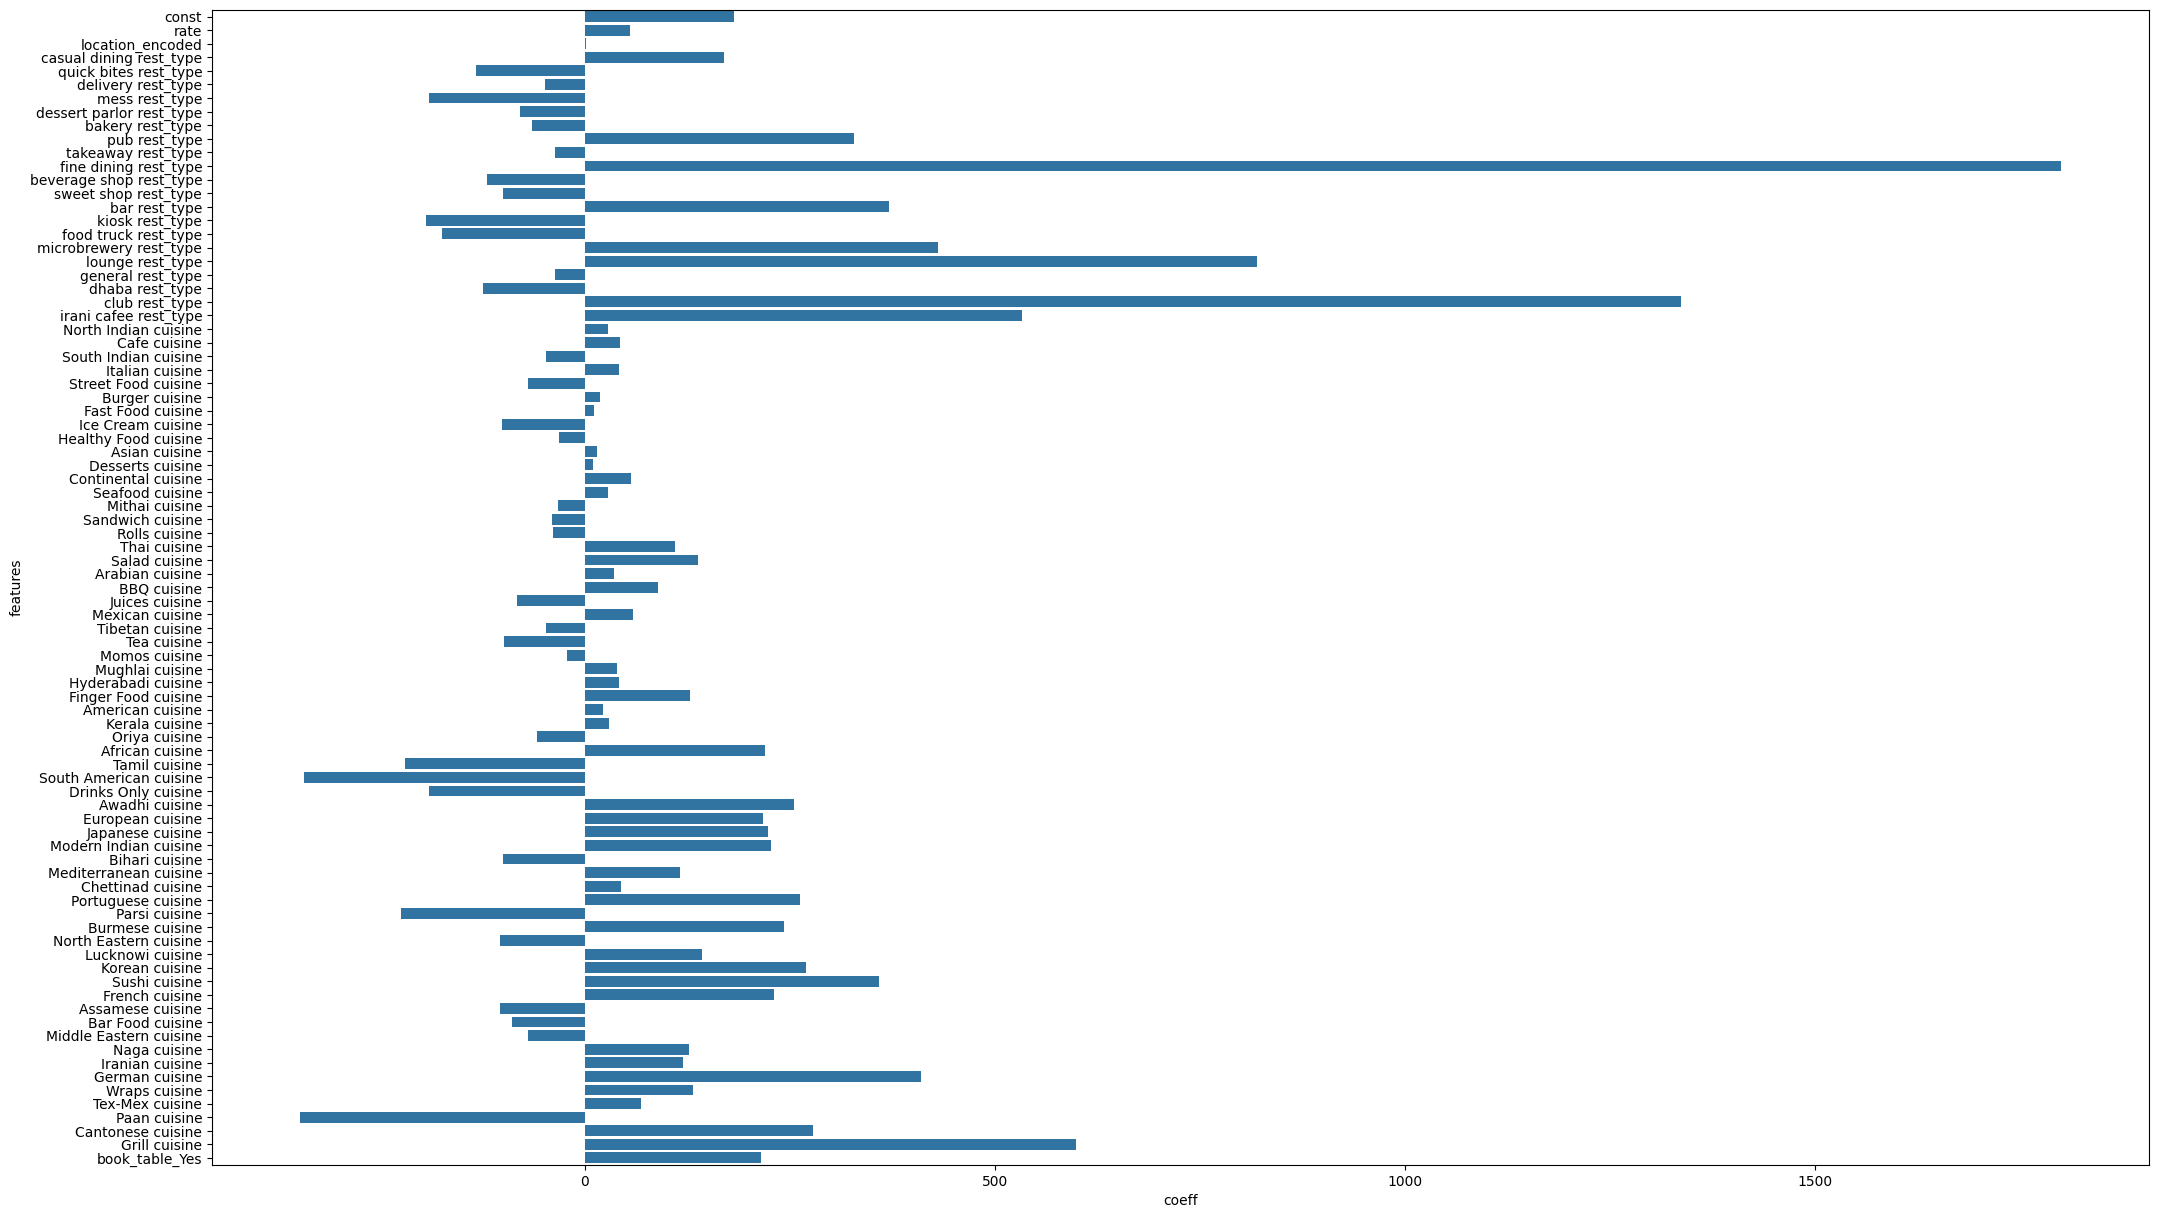

In [571]:
plt.figure(figsize=(25,15), dpi=100)
sns.barplot(x=model_ols1.params, y=model_ols1.params.index)
plt.xlabel('coeff')
plt.ylabel('features')
plt.show()

## Finding Important Features

In [572]:
from sklearn.linear_model import Lasso, Ridge

In [573]:
ls_model = Lasso()

In [574]:
ls_model.fit(xtrain_lr, ytrain_lr)

Lasso()

In [575]:
ls_model.coef_

array([ 6.86004123e+01,  1.95115857e+00,  1.92793792e+02, -1.13436061e+02,
       -3.06171949e+01, -0.00000000e+00, -5.63699791e+01, -1.97868928e+01,
        2.60396270e+02, -6.74431573e+00,  1.68818605e+03, -1.01413688e+02,
       -1.59043217e+01,  3.40514287e+02, -0.00000000e+00, -0.00000000e+00,
        3.30268451e+02,  7.38542696e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.71559296e+01,  3.27166005e+01,
       -4.41340381e+01,  3.05822869e+01, -7.22022152e+01,  7.84300870e+00,
       -0.00000000e+00, -7.83821418e+01, -0.00000000e+00,  1.93646023e+01,
       -5.62688206e+00,  7.36860367e+01,  0.00000000e+00, -3.43428163e+01,
       -0.00000000e+00, -2.60218340e+00,  7.35901637e+01,  8.84153199e+01,
        0.00000000e+00,  3.18664779e+01, -4.37311255e+01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.48066680e+00,
        0.00000000e+00,  1.18489415e+02,  9.35686655e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [576]:
ls_model.intercept_

104.94067353408252

In [577]:
lasso_coeff = pd.DataFrame({"feature_names" : ls_model.feature_names_in_, "feature_coff": ls_model.coef_}).sort_values(by='feature_coff', ascending=False)
lasso_coeff

feature_names  feature_coff
10     fine dining rest_type   1688.186051
17          lounge rest_type    738.542696
13             bar rest_type    340.514287
16    microbrewery rest_type    330.268451
83            book_table_Yes    265.817137
8              pub rest_type    260.396270
58          European cuisine    203.143473
2    casual dining rest_type    192.793792
59          Japanese cuisine    190.486593
49       Finger Food cuisine    118.489415
39             Salad cuisine     88.415320
33       Continental cuisine     73.686037
38              Thai cuisine     73.590164
0                       rate     68.600412
62     Mediterranean cuisine     45.558163
23              Cafe cuisine     32.716601
41               BBQ cuisine     31.866478
25           Italian cuisine     30.582287
22      North Indian cuisine     27.155930
31             Asian cuisine     19.364602
50          American cuisine      9.356867
27            Burger cuisine      7.843009
1           location_encoded      1.951159
47           Mughlai cuisine      1.480667
14           kiosk rest_type     -0.000000
65             Parsi cuisine     -0.000000
64        Portuguese cuisine      0.000000
63         Chettinad cuisine      0.000000
61            Bihari cuisine     -0.000000
67     North Eastern cuisine     -0.000000
60     Modern Indian cuisine      0.000000
57            Awadhi cuisine      0.000000
56       Drinks Only cuisine     -0.000000
55    South American cuisine     -0.000000
66           Burmese cuisine      0.000000
70             Sushi cuisine      0.000000
68          Lucknowi cuisine      0.000000
69            Korean cuisine      0.000000
53           African cuisine      0.000000
71            French cuisine      0.000000
72          Assamese cuisine     -0.000000
73          Bar Food cuisine     -0.000000
74    Middle Eastern cuisine      0.000000
75              Naga cuisine      0.000000
76           Iranian cuisine      0.000000
77            German cuisine      0.000000
78             Wraps cuisine      0.000000
79           Tex-Mex cuisine      0.000000
80              Paan cuisine     -0.000000
81         Cantonese cuisine      0.000000
82             Grill cuisine      0.000000
54             Tamil cuisine     -0.000000
5             mess rest_type     -0.000000
52             Oriya cuisine     -0.000000
40           Arabian cuisine      0.000000
28         Fast Food cuisine     -0.000000
19           dhaba rest_type     -0.000000
30      Healthy Food cuisine     -0.000000
34           Seafood cuisine      0.000000
51            Kerala cuisine      0.000000
36          Sandwich cuisine     -0.000000
21     irani cafee rest_type      0.000000
18         general rest_type     -0.000000
43           Mexican cuisine      0.000000
44           Tibetan cuisine     -0.000000
45               Tea cuisine     -0.000000
46             Momos cuisine     -0.000000
48        Hyderabadi cuisine      0.000000
15      food truck rest_type     -0.000000
20            club rest_type      0.000000
37             Rolls cuisine     -2.602183
32          Desserts cuisine     -5.626882
9         takeaway rest_type     -6.744316
12      sweet shop rest_type    -15.904322
7           bakery rest_type    -19.786893
4         delivery rest_type    -30.617195
35            Mithai cuisine    -34.342816
42            Juices cuisine    -43.731126
24      South Indian cuisine    -44.134038
6   dessert parlor rest_type    -56.369979
26       Street Food cuisine    -72.202215
29         Ice Cream cuisine    -78.382142
11   beverage shop rest_type   -101.413688
3      quick bites rest_type   -113.436061

## Features which will increase the cost per 2 customers

In [578]:
poss_coeff = lasso_coeff[lasso_coeff['feature_coff'] > 0]
poss_coeff

feature_names  feature_coff
10    fine dining rest_type   1688.186051
17         lounge rest_type    738.542696
13            bar rest_type    340.514287
16   microbrewery rest_type    330.268451
83           book_table_Yes    265.817137
8             pub rest_type    260.396270
58         European cuisine    203.143473
2   casual dining rest_type    192.793792
59         Japanese cuisine    190.486593
49      Finger Food cuisine    118.489415
39            Salad cuisine     88.415320
33      Continental cuisine     73.686037
38             Thai cuisine     73.590164
0                      rate     68.600412
62    Mediterranean cuisine     45.558163
23             Cafe cuisine     32.716601
41              BBQ cuisine     31.866478
25          Italian cuisine     30.582287
22     North Indian cuisine     27.155930
31            Asian cuisine     19.364602
50         American cuisine      9.356867
27           Burger cuisine      7.843009
1          location_encoded      1.951159
47          Mughlai cuisine      1.480667

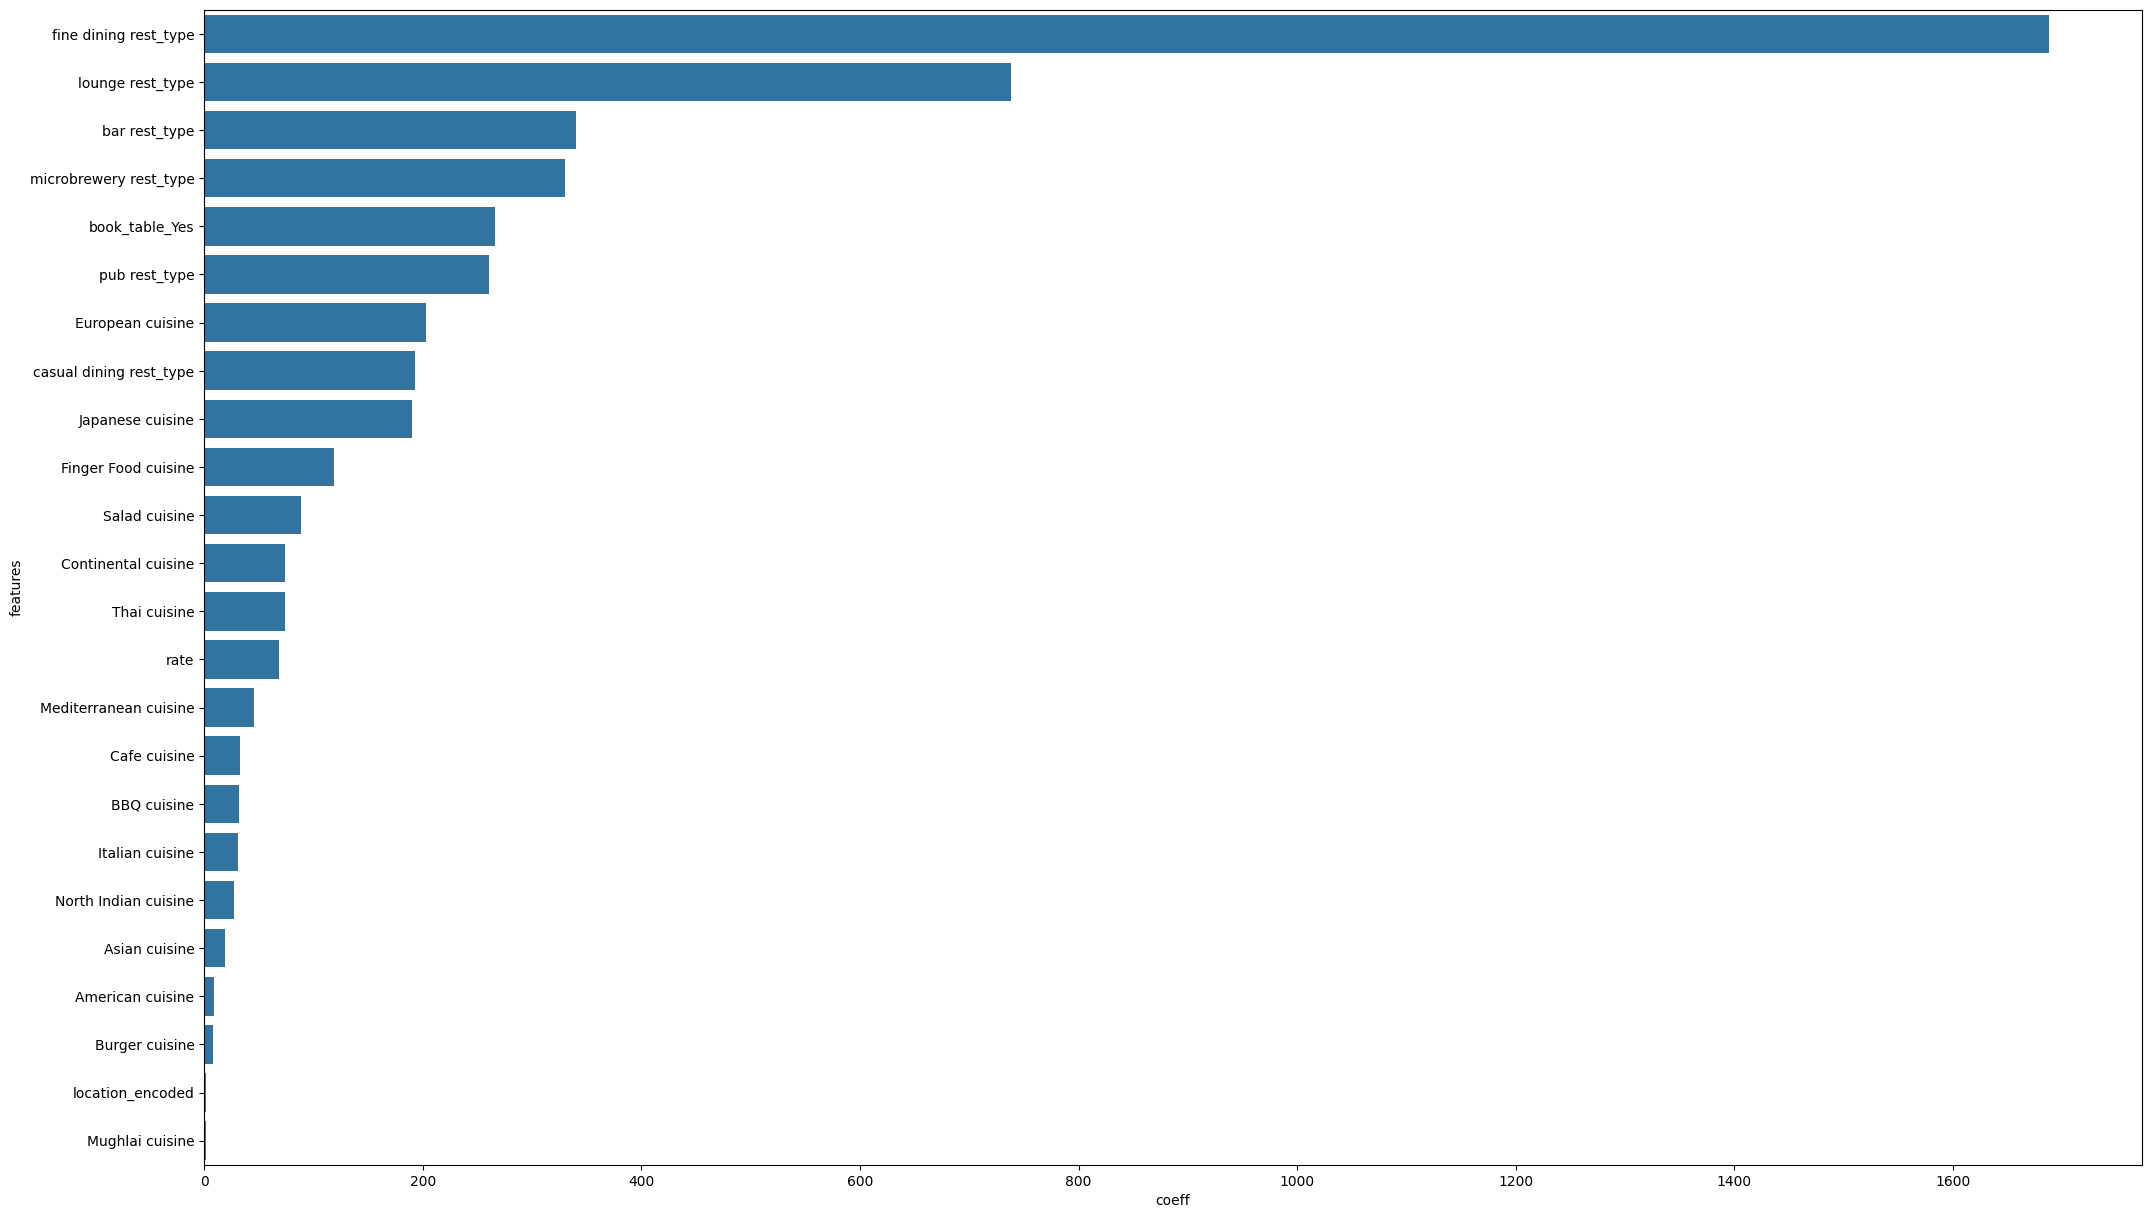

In [579]:
plt.figure(figsize=(25,15), dpi=100)
sns.barplot(x=poss_coeff.feature_coff, y=poss_coeff.feature_names)
plt.xlabel('coeff')
plt.ylabel('features')
plt.show()

## Features Which will decrease the Cost per 2 customers

In [580]:
neg_coeff = lasso_coeff[lasso_coeff['feature_coff'] < 0]
neg_coeff

feature_names  feature_coff
37             Rolls cuisine     -2.602183
32          Desserts cuisine     -5.626882
9         takeaway rest_type     -6.744316
12      sweet shop rest_type    -15.904322
7           bakery rest_type    -19.786893
4         delivery rest_type    -30.617195
35            Mithai cuisine    -34.342816
42            Juices cuisine    -43.731126
24      South Indian cuisine    -44.134038
6   dessert parlor rest_type    -56.369979
26       Street Food cuisine    -72.202215
29         Ice Cream cuisine    -78.382142
11   beverage shop rest_type   -101.413688
3      quick bites rest_type   -113.436061

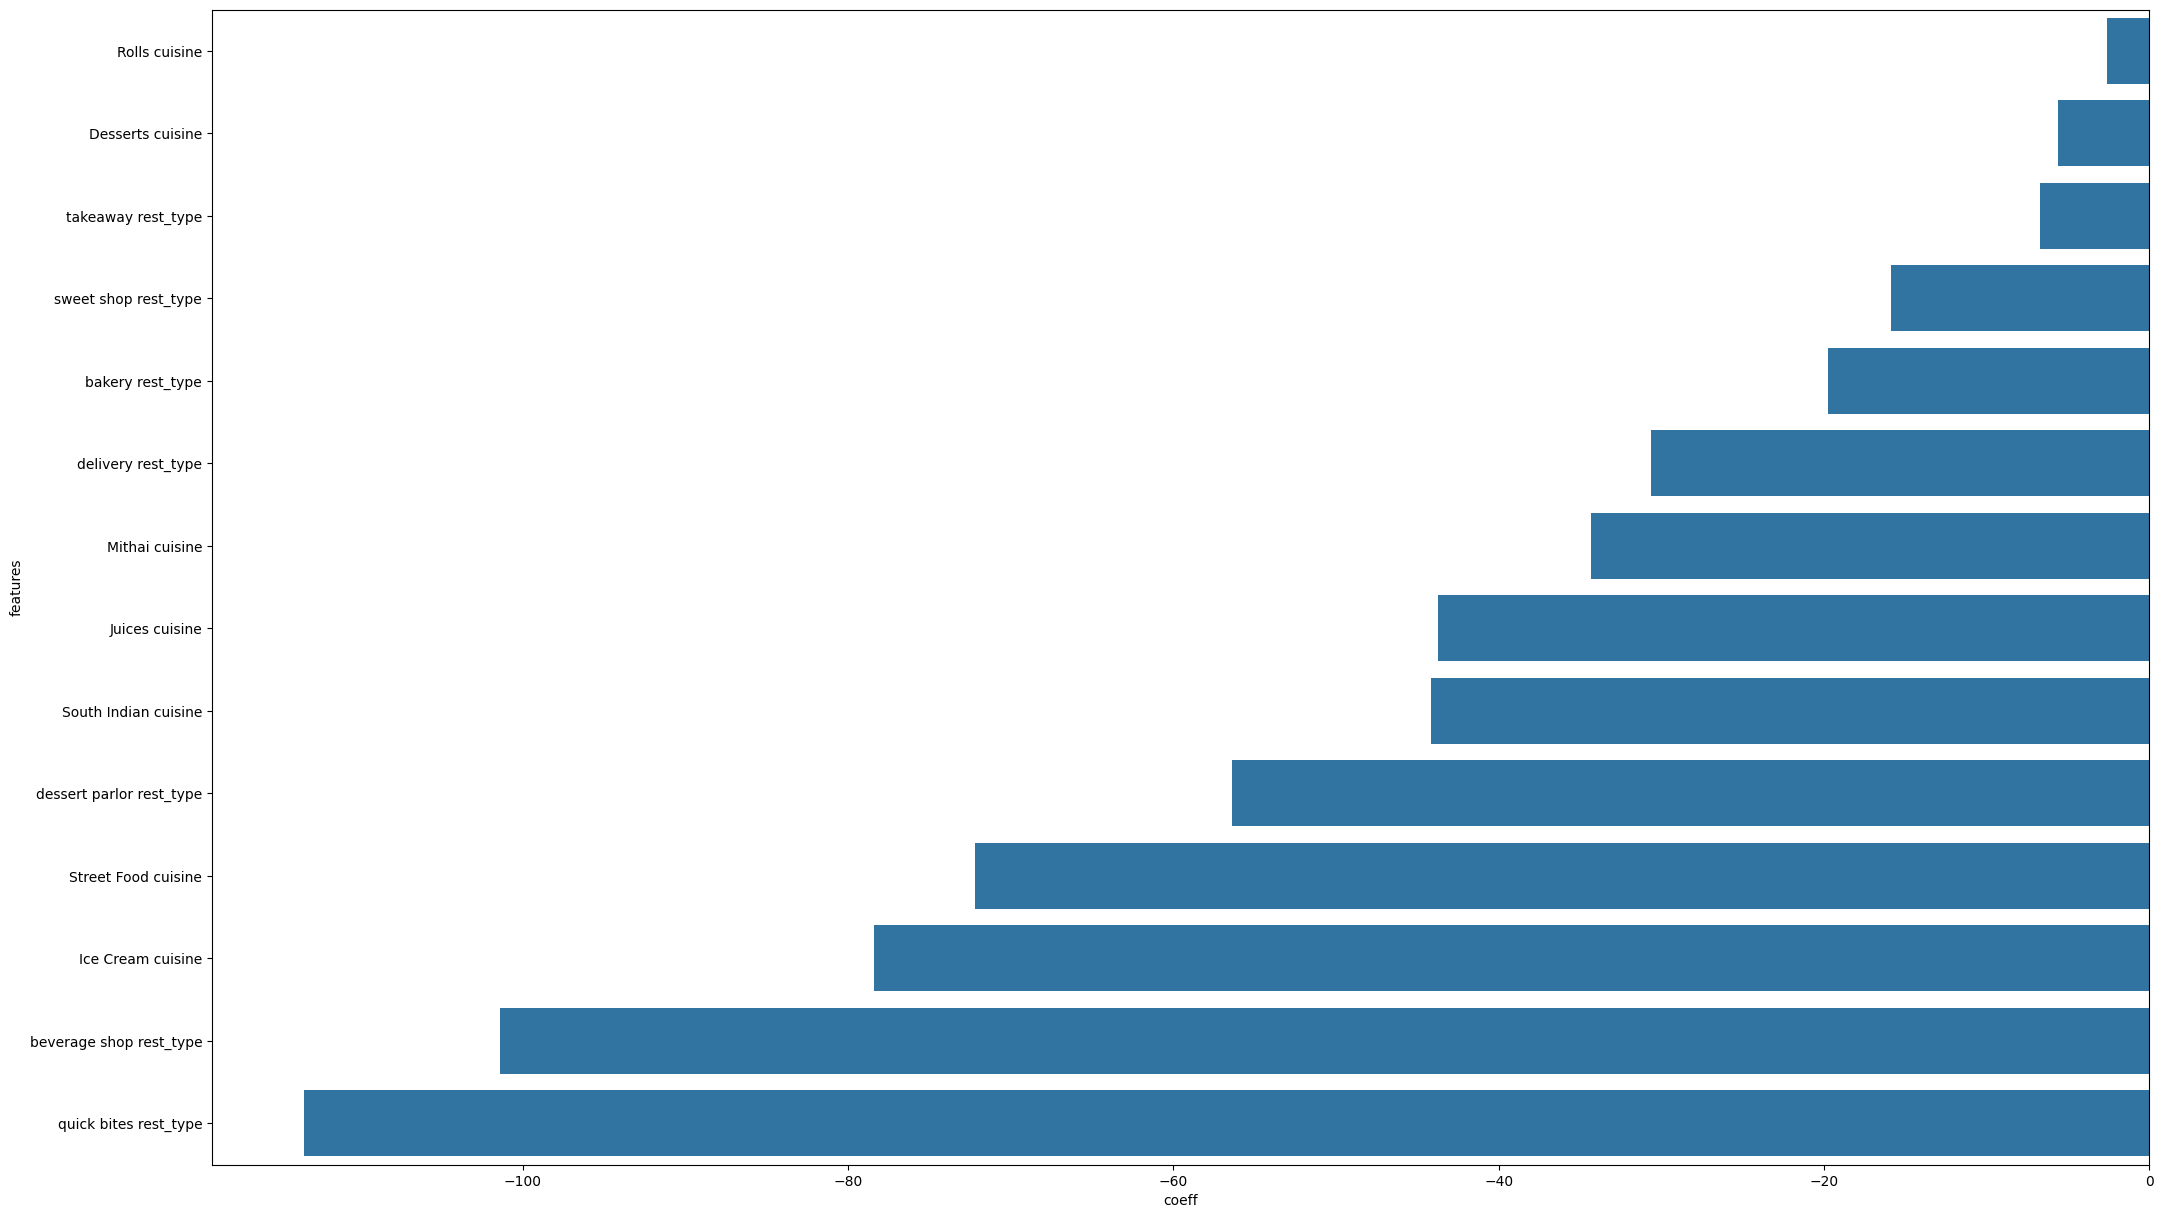

In [581]:
plt.figure(figsize=(25,15), dpi=100)
sns.barplot(x=neg_coeff.feature_coff, y=neg_coeff.feature_names)
plt.xlabel('coeff')
plt.ylabel('features')
plt.show()

## Features which will not affect the cost per 2 customers (less impotant features)

In [582]:
lasso_coeff[abs(lasso_coeff['feature_coff']) == 0]

feature_names  feature_coff
14         kiosk rest_type          -0.0
65           Parsi cuisine          -0.0
64      Portuguese cuisine           0.0
63       Chettinad cuisine           0.0
61          Bihari cuisine          -0.0
67   North Eastern cuisine          -0.0
60   Modern Indian cuisine           0.0
57          Awadhi cuisine           0.0
56     Drinks Only cuisine          -0.0
55  South American cuisine          -0.0
66         Burmese cuisine           0.0
70           Sushi cuisine           0.0
68        Lucknowi cuisine           0.0
69          Korean cuisine           0.0
53         African cuisine           0.0
71          French cuisine           0.0
72        Assamese cuisine          -0.0
73        Bar Food cuisine          -0.0
74  Middle Eastern cuisine           0.0
75            Naga cuisine           0.0
76         Iranian cuisine           0.0
77          German cuisine           0.0
78           Wraps cuisine           0.0
79         Tex-Mex cuisine           0.0
80            Paan cuisine          -0.0
81       Cantonese cuisine           0.0
82           Grill cuisine           0.0
54           Tamil cuisine          -0.0
5           mess rest_type          -0.0
52           Oriya cuisine          -0.0
40         Arabian cuisine           0.0
28       Fast Food cuisine          -0.0
19         dhaba rest_type          -0.0
30    Healthy Food cuisine          -0.0
34         Seafood cuisine           0.0
51          Kerala cuisine           0.0
36        Sandwich cuisine          -0.0
21   irani cafee rest_type           0.0
18       general rest_type          -0.0
43         Mexican cuisine           0.0
44         Tibetan cuisine          -0.0
45             Tea cuisine          -0.0
46           Momos cuisine          -0.0
48      Hyderabadi cuisine           0.0
15    food truck rest_type          -0.0
20          club rest_type           0.0

## Test the model

In [583]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [584]:
y_test_pred1 = model_ols1.predict(xtest1)

In [585]:
print("test data r2 score: ", r2_score(ytest1, y_test_pred1))

test data r2 score:  0.7727129015902604


In [586]:
print("test data RMSE score :",root_mean_squared_error(ytest1, y_test_pred1))

test data RMSE score : 207.96246640755103


In [587]:
y_train_pred1 = model_ols1.predict(xtrain1)

In [588]:
print("train data r2 score: ", model_ols1.rsquared)

train data r2 score:  0.7642528880378474


In [589]:
print("train data RMSE score :",root_mean_squared_error(ytrain1, y_train_pred1))

train data RMSE score : 212.78392017774246


**Model is performming consistently on both train and test data.**

# Analyze data for finding pattern in offline orders (Classification)

In [590]:
dfc1 = df3.copy()

In [591]:
dfc1.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        casual dining   
1          Yes         No   4.1    787  Banashankari        casual dining   
2          Yes         No   3.8    918  Banashankari  cafe, casual dining   
3           No         No   3.7     88  Banashankari          quick bites   
4           No         No   3.8    166  Basavanagudi        casual dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  casual dining rest_type  \
0          Buffet    Banashankari              55.0                        1   
1          Buffet    Banashankari              55.0                        1   
2          Buffet    Banashankari              55.0                        1   
3          Buffet    Banashankari              55.0                        0   
4          Buffet    Banashankari              38.0                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2              

In [632]:
dfc1 = pd.concat([dfc1, df5[['online_order_Yes', 'book_table_Yes']]], axis=1)
dfc1['rate'] = df6['rate']
dfc1.head()

online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        casual dining   
1          Yes         No   4.1    787  Banashankari        casual dining   
2          Yes         No   3.8    918  Banashankari  cafe, casual dining   
3           No         No   3.7     88  Banashankari          quick bites   
4           No         No   3.8    166  Basavanagudi        casual dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  location_encoded  casual dining rest_type  \
0          Buffet    Banashankari              55.0                        1   
1          Buffet    Banashankari              55.0                        1   
2          Buffet    Banashankari              55.0                        1   
3          Buffet    Banashankari              55.0                        0   
4          Buffet    Banashankari              38.0                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2              

In [602]:
dfc1['online_order'].value_counts()

online_order
Yes    30444
No     21252
Name: count, dtype: int64

In [603]:
contingency_table = pd.crosstab(dfc1['online_order'], dfc1['book_table'])
contingency_table

book_table       No   Yes
online_order             
No            18608  2644
Yes           26639  3805

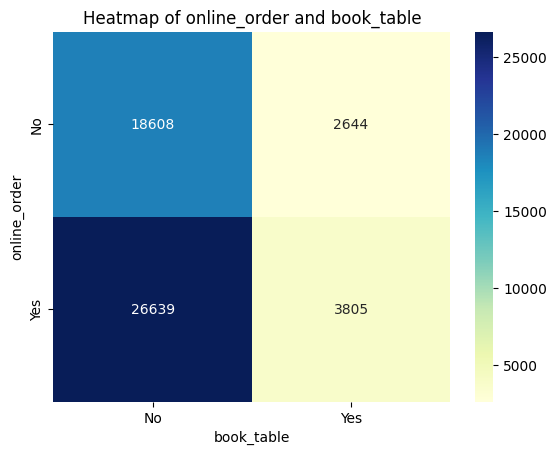

In [604]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of online_order and book_table')
plt.show()

#### Statistical test between book_table and online_order

- H0 (Null Hypothesis) : both columns are independent 
- H1 (Alternate Hypothesis) : both columns are dependent

In [605]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("pvalue :", p_value)

pvalue : 0.8571140046098424


Since the p-value is greater than 0.05 we fail to reject null hypothesis, So we conclude both columns are independent.

So we can conclude that, there is enough evidence to conclude, online order changes based on table booking.

<Axes: xlabel='rate', ylabel='online_order'>

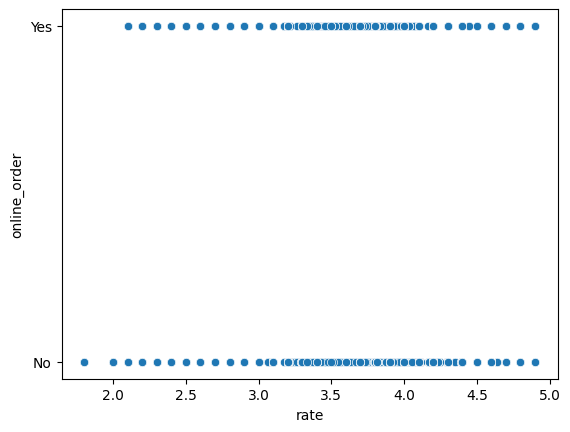

In [606]:
sns.scatterplot(dfc1, x='rate', y='online_order')

<Axes: xlabel='rate', ylabel='Count'>

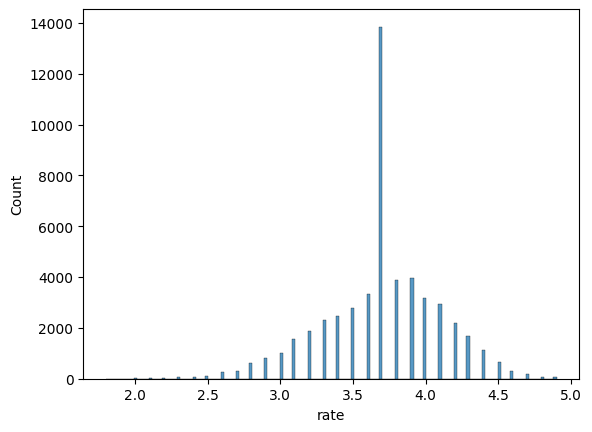

In [638]:
sns.histplot(dfc1['rate'])

In [639]:
stast_val, p_val = stats.shapiro(dfc1['rate'])
print(p_val)

3.5475800067099748e-68


C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51696.
  res = hypotest_fun_out(*samples, **kwds)


### Finding relation between votes and online_order

<Axes: xlabel='votes', ylabel='online_order'>

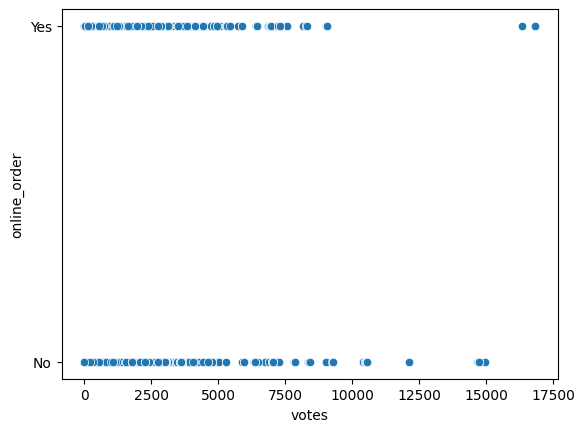

In [609]:
sns.scatterplot(dfc1, x='votes', y='online_order')

<Axes: xlabel='votes', ylabel='Density'>

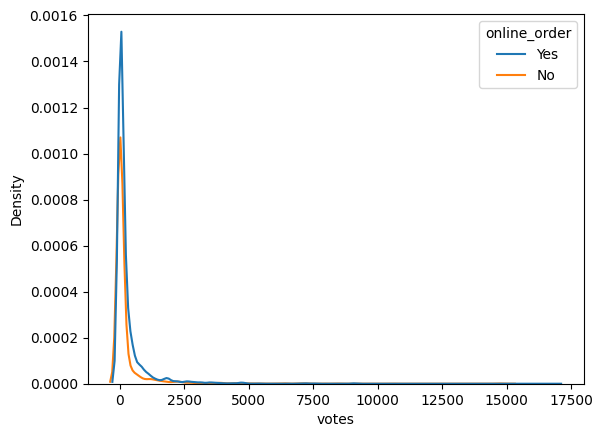

In [644]:
sns.kdeplot(x=dfc1['votes'], hue=dfc1['online_order'])

### Finding realtion between location and online_order

In [260]:
location = dfc1['location'].value_counts().sort_index().index
location

Index(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi',
       'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli', 'Brigade Road',
       'Brookefield', 'CV Raman Nagar', 'Central Bangalore', 'Church Street',
       'City Market', 'Commercial Street', 'Cunningham Road', 'Domlur',
       'East Bangalore', 'Ejipura', 'Electronic City', 'Frazer Town',
       'HBR Layout', 'HSR', 'Hebbal', 'Hennur', 'Hosur Road',
       'ITPL Main Road, Whitefield', 'Indiranagar', 'Infantry Road',
       'JP Nagar', 'Jakkur', 'Jalahalli', 'Jayanagar', 'Jeevan Bhima Nagar',
       'KR Puram', 'Kaggadasapura', 'Kalyan Nagar', 'Kammanahalli',
       'Kanakapura Road', 'Kengeri', 'Koramangala', 'Koramangala 1st Block',
       'Koramangala 2nd Block', 'Koramangala 3rd Block',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block',
       'Koramangala 8th Block', 'Kumaraswamy Layout', 'Langford Town',
       'Lavelle Road', 'MG Road

In [253]:
val_count_location = dfc1['location'].value_counts().sort_index().values
val_count_location

array([5124,  906,  664, 1630,  684,  191, 1286,  238, 1218,  658,   90,
          8,  569,  126,  370,  491,  496,   44,  439, 1258,  727,  153,
       2523,   14,  161,  102,  113, 2083,  151, 2235,    3,   38, 1926,
        272,   18,  101,  853,  648,   19,    9,   48, 1238,  102,  216,
       1017, 2504, 1156, 1181,  320,  195,   27,  529,  918,   34,  155,
        725, 1846,   22,    9,  187,  649,   14,  446,   22,    1,   80,
        139,  591,    2,   32,  675,  812,   63,   53,   76,   27, 1065,
        165,  511,  499,  107,  352,  194, 1023,   17,  117,  295,   80,
          6, 2144,  246,    6,  119], dtype=int64)

In [255]:
sum_online_order_loc  = dfc1.groupby('location', sort=True)['online_order_Yes'].sum().values[:,1]
sum_online_order_loc

array([3332,  509,  343,  924,  441,  100,  761,  115,  665,  417,   57,
          3,  343,   28,  142,  323,  235,   23,  220,  577,  432,  105,
       1920,    4,  103,   59,   80, 1335,   62, 1318,    0,   21, 1364,
        204,    7,   79,  498,  380,   17,    7,   30,  853,   63,  125,
        558, 1614,  699,  786,  212,  165,    5,  206,  374,   18,   21,
        415, 1112,   10,    2,  162,  392,    5,  216,   17,    0,   55,
         46,  305,    2,   27,  248,  247,   25,   38,   37,    0,  729,
         75,  222,  145,   71,  167,   83,  628,   10,   97,  147,   54,
          2, 1139,  134,    5,   93], dtype=int64)

In [258]:
ratio_oline_ord_to_location = sum_online_order_loc / val_count_location
ratio_oline_ord_to_location

array([0.65027322, 0.56181015, 0.51656627, 0.56687117, 0.64473684,
       0.52356021, 0.59175739, 0.48319328, 0.54597701, 0.6337386 ,
       0.63333333, 0.375     , 0.60281195, 0.22222222, 0.38378378,
       0.65784114, 0.47379032, 0.52272727, 0.50113895, 0.45866455,
       0.59422283, 0.68627451, 0.76099881, 0.28571429, 0.63975155,
       0.57843137, 0.7079646 , 0.64090254, 0.41059603, 0.58970917,
       0.        , 0.55263158, 0.70820353, 0.75      , 0.38888889,
       0.78217822, 0.58382181, 0.58641975, 0.89473684, 0.77777778,
       0.625     , 0.68901454, 0.61764706, 0.5787037 , 0.54867257,
       0.64456869, 0.60467128, 0.66553768, 0.6625    , 0.84615385,
       0.18518519, 0.38941399, 0.40740741, 0.52941176, 0.13548387,
       0.57241379, 0.60238353, 0.45454545, 0.22222222, 0.86631016,
       0.60400616, 0.35714286, 0.48430493, 0.77272727, 0.        ,
       0.6875    , 0.33093525, 0.51607445, 1.        , 0.84375   ,
       0.36740741, 0.30418719, 0.3968254 , 0.71698113, 0.48684

In [273]:
ratio_online_orders = pd.DataFrame(ratio_oline_ord_to_location, index=location, columns=['ratio']).sort_values(by='ratio', ascending=False)
ratio_online_orders

ratio
location                               
Rajarajeshwari Nagar           1.000000
Kanakapura Road                0.894737
Nagawara                       0.866310
Kumaraswamy Layout             0.846154
Rammurthy Nagar                0.843750
Yelahanka                      0.833333
Varthur Main Road, Whitefield  0.829060
Kaggadasapura                  0.782178
Yeshwantpur                    0.781513
Kengeri                        0.777778
Old Madras Road                0.772727
HSR                            0.760999
Jeevan Bhima Nagar             0.750000
Sahakara Nagar                 0.716981
Jayanagar                      0.708204
ITPL Main Road, Whitefield     0.707965
Koramangala 1st Block          0.689015
RT Nagar                       0.687500
HBR Layout                     0.686275
Sarjapur Road                  0.684507
Vijay Nagar                    0.675000
Koramangala 7th Block          0.665538
South Bangalore                0.663551
Koramangala 8th Block          0.662500
Cunningham Road                0.657841
BTM                            0.650273
Basavanagudi                   0.644737
Koramangala 5th Block          0.644569
Indiranagar                    0.640903
Hennur                         0.639752
Brookefield                    0.633739
CV Raman Nagar                 0.633333
Koramangala                    0.625000
Koramangala 2nd Block          0.617647
Ulsoor                         0.613881
Koramangala 6th Block          0.604671
New BEL Road                   0.604006
Church Street                  0.602812
Marathahalli                   0.602384
Frazer Town                    0.594223
Bellandur                      0.591757
JP Nagar                       0.589709
Uttarahalli                    0.588235
Kammanahalli                   0.586420
Kalyan Nagar                   0.583822
Koramangala 3rd Block          0.578704
Hosur Road                     0.578431
Malleshwaram                   0.572414
Bannerghatta Road              0.566871
Banashankari                   0.561810
Jalahalli                      0.552632
Koramangala 4th Block          0.548673
Brigade Road                   0.545977
Wilson Garden                  0.544715
Whitefield                     0.531250
Magadi Road                    0.529412
Basaveshwara Nagar             0.523560
East Bangalore                 0.522727
Banaswadi                      0.516566
Rajajinagar                    0.516074
Ejipura                        0.501139
Vasanth Nagar                  0.498305
Sanjay Nagar                   0.486842
Old Airport Road               0.484305
Bommanahalli                   0.483193
St. Marks Road                 0.474432
Domlur                         0.473790
Electronic City                0.458665
Mysore Road                    0.454545
Seshadripuram                  0.454545
Shanti Nagar                   0.434442
Thippasandra                   0.427835
Infantry Road                  0.410596
MG Road                        0.407407
Sadashiv Nagar                 0.396825
Lavelle Road                   0.389414
KR Puram                       0.388889
Commercial Street              0.383784
Central Bangalore              0.375000
Residency Road                 0.367407
North Bangalore                0.357143
West Bangalore                 0.333333
Race Course Road               0.330935
Richmond Road                  0.304187
Shivajinagar                   0.290581
Hebbal                         0.285714
Nagarbhavi                     0.222222
City Market                    0.222222
Langford Town                  0.185185
Majestic                       0.135484
Peenya                         0.000000
Jakkur                         0.000000
Sankey Road                    0.000000

In [614]:
ratio_online_orders.index.tolist()[::-1]

['Sankey Road',
 'Jakkur',
 'Peenya',
 'Majestic',
 'Langford Town',
 'City Market',
 'Nagarbhavi',
 'Hebbal',
 'Shivajinagar',
 'Richmond Road',
 'Race Course Road',
 'West Bangalore',
 'North Bangalore',
 'Residency Road',
 'Central Bangalore',
 'Commercial Street',
 'KR Puram',
 'Lavelle Road',
 'Sadashiv Nagar',
 'MG Road',
 'Infantry Road',
 'Thippasandra',
 'Shanti Nagar',
 'Seshadripuram',
 'Mysore Road',
 'Electronic City',
 'Domlur',
 'St. Marks Road',
 'Bommanahalli',
 'Old Airport Road',
 'Sanjay Nagar',
 'Vasanth Nagar',
 'Ejipura',
 'Rajajinagar',
 'Banaswadi',
 'East Bangalore',
 'Basaveshwara Nagar',
 'Magadi Road',
 'Whitefield',
 'Wilson Garden',
 'Brigade Road',
 'Koramangala 4th Block',
 'Jalahalli',
 'Banashankari',
 'Bannerghatta Road',
 'Malleshwaram',
 'Hosur Road',
 'Koramangala 3rd Block',
 'Kalyan Nagar',
 'Kammanahalli',
 'Uttarahalli',
 'JP Nagar',
 'Bellandur',
 'Frazer Town',
 'Marathahalli',
 'Church Street',
 'New BEL Road',
 'Koramangala 6th Block',
 'U

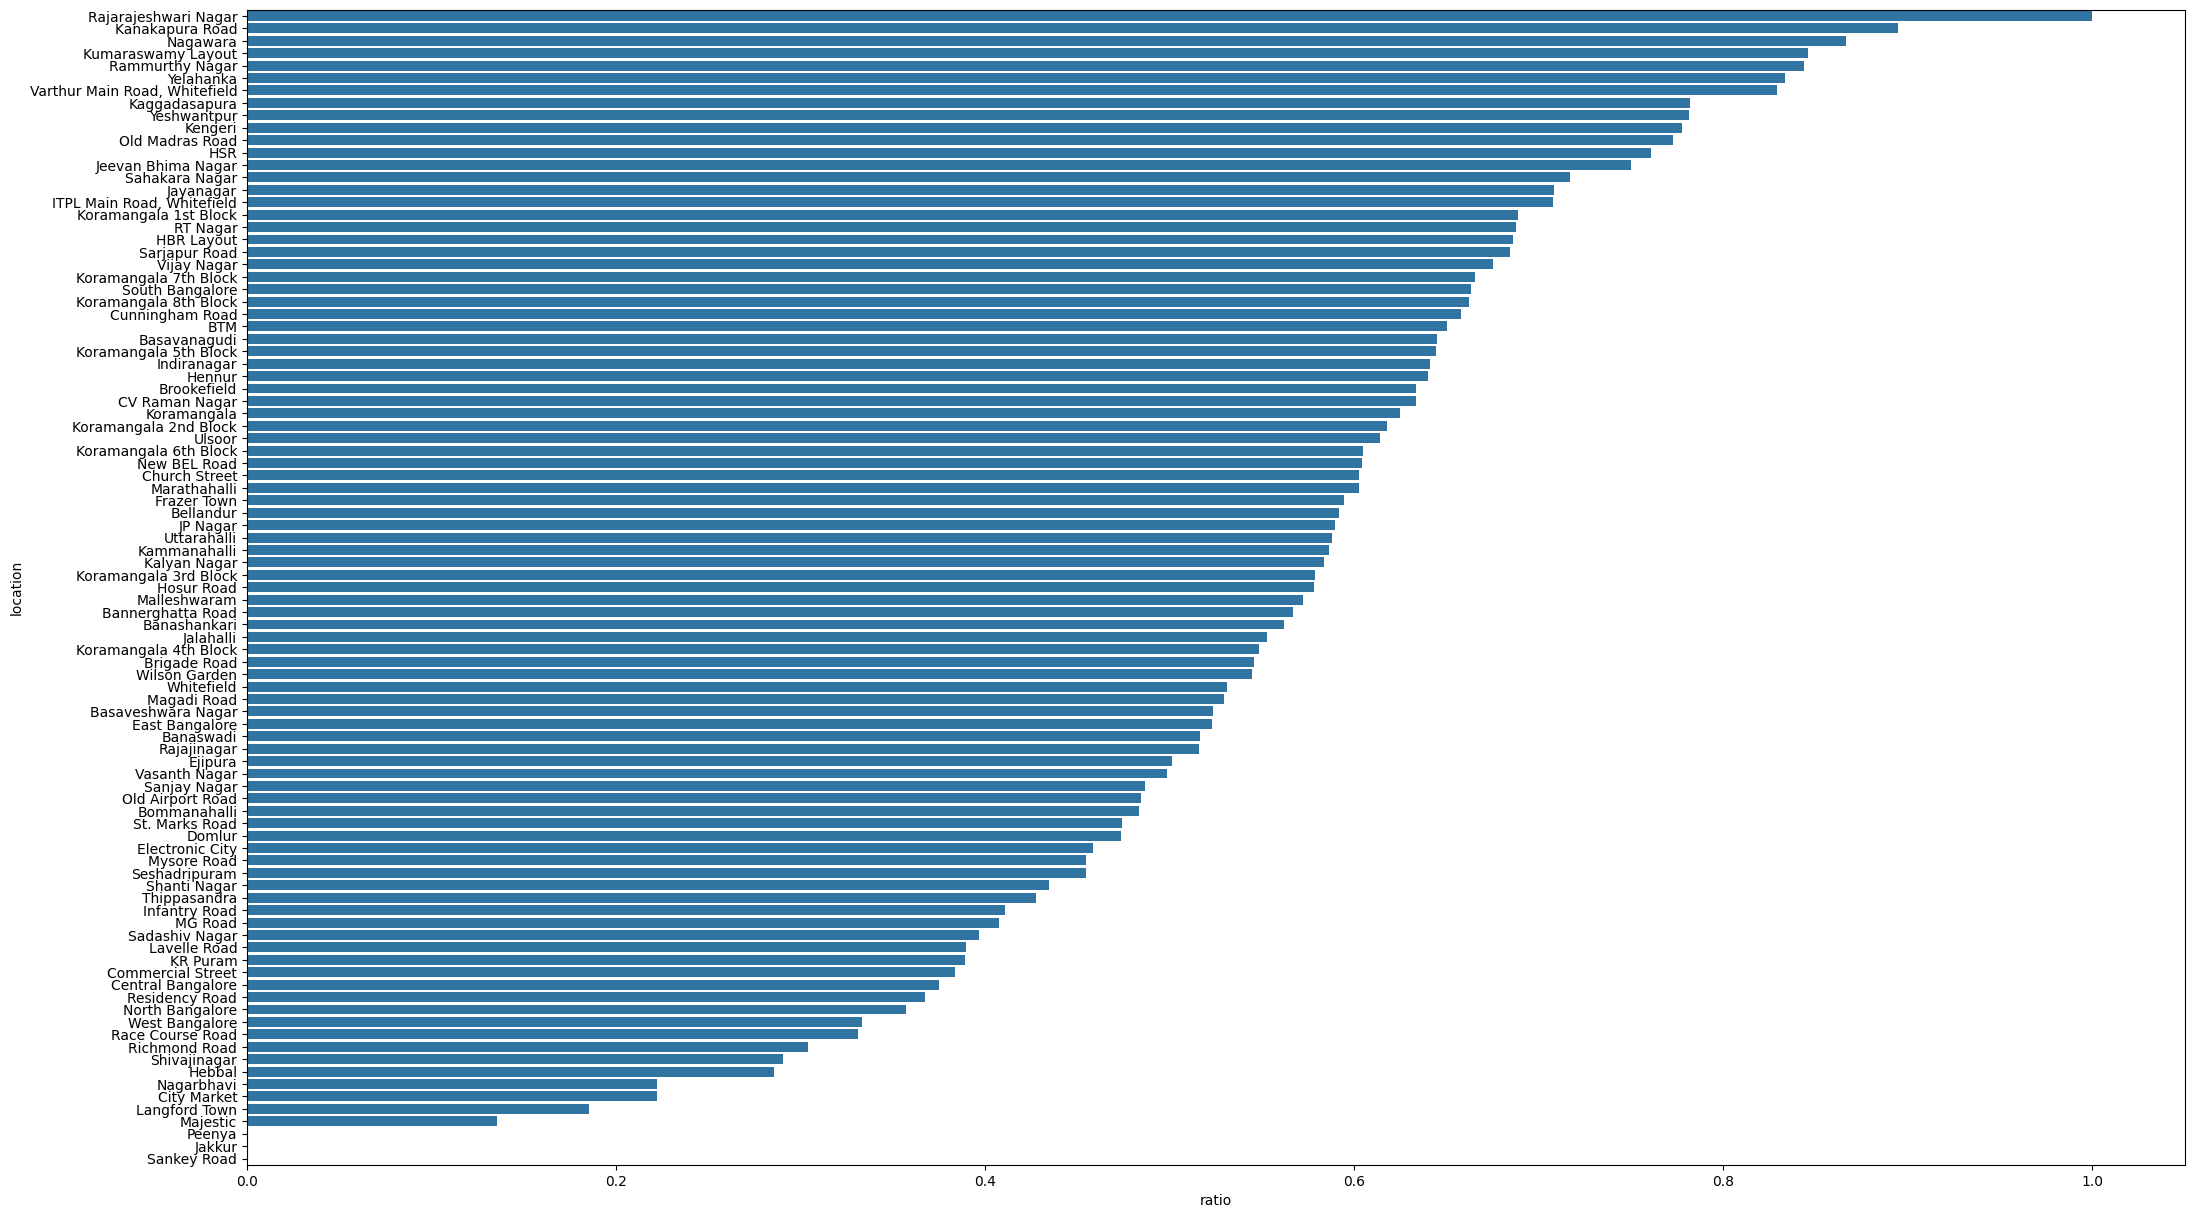

In [274]:
plt.figure(figsize=(25,15), dpi=100)
sns.barplot(x=ratio_online_orders['ratio'], y=ratio_online_orders.index)
plt.show()

#### Statistical test between location and online_order

In [277]:
cross_tab_loc_oo = pd.crosstab(dfc1['location'], dfc1['online_order'])
cross_tab_loc_oo

online_order                     No   Yes
location                                 
BTM                            1792  3332
Banashankari                    397   509
Banaswadi                       321   343
Bannerghatta Road               706   924
Basavanagudi                    243   441
Basaveshwara Nagar               91   100
Bellandur                       525   761
Bommanahalli                    123   115
Brigade Road                    553   665
Brookefield                     241   417
CV Raman Nagar                   33    57
Central Bangalore                 5     3
Church Street                   226   343
City Market                      98    28
Commercial Street               228   142
Cunningham Road                 168   323
Domlur                          261   235
East Bangalore                   21    23
Ejipura                         219   220
Electronic City                 681   577
Frazer Town                     295   432
HBR Layout                       48   105
HSR                             603  1920
Hebbal                           10     4
Hennur                           58   103
Hosur Road                       43    59
ITPL Main Road, Whitefield       33    80
Indiranagar                     748  1335
Infantry Road                    89    62
JP Nagar                        917  1318
Jakkur                            3     0
Jalahalli                        17    21
Jayanagar                       562  1364
Jeevan Bhima Nagar               68   204
KR Puram                         11     7
Kaggadasapura                    22    79
Kalyan Nagar                    355   498
Kammanahalli                    268   380
Kanakapura Road                   2    17
Kengeri                           2     7
Koramangala                      18    30
Koramangala 1st Block           385   853
Koramangala 2nd Block            39    63
Koramangala 3rd Block            91   125
Koramangala 4th Block           459   558
Koramangala 5th Block           890  1614
Koramangala 6th Block           457   699
Koramangala 7th Block           395   786
Koramangala 8th Block           108   212
Kumaraswamy Layout               30   165
Langford Town                    22     5
Lavelle Road                    323   206
MG Road                         544   374
Magadi Road                      16    18
Majestic                        134    21
Malleshwaram                    310   415
Marathahalli                    734  1112
Mysore Road                      12    10
Nagarbhavi                        7     2
Nagawara                         25   162
New BEL Road                    257   392
North Bangalore                   9     5
Old Airport Road                230   216
Old Madras Road                   5    17
Peenya                            1     0
RT Nagar                         25    55
Race Course Road                 93    46
Rajajinagar                     286   305
Rajarajeshwari Nagar              0     2
Rammurthy Nagar                   5    27
Residency Road                  427   248
Richmond Road                   565   247
Sadashiv Nagar                   38    25
Sahakara Nagar                   15    38
Sanjay Nagar                     39    37
Sankey Road                      27     0
Sarjapur Road                   336   729
Seshadripuram                    90    75
Shanti Nagar                    289   222
Shivajinagar                    354   145
South Bangalore                  36    71
St. Marks Road                  185   167
Thippasandra                    111    83
Ulsoor                          395   628
Uttarahalli                       7    10
Varthur Main Road, Whitefield    20    97
Vasanth Nagar                   148   147
Vijay Nagar                      26    54
West Bangalore                    4     2
Whitefield                     1005  1139
Wilson Garden                   112   134
Yelahanka                         1     5
Yeshwantpur                      26    93

In [287]:
chi2, p_value, dof, expected = stats.chi2_contingency(cross_tab_loc_oo)
print("pvalue :", p_value)

pvalue : 0.0


**Since the p-value is less than 0.05, it reject the null hypothesis, So we can conclude that both the catagories are not independent to each other.**

In [619]:
encode_location = OrdinalEncoder(categories=[ratio_online_orders.index.tolist()[::-1]])

In [621]:
dfc1['location_encoder_c'] = encode_location.fit_transform(dfc1[['location']])

In [623]:
dfc1[dfc1['location'] == "Rajarajeshwari Nagar"]

online_order book_table  rate  votes              location      rest_type  \
48           Yes         No   3.7    679  Rajarajeshwari Nagar  casual dining   
314          Yes         No   4.0     53  Rajarajeshwari Nagar       delivery   

                                            dish_liked          cuisines  \
48   Momos, Dragon Chicken, Hakka Noodles, Chowmein...     Chinese, Thai   
314    Lasagne, Steak, Masala Quesadilla, Garlic Bread  Mexican, Italian   

     approx_cost(for two people)  \
48                         850.0   
314                        600.0   

                                          reviews_list menu_item  \
48   [('Rated 3.0', 'RATED\n  IÃ\x83Ã\x83Ã\x82Ã...        []   
314  [('Rated 5.0', 'RATED\n  Delivery order\n\nDel...        []   

    listed_in(type) listed_in(city)  location_encoded  \
48         Delivery    Banashankari              71.0   
314        Delivery    Banashankari              71.0   

     casual dining rest_type  cafe rest_type  quick bites rest_type  \
48                         1               0                      0   
314                        0               0                      0   

     delivery rest_type  mess rest_type  dessert parlor rest_type  \
48                    0               0                         0   
314                   1               0                         0   

     bakery rest_type  pub rest_type  takeaway rest_type  \
48                  0              0                   0   
314                 0              0                   0   

     fine dining rest_type  beverage shop rest_type  sweet shop rest_type  \
48                       0                        0                     0   
314                      0                        0                     0   

     bar rest_type  confectionery rest_type  kiosk rest_type  \
48               0                        0                0   
314              0                        0                0   

     food truck rest_type  microbrewery rest_type  lounge rest_type  \
48                      0                       0                 0   
314                     0                       0                 0   

     food court rest_type  general rest_type  dhaba rest_type  club rest_type  \
48                      0                  0                0               0   
314                     0                  0                0               0   

     bhojanalya rest_type  pop up rest_type  irani cafee rest_type  \
48                      0                 0                      0   
314                     0                 0                      0   

     meat shop rest_type  North Indian cuisine  Chinese cuisine  Cafe cuisine  \
48                     0                     0                1             0   
314                    0                     0                0             0   

     South Indian cuisine  Pizza cuisine  Italian cuisine  Bakery cuisine  \
48                      0              0                0               0   
314                     0              0                1               0   

     Biryani cuisine  Street Food cuisine  Burger cuisine  Fast Food cuisine  \
48                 0                    0               0                  0   
314                0                    0               0                  0   

     Ice Cream cuisine  Healthy Food cuisine  Asian cuisine  Desserts cuisine  \
48                   0                     0              0                 0   
314                  0                     0              0                 0   

     Goan cuisine  Continental cuisine  Seafood cuisine  Beverages cuisine  \
48              0                    0                0                  0   
314             0                    0                0                  0   

     Mithai cuisine  Sandwich cuisine  Mangalorean cuisine  Rolls cuisine  \
48                0                 0                    0              0  

In [663]:
dfc2 = dfc1.drop(['book_table', 'book_table_Yes', 'online_order', 'rate', 'votes', 'location', 'location_encoded', 'listed_in(city)', 'rest_type', 'cuisines', 'online_order_Yes'], axis = 1)

In [664]:
dfc2.head()

dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

   approx_cost(for two people)  \
0                        800.0   
1                        800.0   
2                        800.0   
3                        300.0   
4                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type)  casual dining rest_type  cafe rest_type  \
0          Buffet                        1               0   
1          Buffet                        1               0   
2          Buffet                        1               1   
3          Buffet                        0               0   
4          Buffet                        1               0   

   quick bites rest_type  delivery rest_type  mess rest_type  \
0                      0                   0               0   
1                      0                   0               0   
2                      0                   0               0   
3                      1                   0               0   
4                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0

In [665]:
# dfc2 = pd.concat([dfc2, df6['online_order_Yes']], axis=1)


In [668]:
dfc2.head()

dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

   approx_cost(for two people)  \
0                        800.0   
1                        800.0   
2                        800.0   
3                        300.0   
4                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type)  casual dining rest_type  cafe rest_type  \
0          Buffet                        1               0   
1          Buffet                        1               0   
2          Buffet                        1               1   
3          Buffet                        0               0   
4          Buffet                        1               0   

   quick bites rest_type  delivery rest_type  mess rest_type  \
0                      0                   0               0   
1                      0                   0               0   
2                      0                   0               0   
3                      1                   0               0   
4                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0

### approx_cost and online order

<Axes: xlabel='approx_cost(for two people)', ylabel='online_order_Yes'>

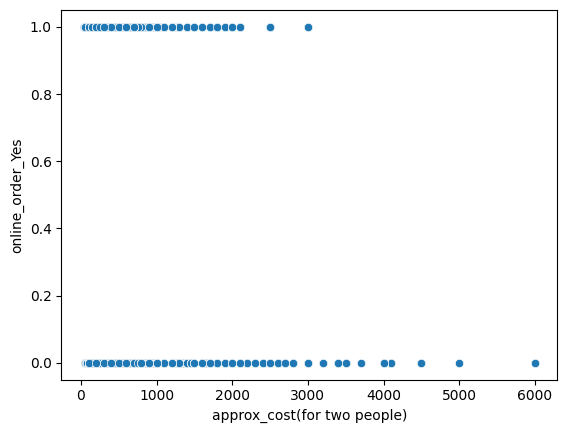

In [669]:
sns.scatterplot(x=dfc2['approx_cost(for two people)'], y=dfc2['online_order_Yes'])

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

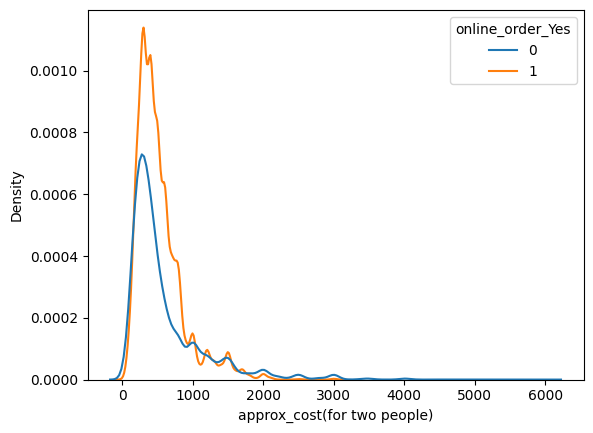

In [671]:
sns.kdeplot(x=dfc2['approx_cost(for two people)'], hue=dfc2['online_order_Yes'])

In [673]:
aprx_cost_1 = dfc2[dfc2['online_order_Yes'] == 1]['approx_cost(for two people)']
aprx_cost_0 = dfc2[dfc2['online_order_Yes'] == 0]['approx_cost(for two people)']

In [674]:
stast.shapiro(aprx_cost_1)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30444.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8349703949592167, pvalue=4.2362233691500744e-98)

In [675]:
stast.shapiro(aprx_cost_0)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21252.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7339221325489249, pvalue=2.4871548358507857e-101)

both are failing in the assumtions of normality

In [678]:
from sklearn.preprocessing import PowerTransformer

In [679]:
transform_cost = PowerTransformer()

In [681]:
dfc2['approx_cost(for two people)_transformed'] = transform_cost.fit_transform(dfc2[['approx_cost(for two people)']])

In [682]:
aprx_cost_1 = dfc2[dfc2['online_order_Yes'] == 1]['approx_cost(for two people)_transformed']
aprx_cost_0 = dfc2[dfc2['online_order_Yes'] == 0]['approx_cost(for two people)_transformed']

In [683]:
stast.shapiro(aprx_cost_1)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30444.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9859317147773035, pvalue=3.3576322000708018e-46)

In [684]:
stast.shapiro(aprx_cost_0)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21252.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9838573259662414, pvalue=5.3380070658452655e-43)

<Axes: xlabel='approx_cost(for two people)_transformed', ylabel='Density'>

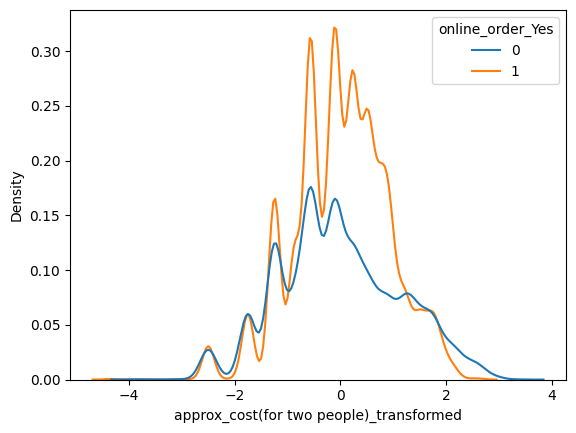

In [685]:
sns.kdeplot(x=dfc2['approx_cost(for two people)_transformed'], hue=dfc2['online_order_Yes'])

still failes the assumption of normality

**by visulization we can't see any variation in online order based on approx_cost**

In [686]:
dfc2.drop(['approx_cost(for two people)_transformed', 'approx_cost(for two people)'], axis=1, inplace=True)

In [687]:
dfc2.head()

dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type)  casual dining rest_type  cafe rest_type  \
0          Buffet                        1               0   
1          Buffet                        1               0   
2          Buffet                        1               1   
3          Buffet                        0               0   
4          Buffet                        1               0   

   quick bites rest_type  delivery rest_type  mess rest_type  \
0                      0                   0               0   
1                      0                   0               0   
2                      0                   0               0   
3                      1                   0               0   
4                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0                 0   
3               0                     0                 0   
4               0                     0                 0   

   irani cafee rest_type  meat shop rest_type  North Indian 

### Listed_in and online order 

In [688]:
dfc2['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [691]:
cross_list_in_online = pd.crosstab(dfc2['listed_in(type)'], dfc2['online_order_Yes'])
cross_list_in_online

online_order_Yes       0      1
listed_in(type)                
Buffet               524    354
Cafes                824    898
Delivery            7062  18871
Desserts            1944   1649
Dine-out            9527   8245
Drinks & nightlife   864    237
Pubs and bars        507    190

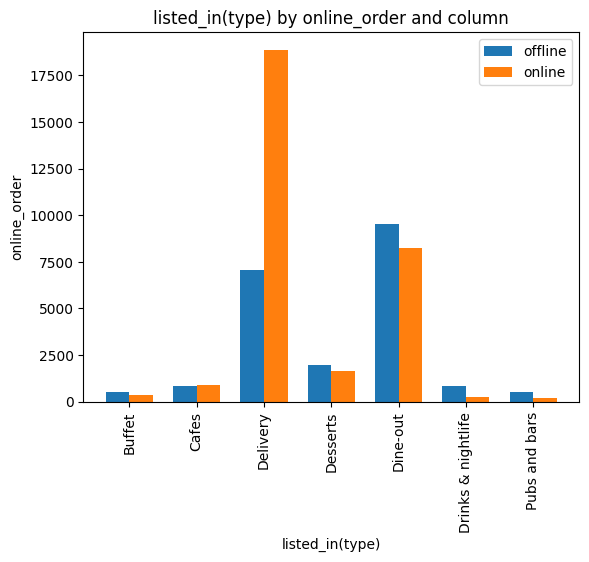

In [698]:
x = np.arange(len(cross_list_in_online.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, cross_list_in_online[0], width, label='offline')
bars2 = ax.bar(x + width/2, cross_list_in_online[1], width, label='online')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('listed_in(type)')
ax.set_ylabel('online_order')
ax.set_title('listed_in(type) by online_order and column')
ax.set_xticks(x)
ax.set_xticklabels(cross_list_in_online.index)


ax.legend()
plt.xticks(rotation=90)
plt.show()

from this plot we can see that that restorents which are linted_in delivery type has high on-line orders when compared to other types.

In [700]:
stat, pval, dof, exp_val = stats.chi2_contingency(cross_list_in_online)

In [701]:
print("p-value: ", pval)

p-value:  0.0


p-value is less that 0.05, rejects the Null Hypothesis, So we conclude online order varies based on listed_in type.

In [707]:
dfc3 = pd.get_dummies(dfc2, columns=['listed_in(type)'], drop_first=True, dtype='int64')

In [708]:
dfc3.head()

dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

   casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0        

In [713]:
dfc3.drop('menu_item', axis=1, inplace=True)

KeyError: "['menu_item'] not found in axis"

In [712]:
dfc3.drop('dish_liked', axis=1, inplace=True)

In [714]:
dfc3.head()

reviews_list  casual dining rest_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...                        1   
1  [('Rated 4.0', 'RATED\n  Had been here for din...                        1   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...                        1   
3  [('Rated 4.0', "RATED\n  Great food and proper...                        0   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0                 0   
3               0                     0                 0   
4               0                     0                 0   

   irani cafee rest_type  meat shop rest_type  North Indian cuisine  \
0                      0                    0                     1   
1                      0                    0                     1   
2                      0                    0                     0   
3                      0                    0                     1   
4                      0                    0                     1   

   Chinese cuisine  Cafe cuisine  South Indian cuisine  Pizza cuisine  \
0                1             0                     0              0   
1        

### reviews and online_order_Yes

In [724]:
len(dfc3['reviews_list'].iloc[0])

3955

In [721]:
dfc3['reviews_list'].iloc[198]

'[(\'Rated 4.0\', \'RATED\\n  Sunday Noon and my friend and I were damn hungry and we had spoken earlier we wanted to go here.\\n\\nFirst impressions\\n\\nItÃ\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82\\x92s next to a Dominos outlet, and there were very few people but there were many people working in the kitchen but the ambience was quite peaceful.\\n\\nService\\n\\nIt is a self serviced outlet and the staff were busy for most of the time we were there. So was the manager/owner who was there next to the staff, doing what the staff did too.\\n\\nFood\\n\\nWe ordered Mandakki Oggarne, Paddu, Talipattu and Mirchi Bajji. Apart from the Mandakki, all the other items were amazing and ofcourse its not a fast food joint, so they took their time to make it in the best way they could.\\n\\nPS - Talipattu is a must try\\n\\n\\nOver all IÃ\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82\\x92d say its a 4/5 only for their sheer lack of under

In [722]:
dfc3['review_count'] = dfc3['reviews_list'].apply(lambda x : len(x))

In [723]:
dfc3.head()

reviews_list  casual dining rest_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...                        1   
1  [('Rated 4.0', 'RATED\n  Had been here for din...                        1   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...                        1   
3  [('Rated 4.0', "RATED\n  Great food and proper...                        0   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...                        1   

   cafe rest_type  quick bites rest_type  delivery rest_type  mess rest_type  \
0               0                      0                   0               0   
1               0                      0                   0               0   
2               1                      0                   0               0   
3               0                      1                   0               0   
4               0                      0                   0               0   

   dessert parlor rest_type  bakery rest_type  pub rest_type  \
0                         0                 0              0   
1                         0                 0              0   
2                         0                 0              0   
3                         0                 0              0   
4                         0                 0              0   

   takeaway rest_type  fine dining rest_type  beverage shop rest_type  \
0                   0                      0                        0   
1                   0                      0                        0   
2                   0                      0                        0   
3                   0                      0                        0   
4                   0                      0                        0   

   sweet shop rest_type  bar rest_type  confectionery rest_type  \
0                     0              0                        0   
1                     0              0                        0   
2                     0              0                        0   
3                     0              0                        0   
4                     0              0                        0   

   kiosk rest_type  food truck rest_type  microbrewery rest_type  \
0                0                     0                       0   
1                0                     0                       0   
2                0                     0                       0   
3                0                     0                       0   
4                0                     0                       0   

   lounge rest_type  food court rest_type  general rest_type  dhaba rest_type  \
0                 0                     0                  0                0   
1                 0                     0                  0                0   
2                 0                     0                  0                0   
3                 0                     0                  0                0   
4                 0                     0                  0                0   

   club rest_type  bhojanalya rest_type  pop up rest_type  \
0               0                     0                 0   
1               0                     0                 0   
2               0                     0                 0   
3               0                     0                 0   
4               0                     0                 0   

   irani cafee rest_type  meat shop rest_type  North Indian cuisine  \
0                      0                    0                     1   
1                      0                    0                     1   
2                      0                    0                     0   
3                      0                    0                     1   
4                      0                    0                     1   

   Chinese cuisine  Cafe cuisine  South Indian cuisine  Pizza cuisine  \
0                1             0                     0              0   
1        

<Axes: xlabel='online_order_Yes', ylabel='review_count'>

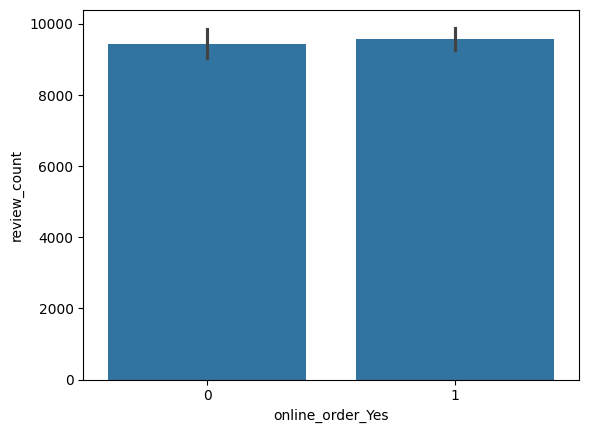

In [726]:
sns.barplot(x=dfc3['online_order_Yes'], y=dfc3['review_count'])

<Axes: xlabel='review_count', ylabel='online_order_Yes'>

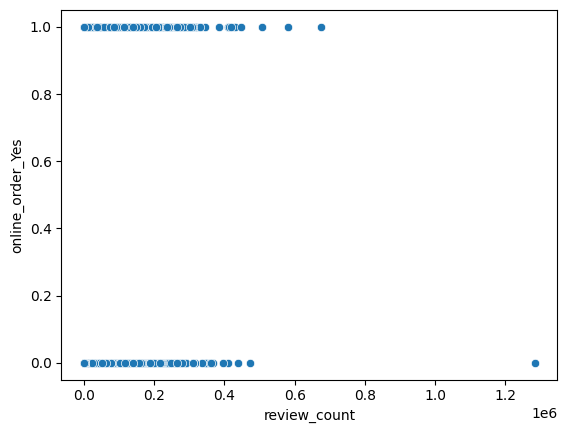

In [727]:
sns.scatterplot(x=dfc3['review_count'], y=dfc3['online_order_Yes'])

<Axes: xlabel='review_count', ylabel='Density'>

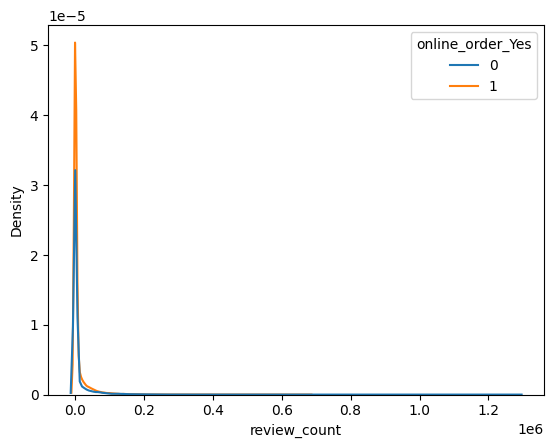

In [728]:
sns.kdeplot(x=dfc3['review_count'], hue=dfc3['online_order_Yes'])

In [729]:
dfc4 = dfc3.drop(['review_count', 'reviews_list'], axis=1)

In [730]:
dfc4.head()

casual dining rest_type  cafe rest_type  quick bites rest_type  \
0                        1               0                      0   
1                        1               0                      0   
2                        1               1                      0   
3                        0               0                      1   
4                        1               0                      0   

   delivery rest_type  mess rest_type  dessert parlor rest_type  \
0                   0               0                         0   
1                   0               0                         0   
2                   0               0                         0   
3                   0               0                         0   
4                   0               0                         0   

   bakery rest_type  pub rest_type  takeaway rest_type  fine dining rest_type  \
0                 0              0                   0                      0   
1                 0              0                   0                      0   
2                 0              0                   0                      0   
3                 0              0                   0                      0   
4                 0              0                   0                      0   

   beverage shop rest_type  sweet shop rest_type  bar rest_type  \
0                        0                     0              0   
1                        0                     0              0   
2                        0                     0              0   
3                        0                     0              0   
4                        0                     0              0   

   confectionery rest_type  kiosk rest_type  food truck rest_type  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   microbrewery rest_type  lounge rest_type  food court rest_type  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     0   
3                       0                 0                     0   
4                       0                 0                     0   

   general rest_type  dhaba rest_type  club rest_type  bhojanalya rest_type  \
0                  0                0               0                     0   
1                  0                0               0                     0   
2                  0                0               0                     0   
3                  0                0               0                     0   
4                  0                0               0                     0   

   pop up rest_type  irani cafee rest_type  meat shop rest_type  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   North Indian cuisine  Chinese cuisine  Cafe cuisine  South Indian cuisine  \
0                     1                1             0                     0   
1                     1                1             0                     0   
2                     0                0             1                     0   
3                     1                0             0                     1   
4                     1                0             0                     0   

   Pizza cuisine  Italian cuisine  Bakery cuisine  Biryani cuisine  \
0              0                0   

## Model Building

In [731]:
x = dfc4.drop('online_order_Yes', axis=1)
y = dfc4['online_order_Yes']

In [732]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10, stratify=y)

In [737]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [734]:
model1 = DecisionTreeClassifier()

In [735]:
model1.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [736]:
ytrain_pred_model1 = model1.predict(xtrain)

In [738]:
print(classification_report(ytrain, ytrain_pred_model1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     17001
           1       0.92      0.92      0.92     24355

    accuracy                           0.91     41356
   macro avg       0.90      0.91      0.90     41356
weighted avg       0.91      0.91      0.91     41356



In [739]:
ytest_predict_model1 = model1.predict(xtest)

In [740]:
print(classification_report(ytest, ytest_predict_model1))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4251
           1       0.86      0.85      0.86      6089

    accuracy                           0.83     10340
   macro avg       0.83      0.83      0.83     10340
weighted avg       0.83      0.83      0.83     10340



In [743]:
from sklearn.ensemble import RandomForestClassifier

In [744]:
model2 = RandomForestClassifier()

In [745]:
model2.fit(xtrain, ytrain)

RandomForestClassifier()

In [748]:
ytrain_pred_model2 = model2.predict(xtrain)

In [749]:
print(classification_report(ytrain, ytrain_pred_model2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     17001
           1       0.91      0.93      0.92     24355

    accuracy                           0.91     41356
   macro avg       0.91      0.90      0.90     41356
weighted avg       0.91      0.91      0.91     41356



In [750]:
ytest_predict_model2 = model2.predict(xtest)

In [751]:
print(classification_report(ytest, ytest_predict_model2))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4251
           1       0.85      0.87      0.86      6089

    accuracy                           0.83     10340
   macro avg       0.83      0.83      0.83     10340
weighted avg       0.83      0.83      0.83     10340

